In [1]:
import os
import numpy as np
import midi as md
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from DataGenerator import MidiDataGenerator


In [2]:
def display_samples(sample):
    plt.figure(figsize=(16,16))
    for k in range(16):
        plt.subplot(4,4,k+1)
        plt.imshow(sample[k])
        plt.axis('off')
    
    plt.show()

In [3]:
encoders, decoders = [], []

for root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('decoder.h5'):
            decoders.append(os.path.join(root, file))
        if file.endswith('encoder.h5'):
            encoders.append(os.path.join(root, file))
            
encoders.sort()
decoders.sort()
for enc, denc in zip(encoders, decoders):
    print(enc, denc)

./encoder.h5 ./decoder.h5
./piano_100_encoder.h5 ./piano_100_decoder.h5
./piano_10_encoder.h5 ./piano_10_decoder.h5
./piano_20_encoder.h5 ./piano_20_decoder.h5
./piano_50_encoder.h5 ./piano_50_decoder.h5
./switch_100_encoder.h5 ./switch_100_decoder.h5
./switch_10_encoder.h5 ./switch_10_decoder.h5
./switch_20_encoder.h5 ./switch_20_decoder.h5
./switch_50_encoder.h5 ./switch_50_decoder.h5
./windows_100_autoencoder.h5 ./windows_100_decoder.h5
./windows_100_encoder.h5 ./windows_10_decoder.h5
./windows_10_encoder.h5 ./windows_20_decoder.h5
./windows_20_encoder.h5 ./windows_50_decoder.h5


In [11]:
idx = 1

encorder = keras.models.load_model(encoders[idx])
decorder = keras.models.load_model(decoders[idx])


encorder.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-3),
    loss='binary_crossentropy',
)
decorder.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-3), 
    loss='binary_crossentropy',
)

In [13]:
# pcs = encorder.predict(samples[1].reshape(1, 16, 96, 96))
# print(pcs)

# res = decorder.predict(pcs)
# print(res[0].shape)

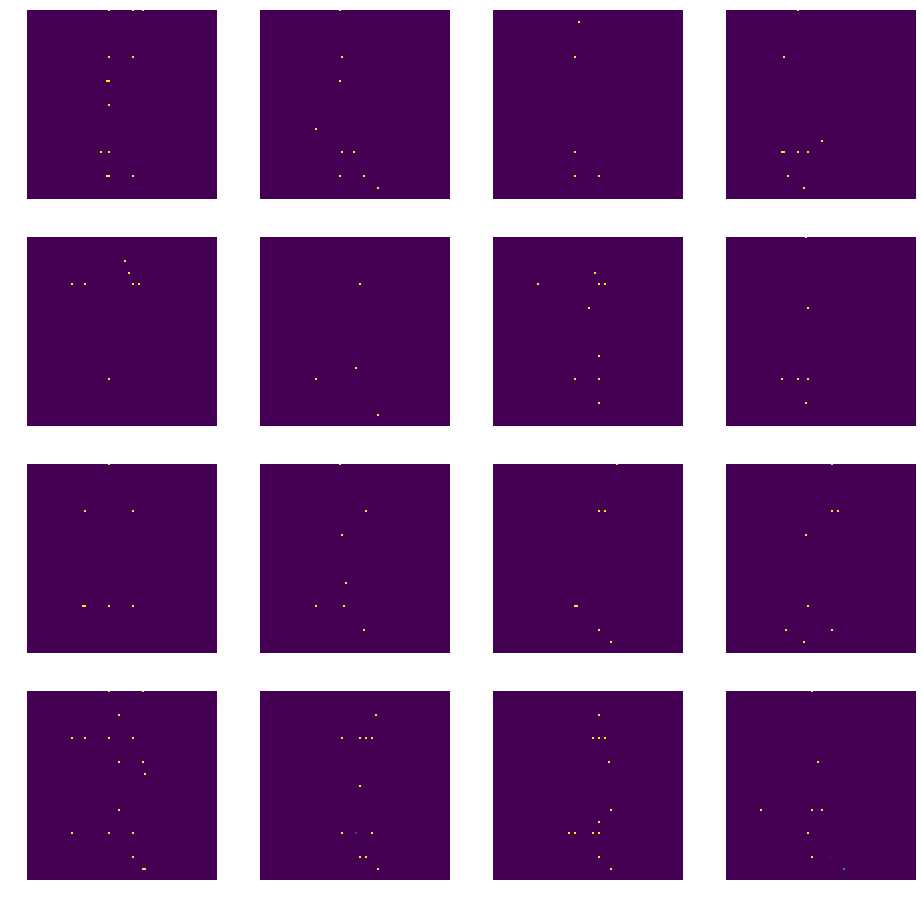

In [22]:
pcs = np.random.normal(loc=0, scale=200.0, size=(1,120))
res = decorder.predict(pcs)
display_samples(res[0])

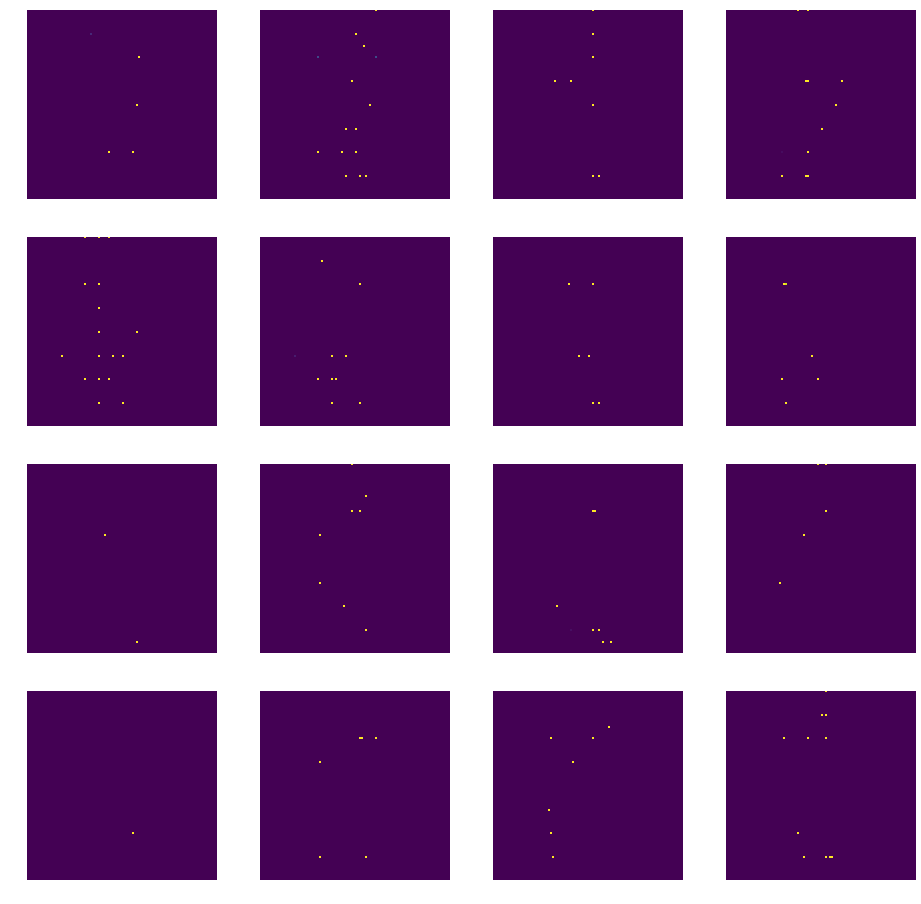

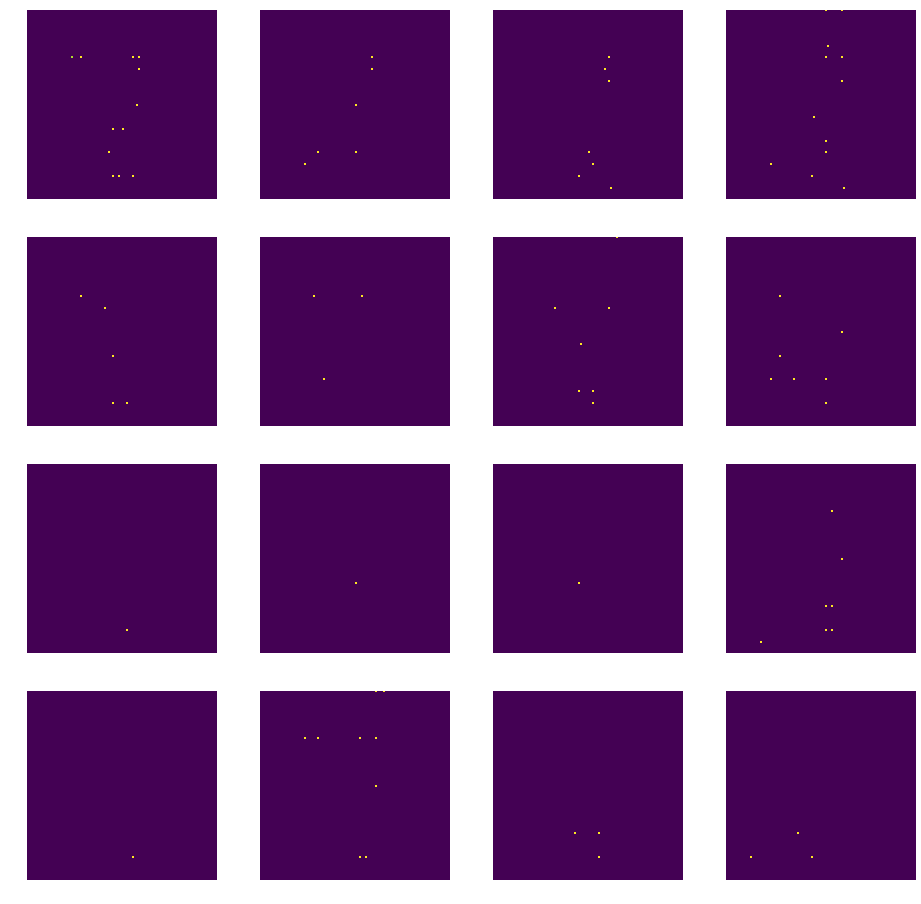

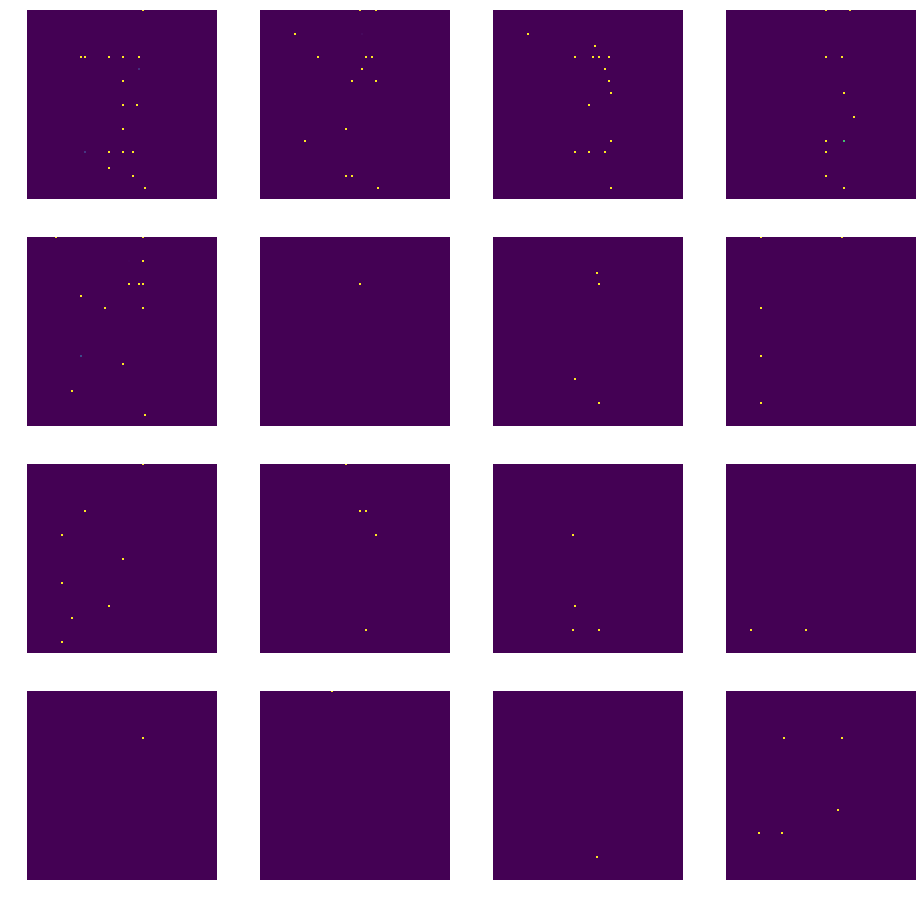

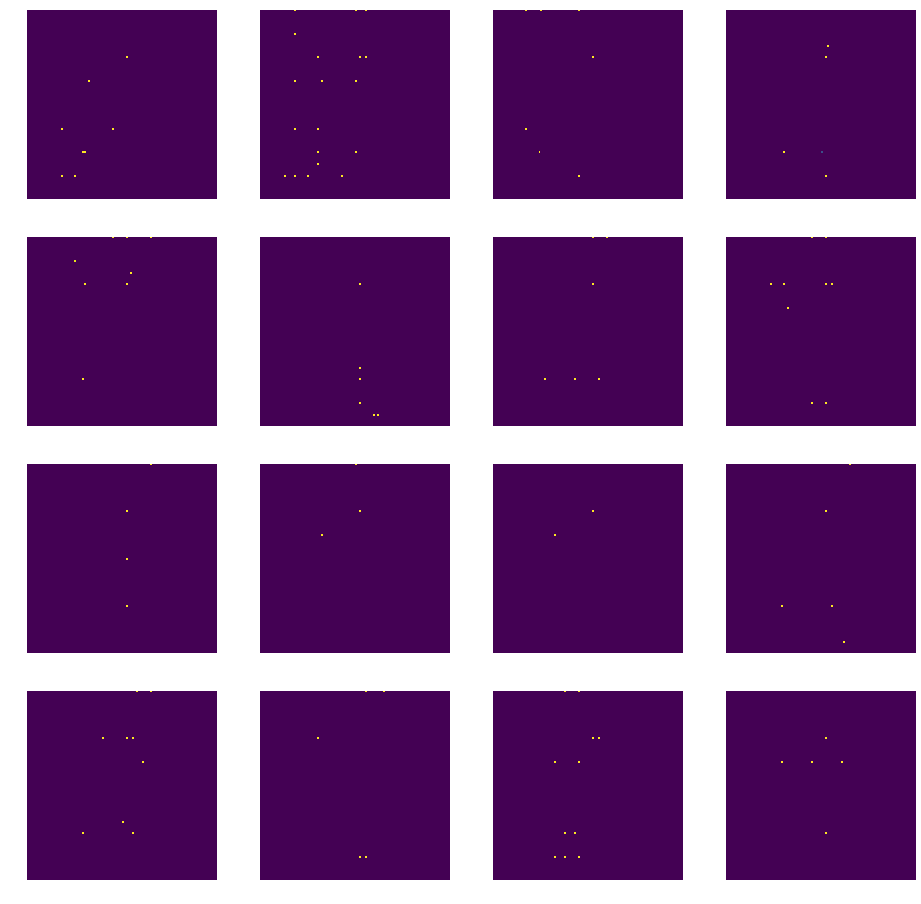

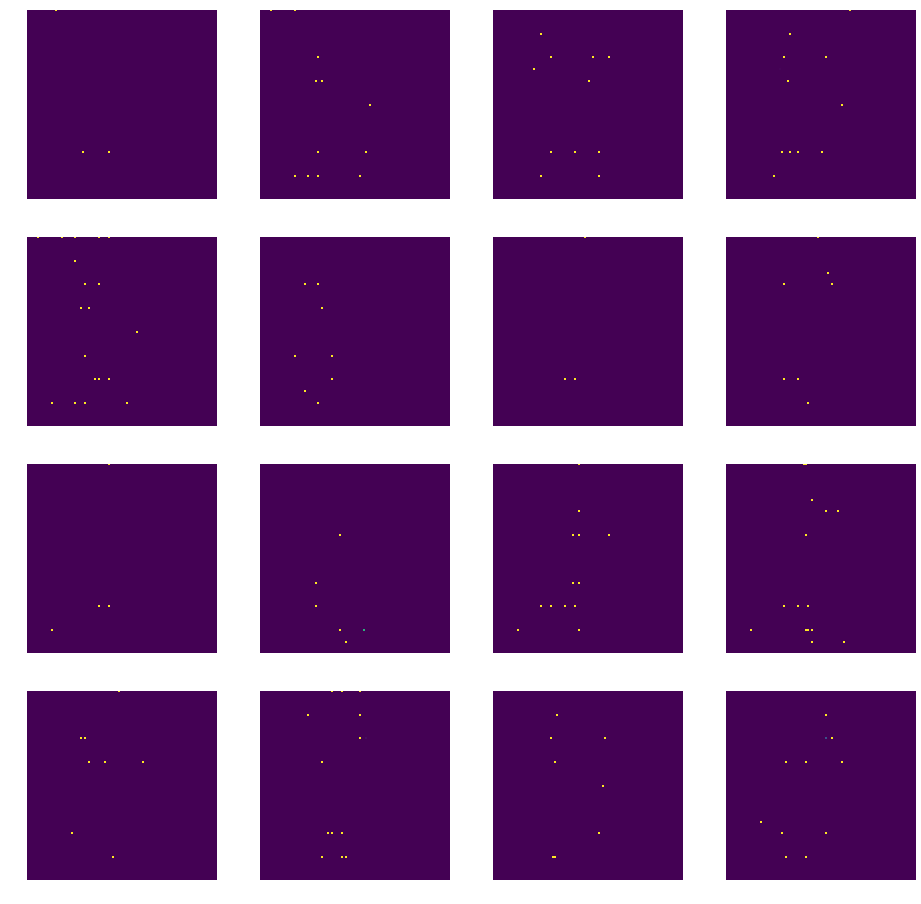

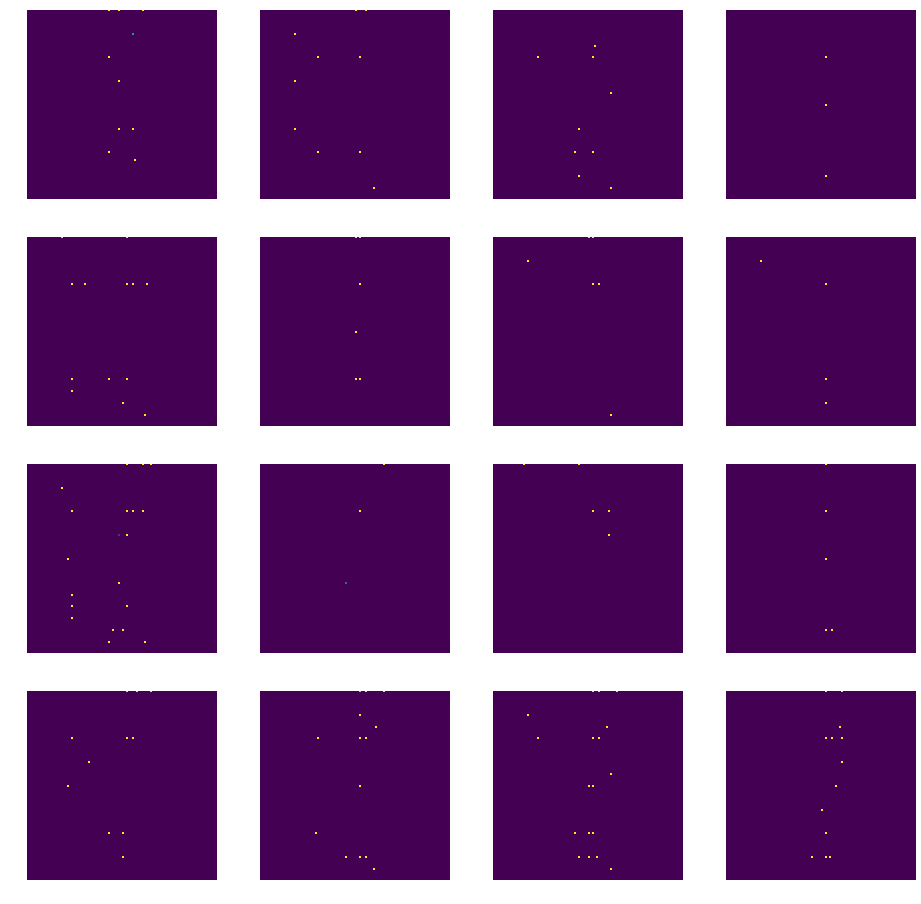

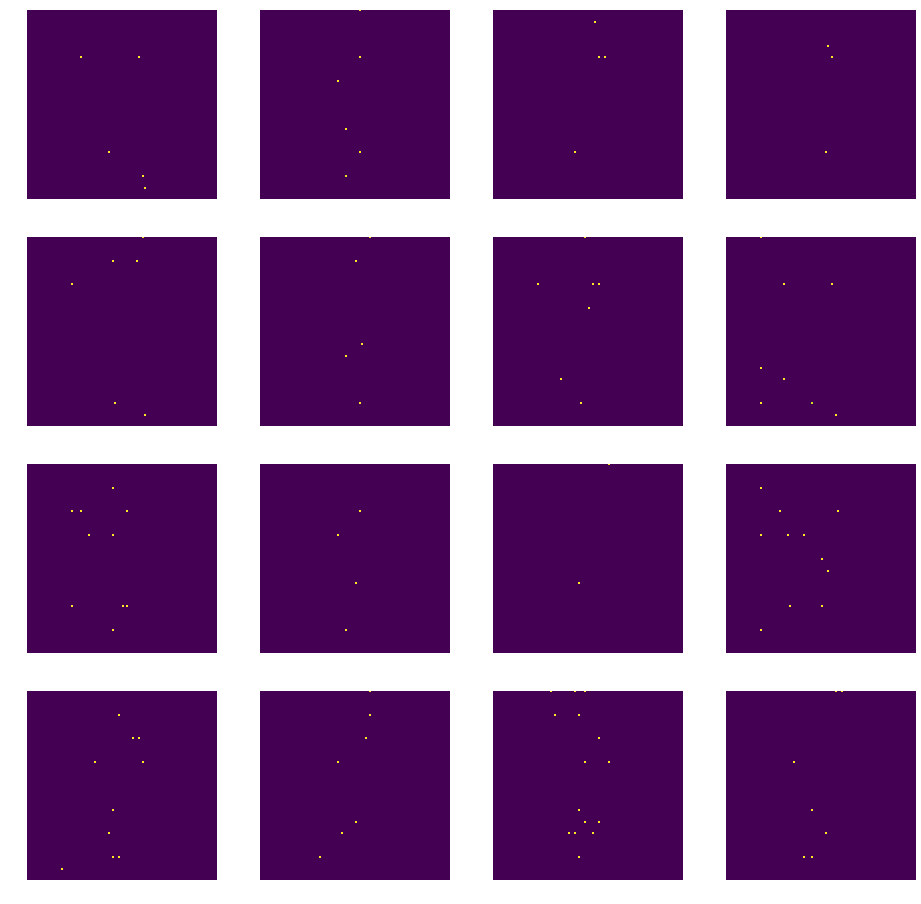

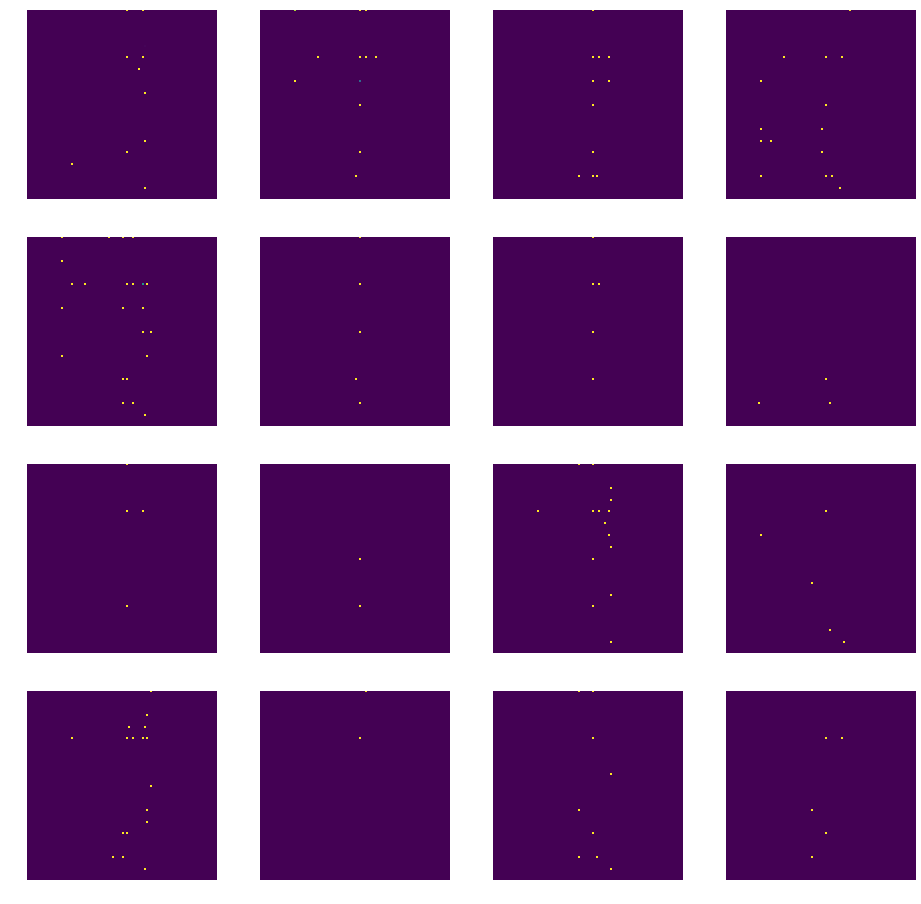

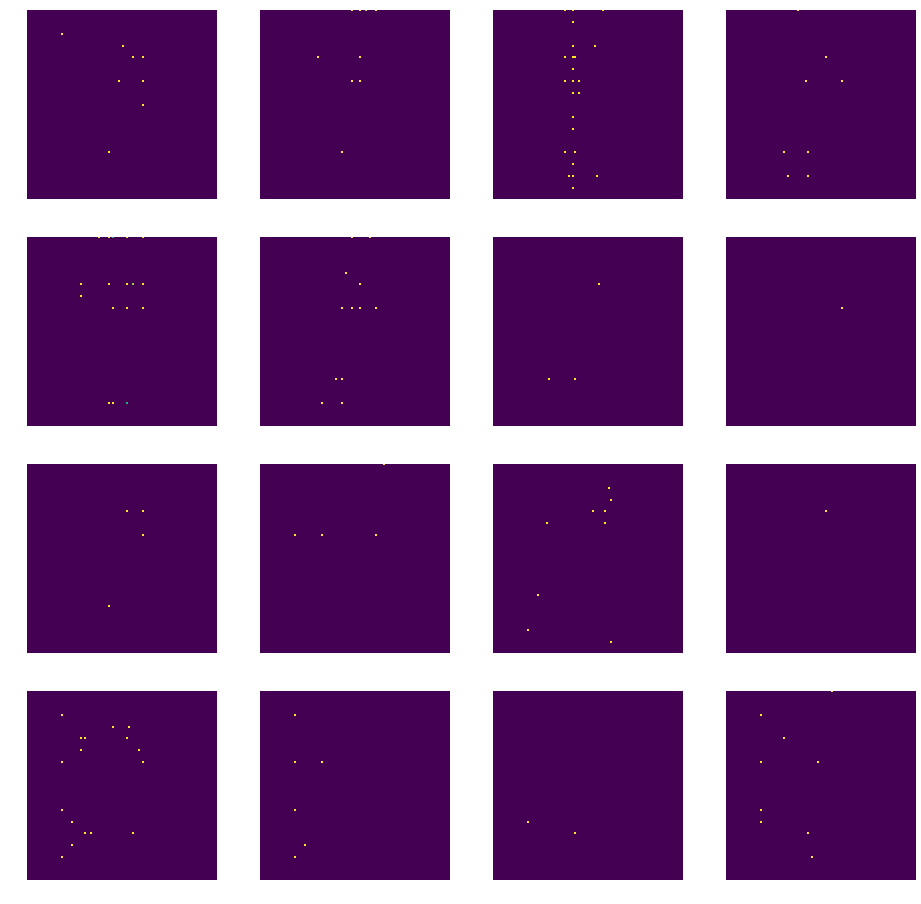

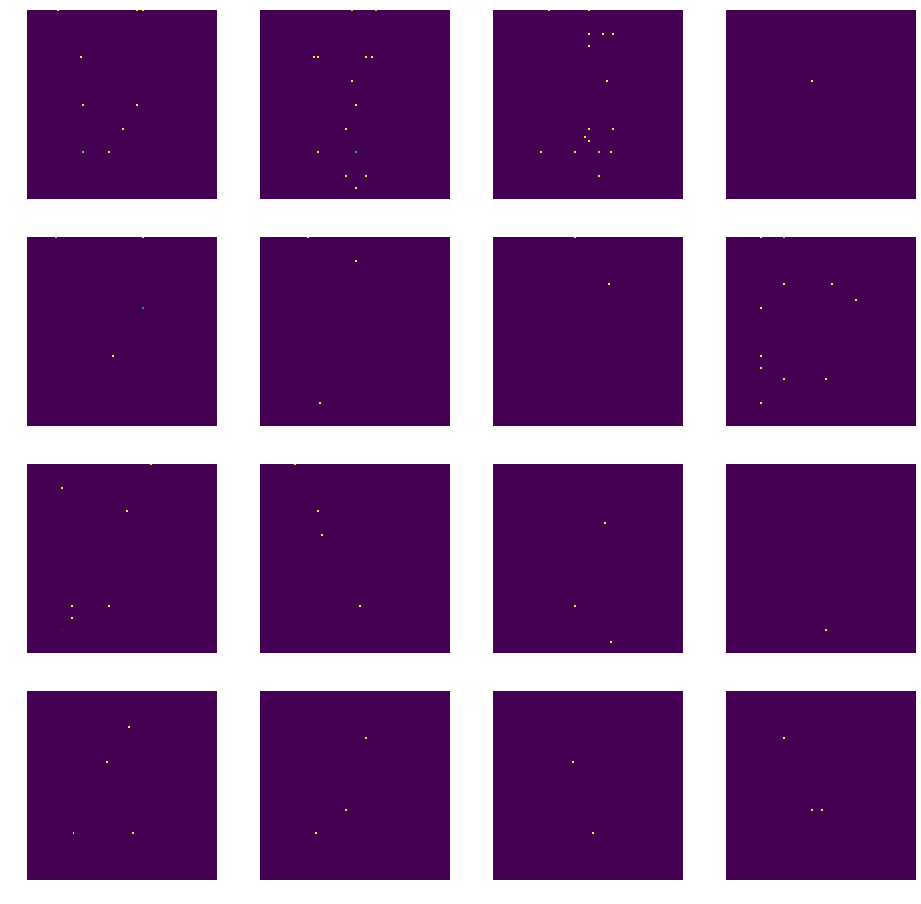

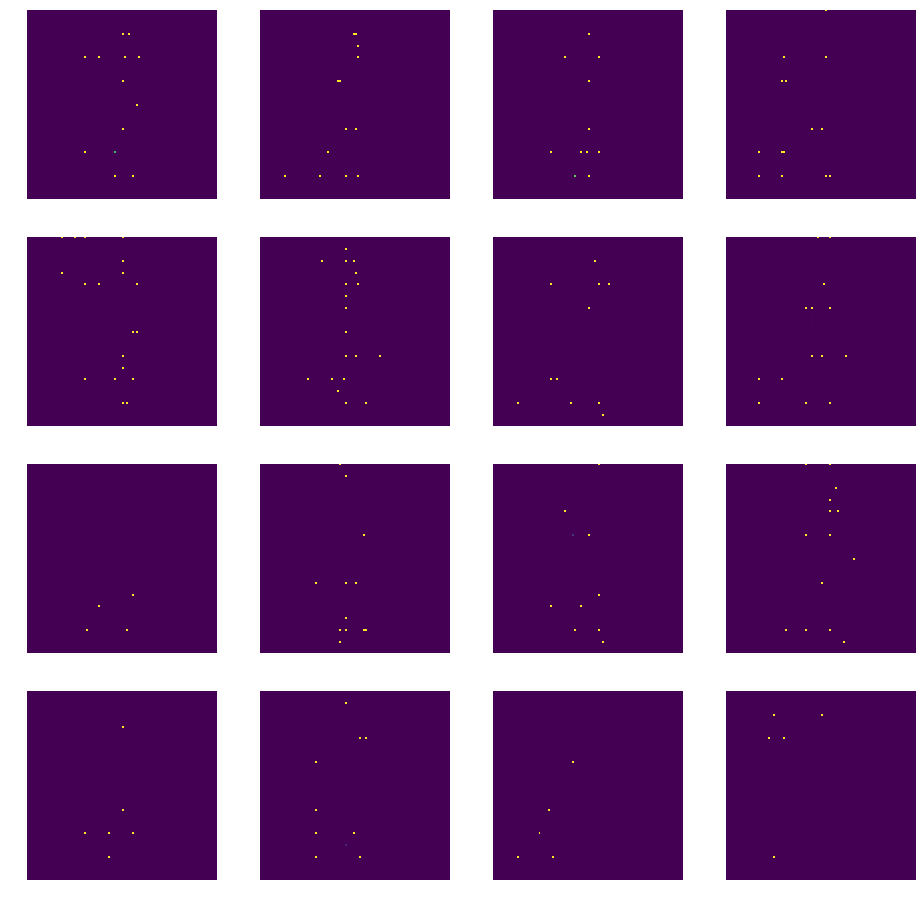

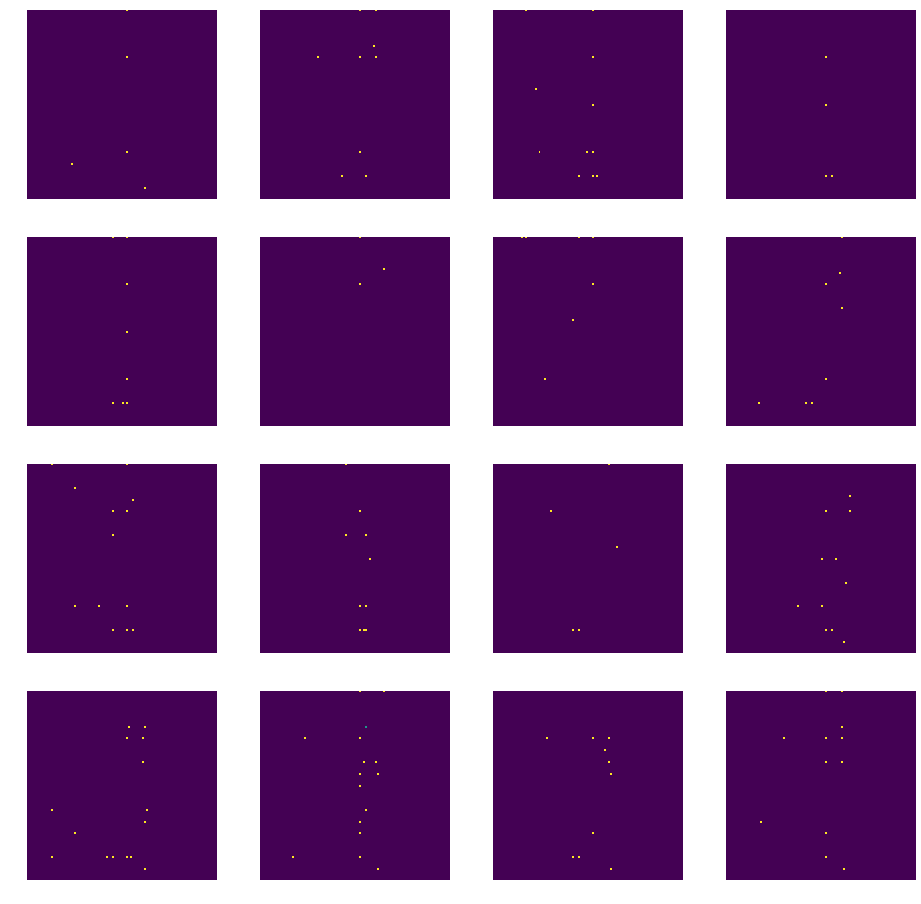

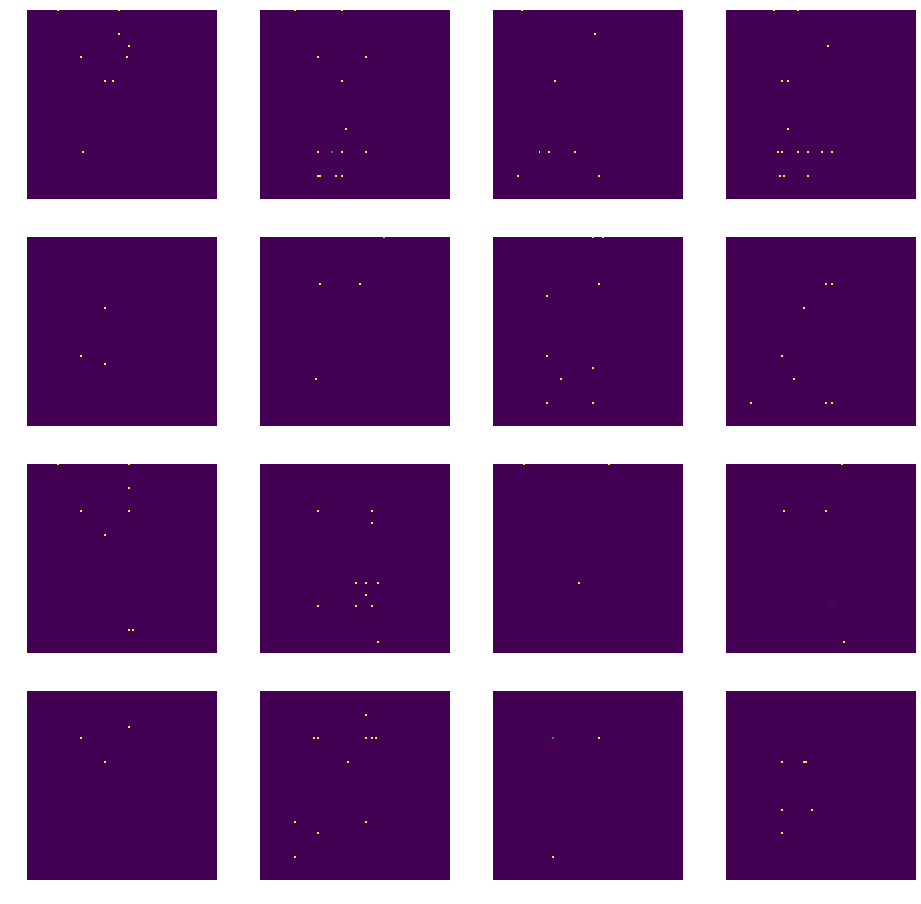

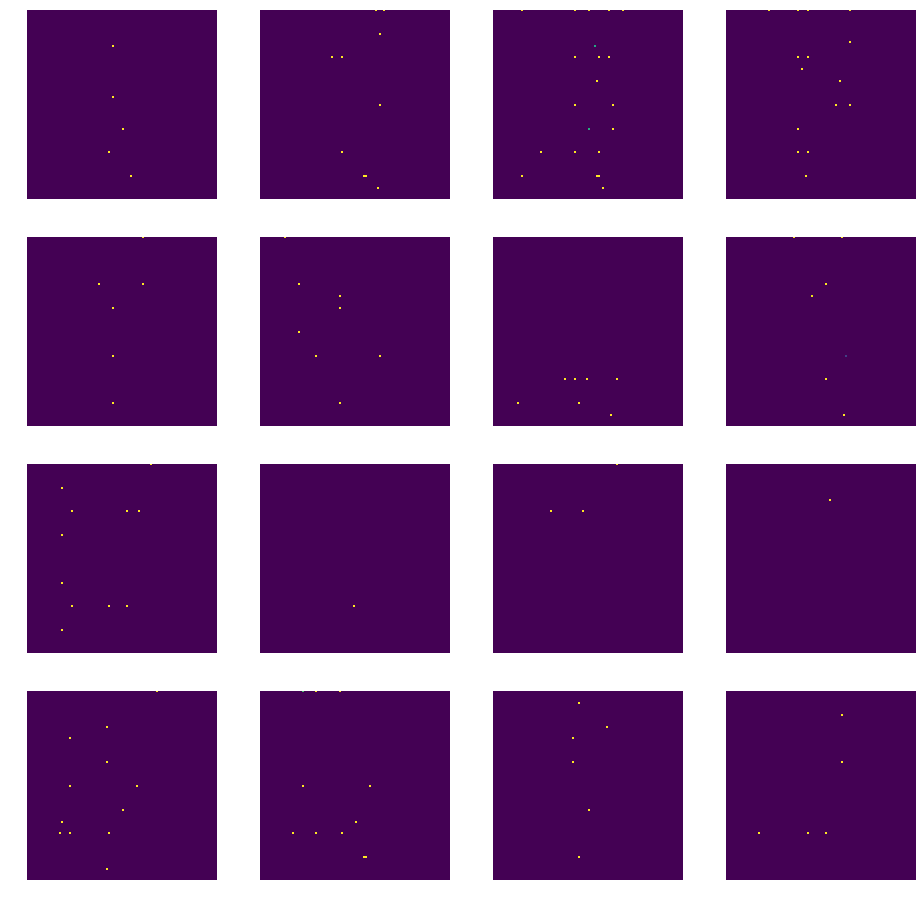

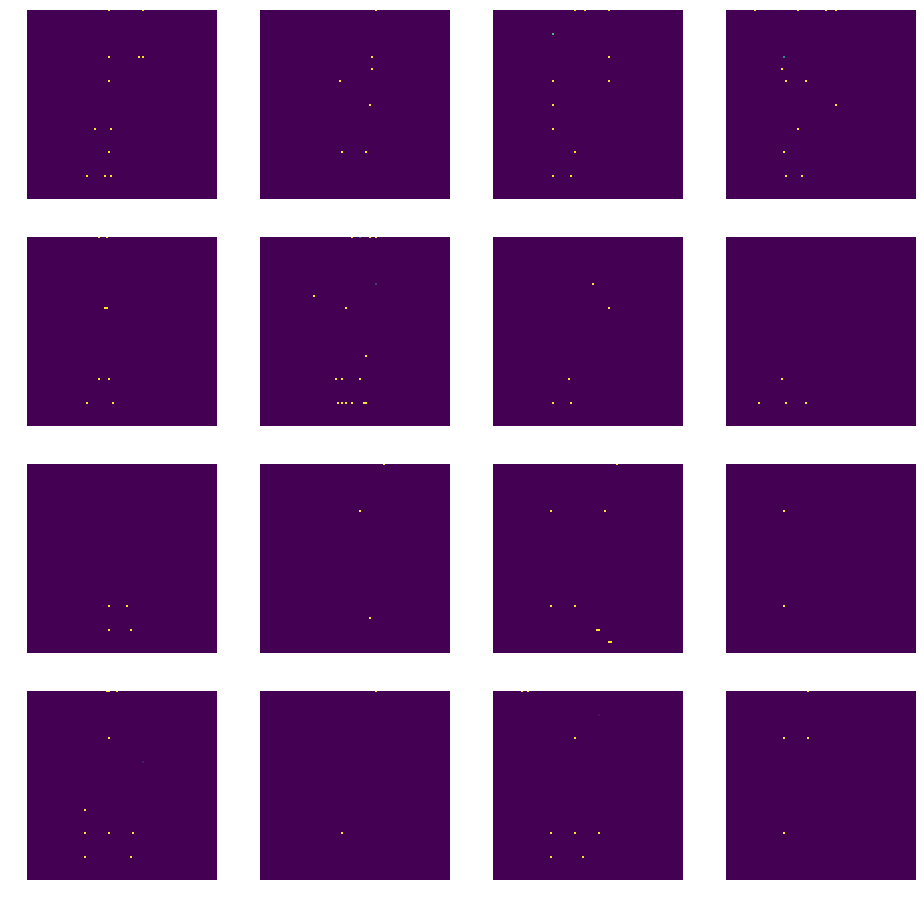

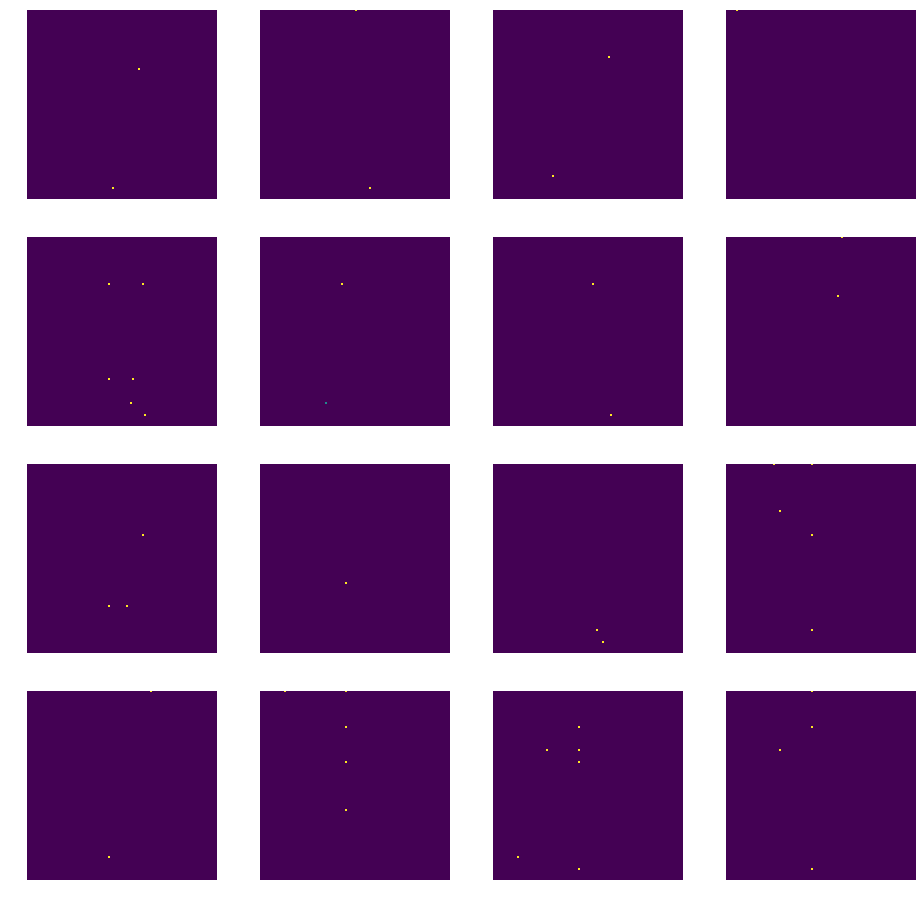

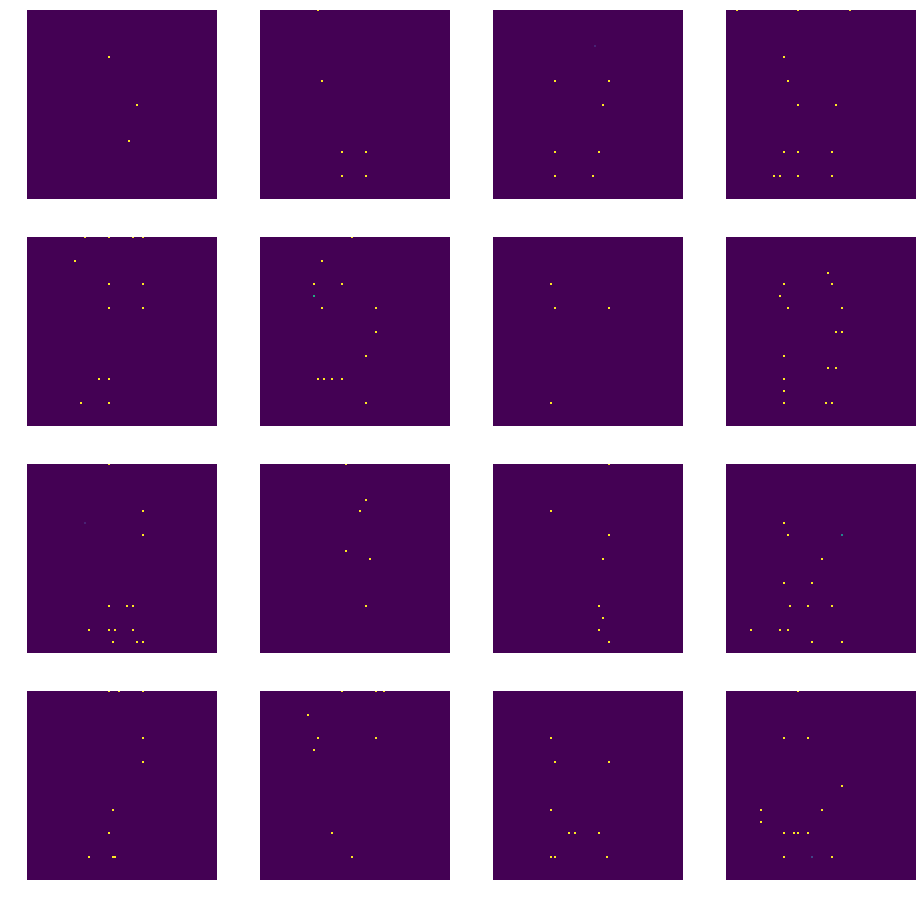

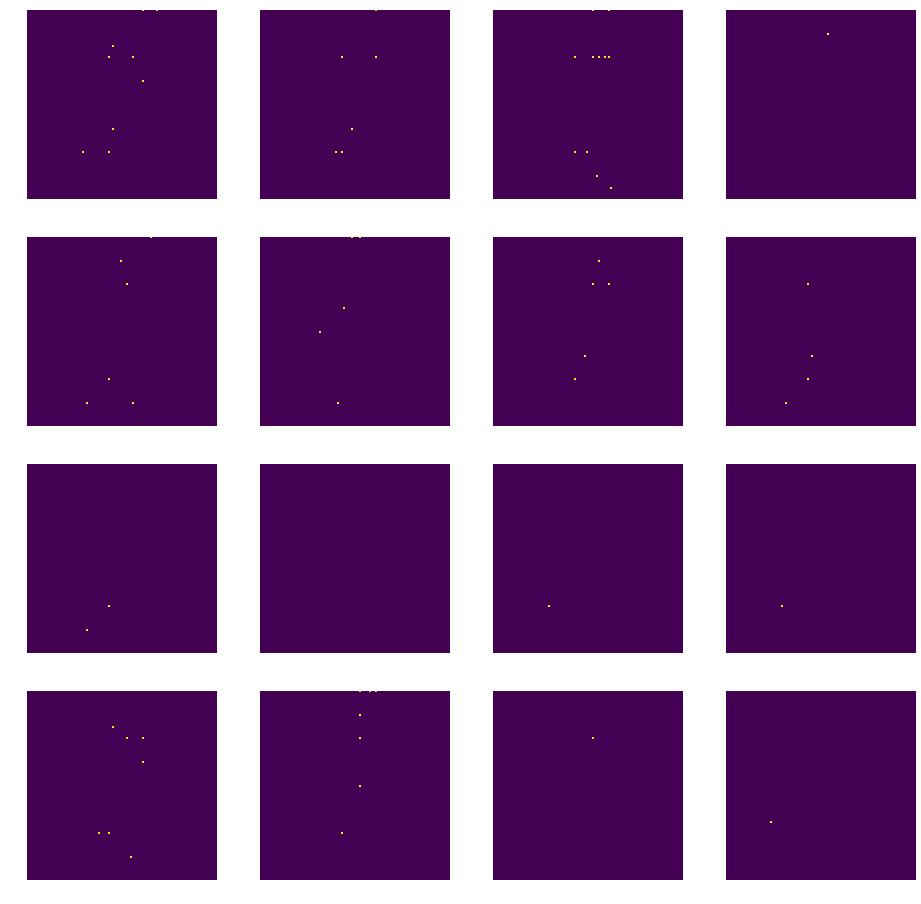

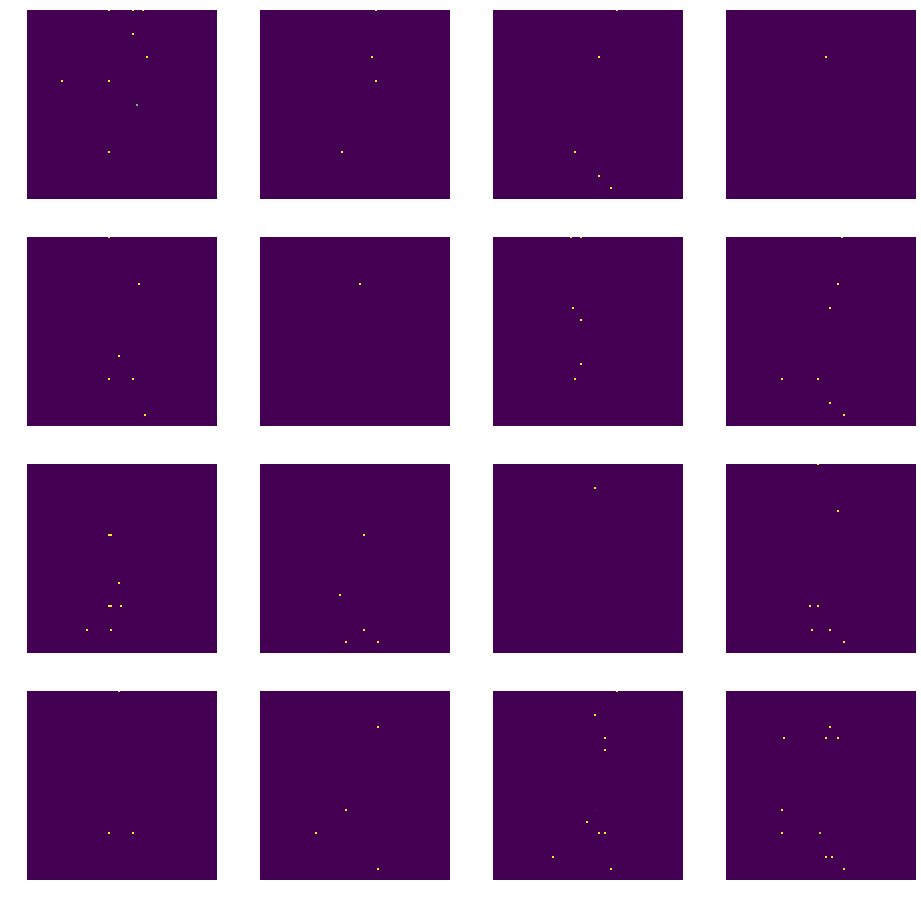

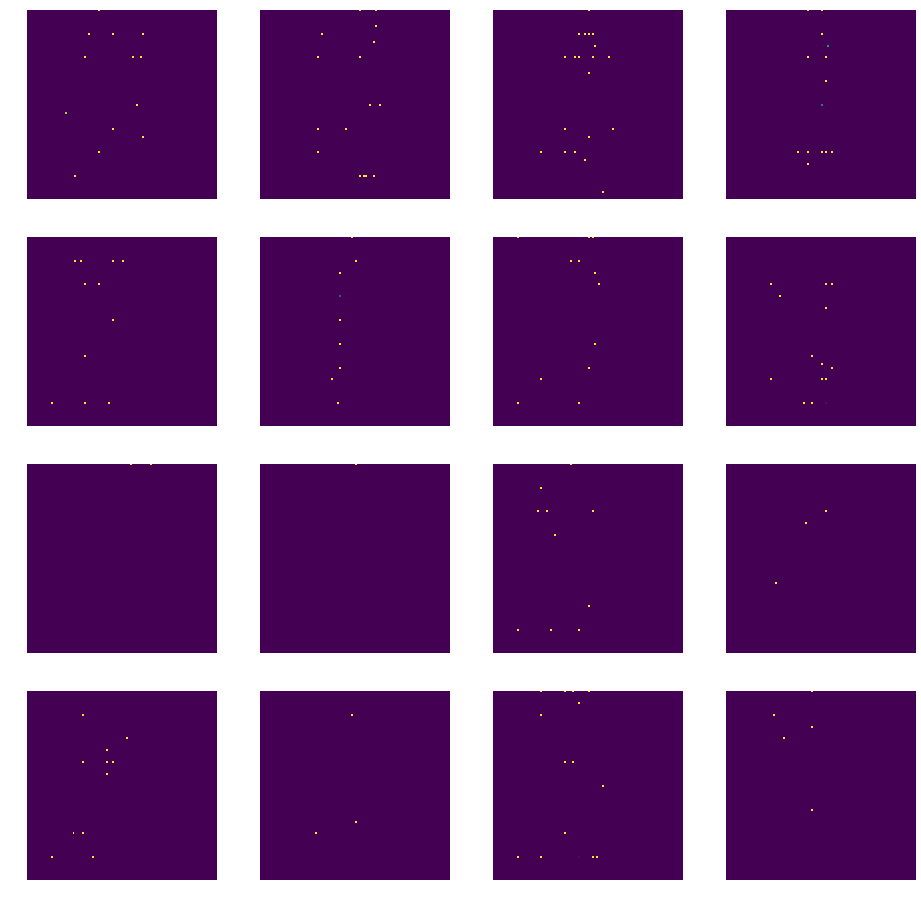

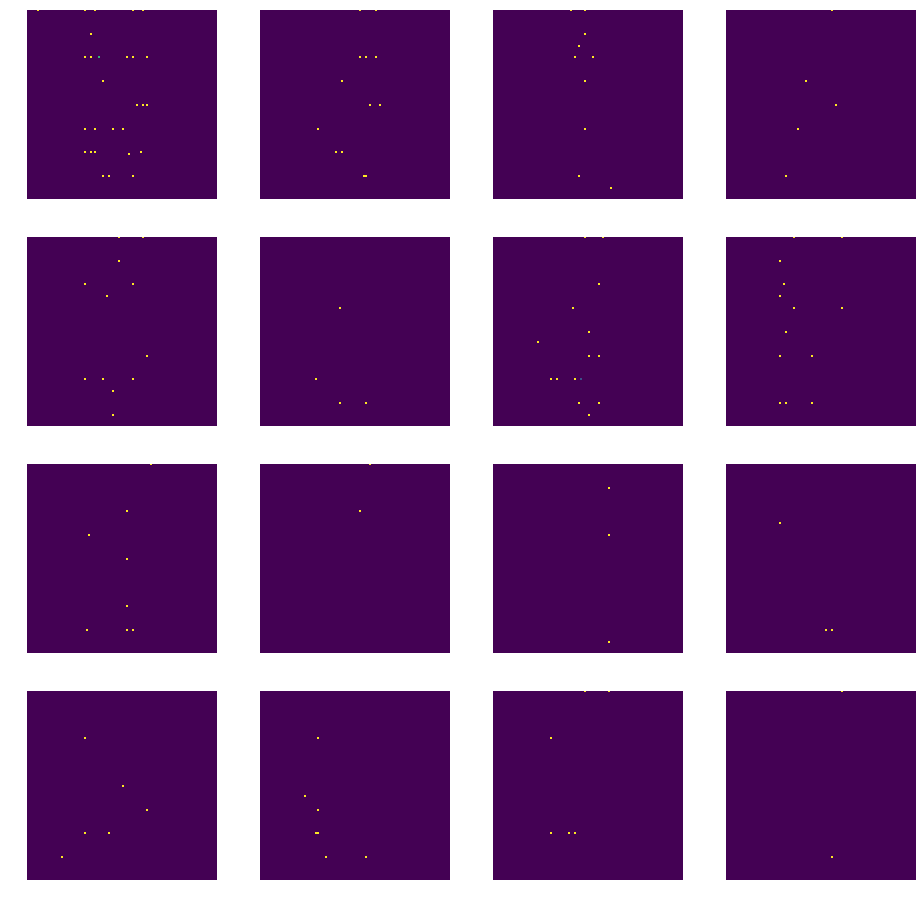

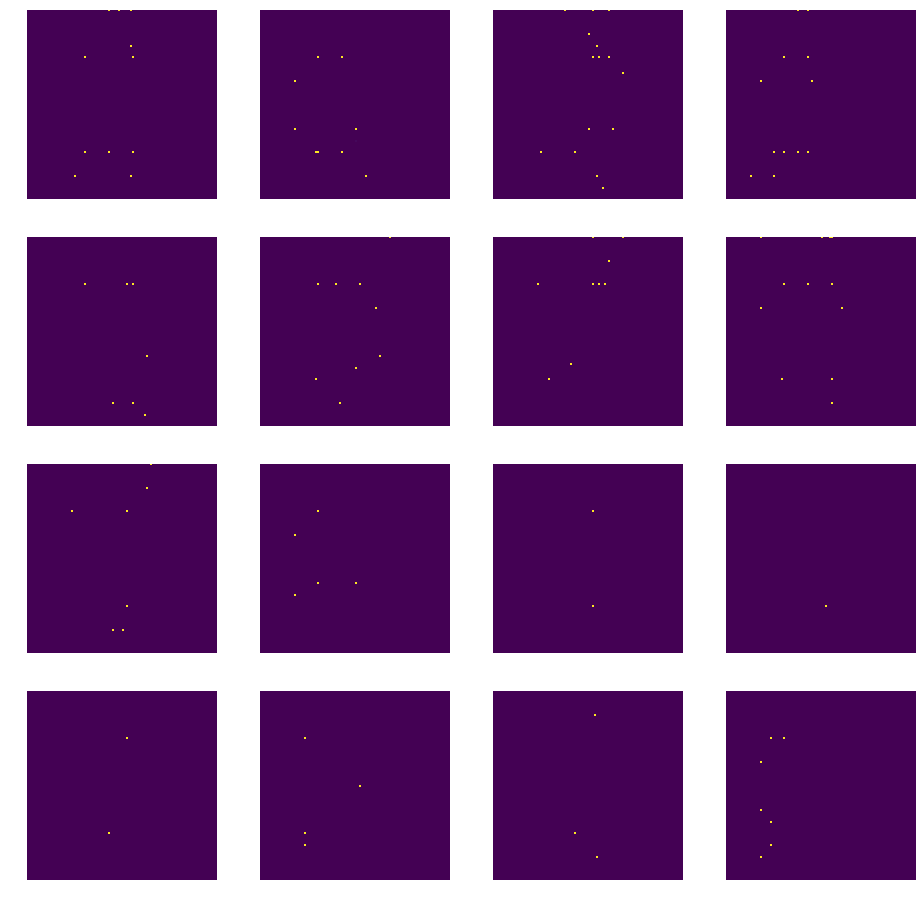

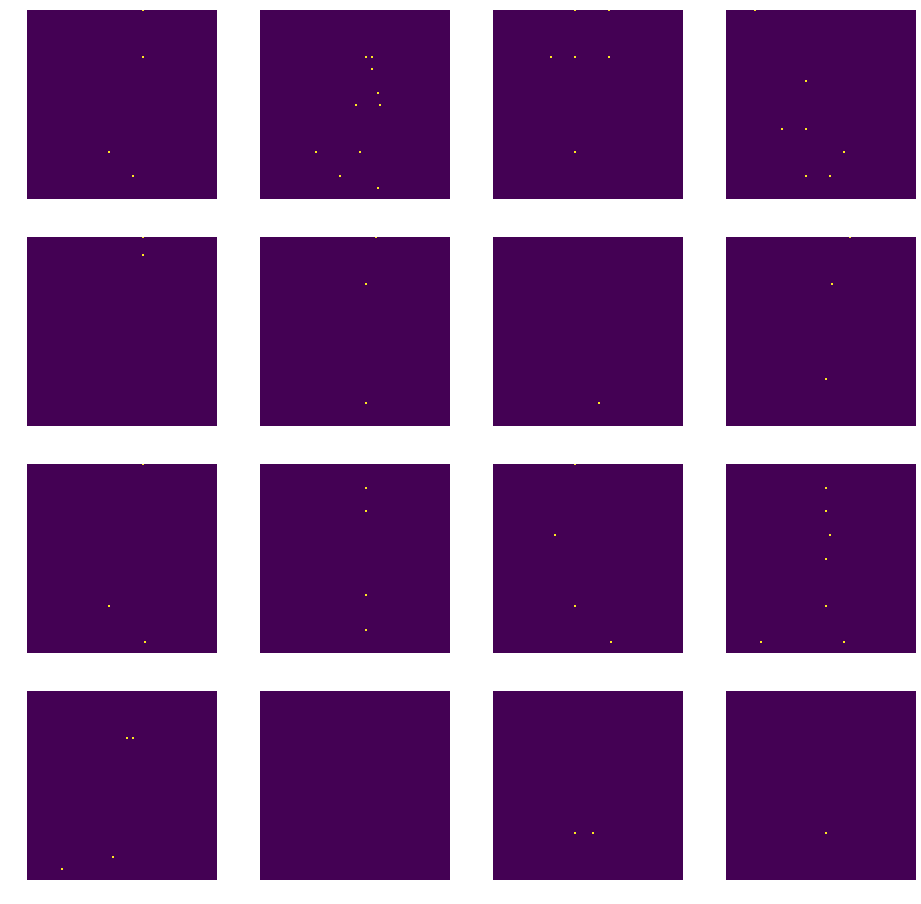

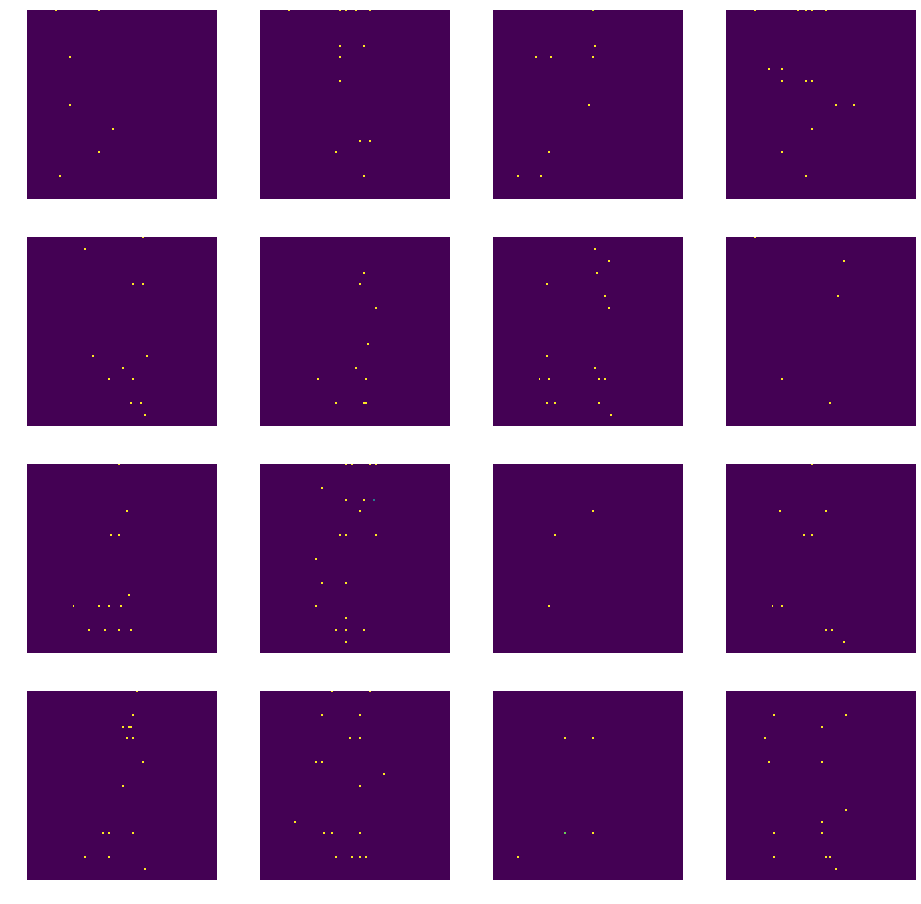

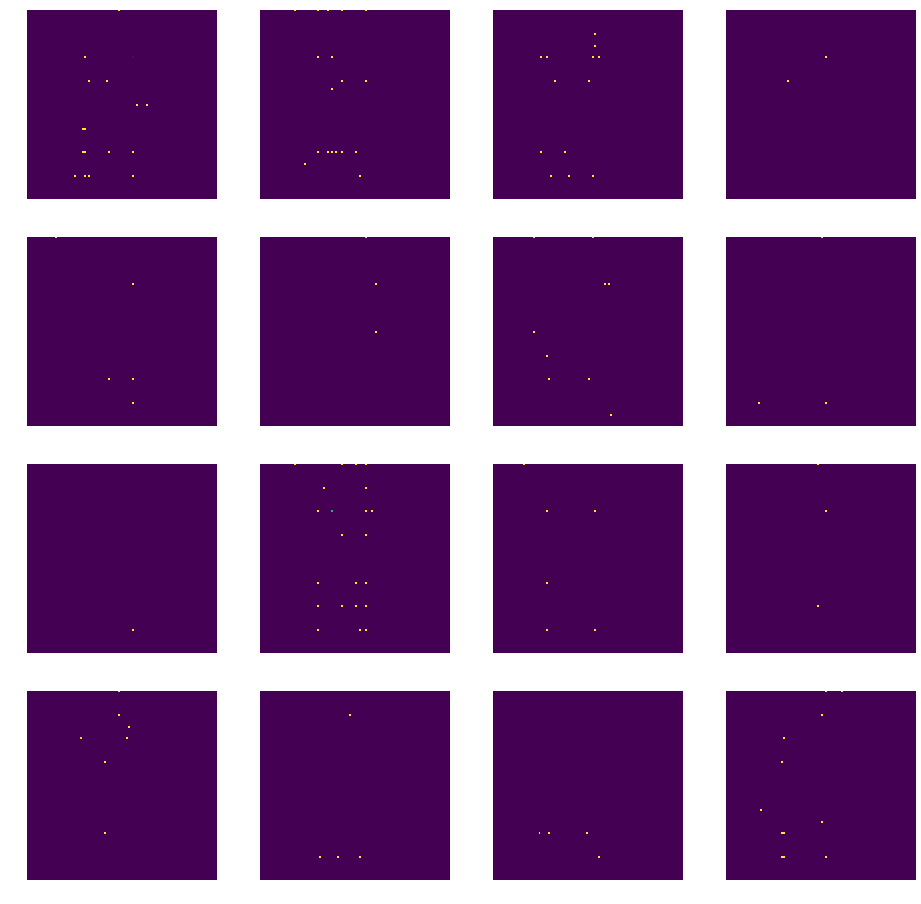

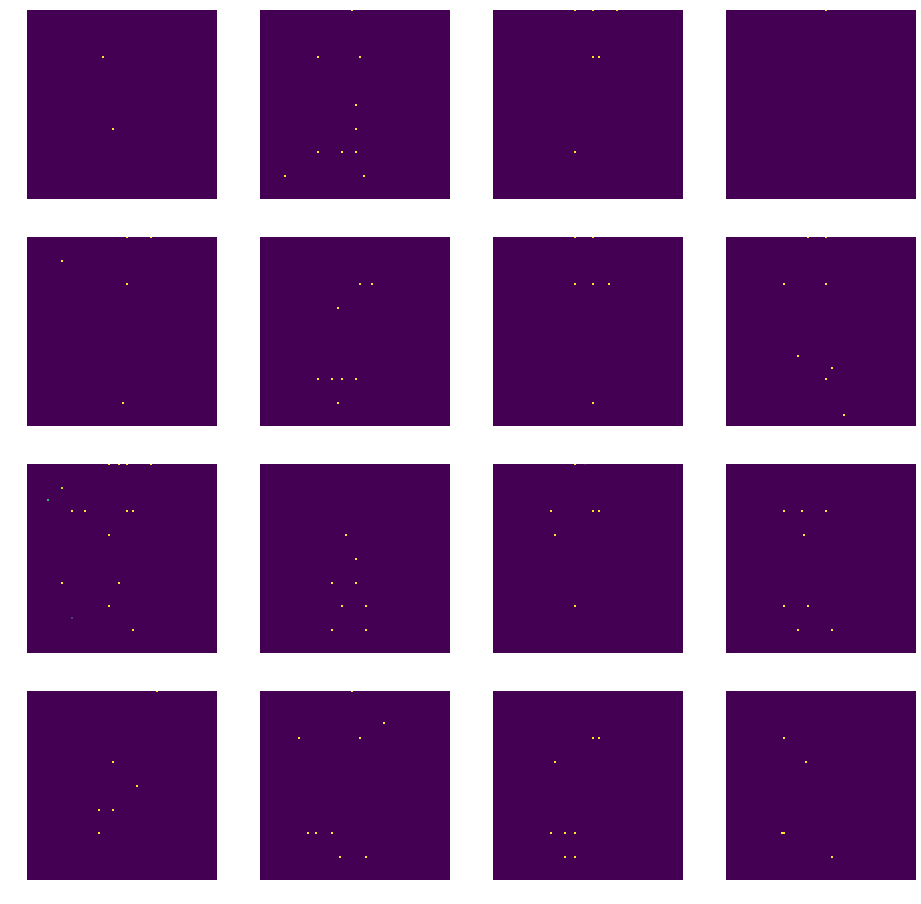

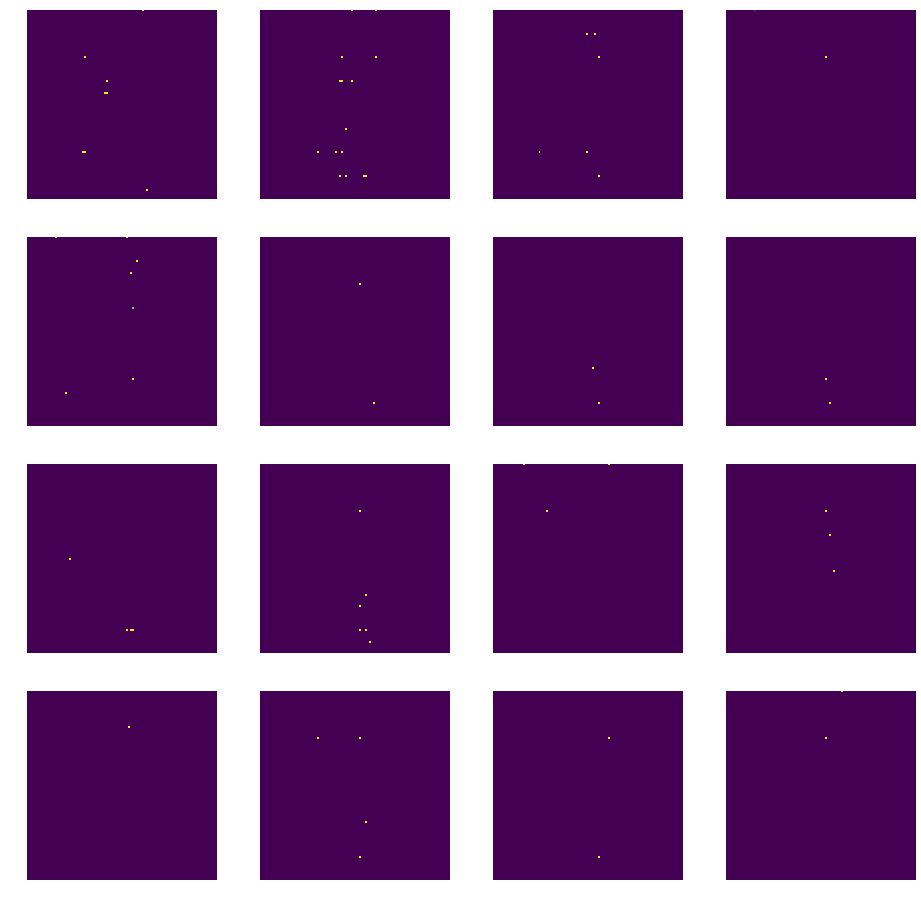

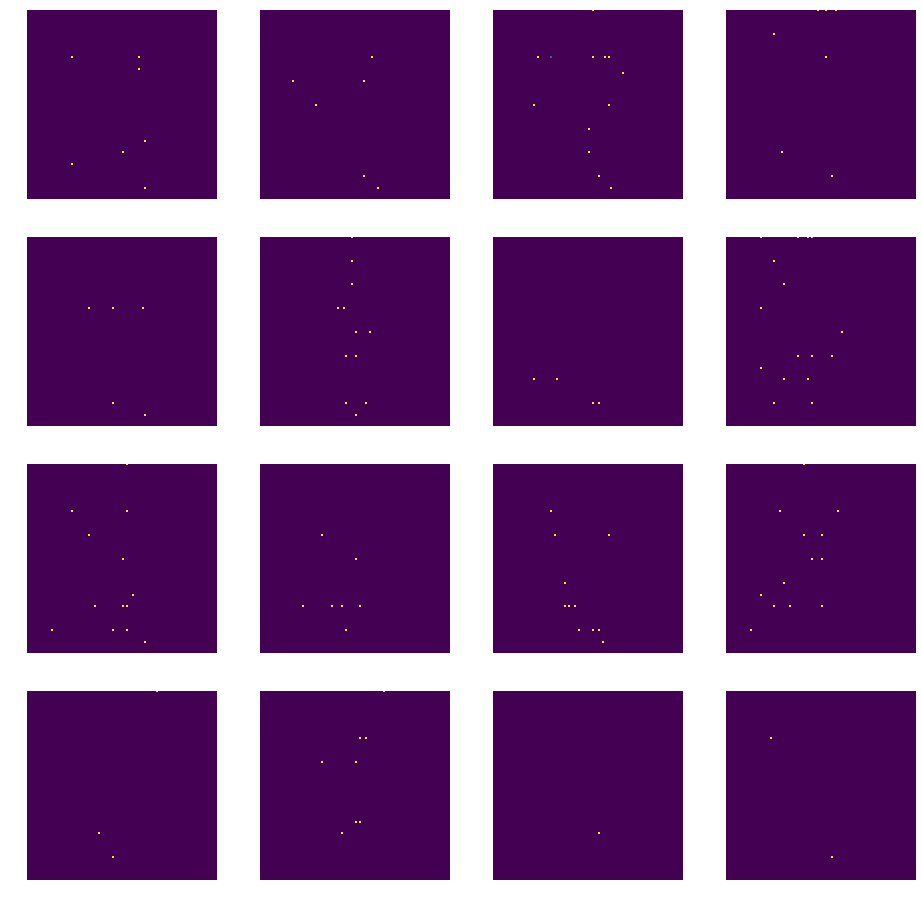

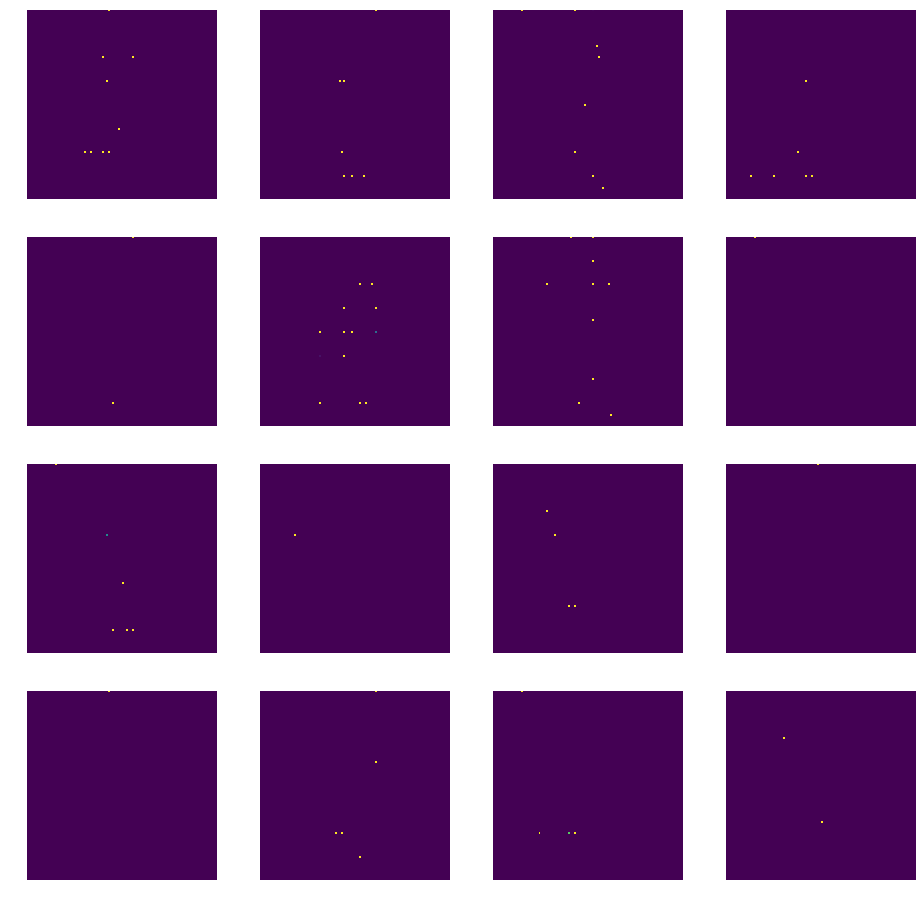

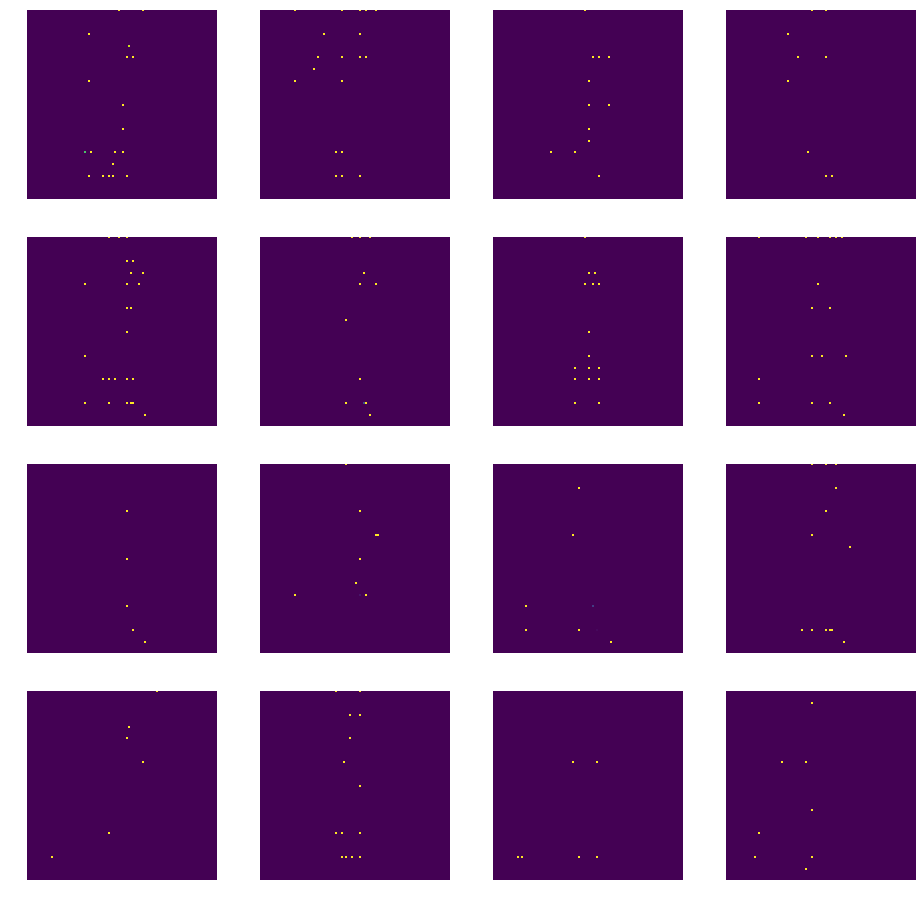

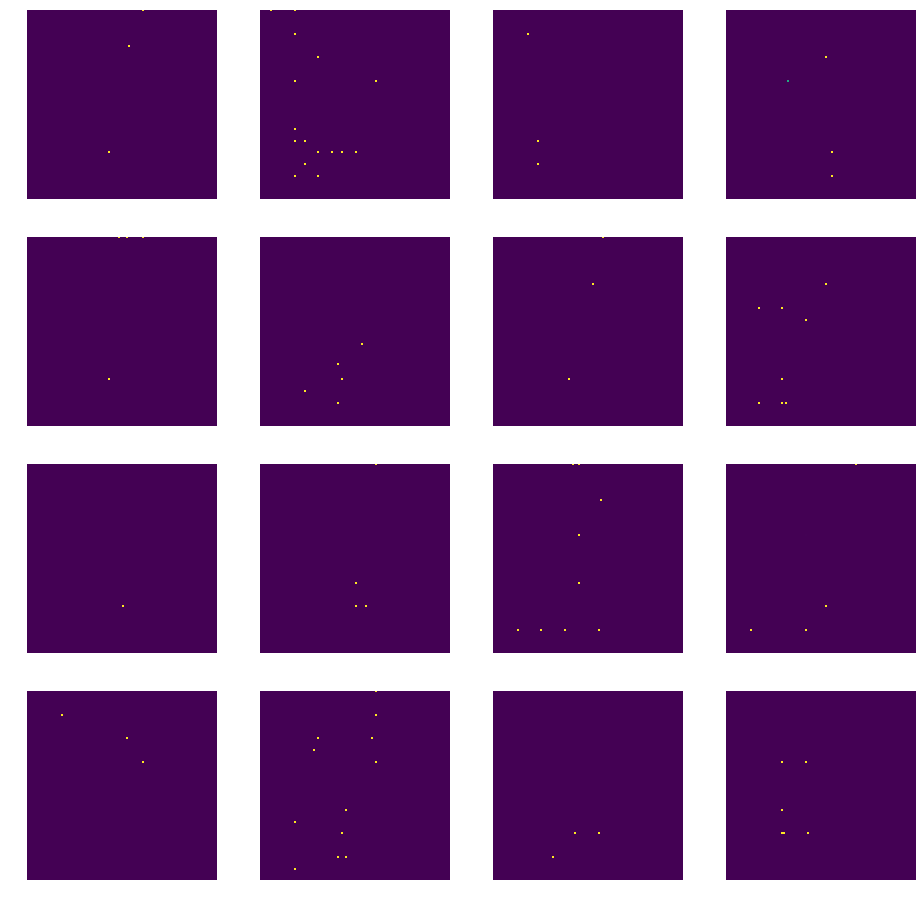

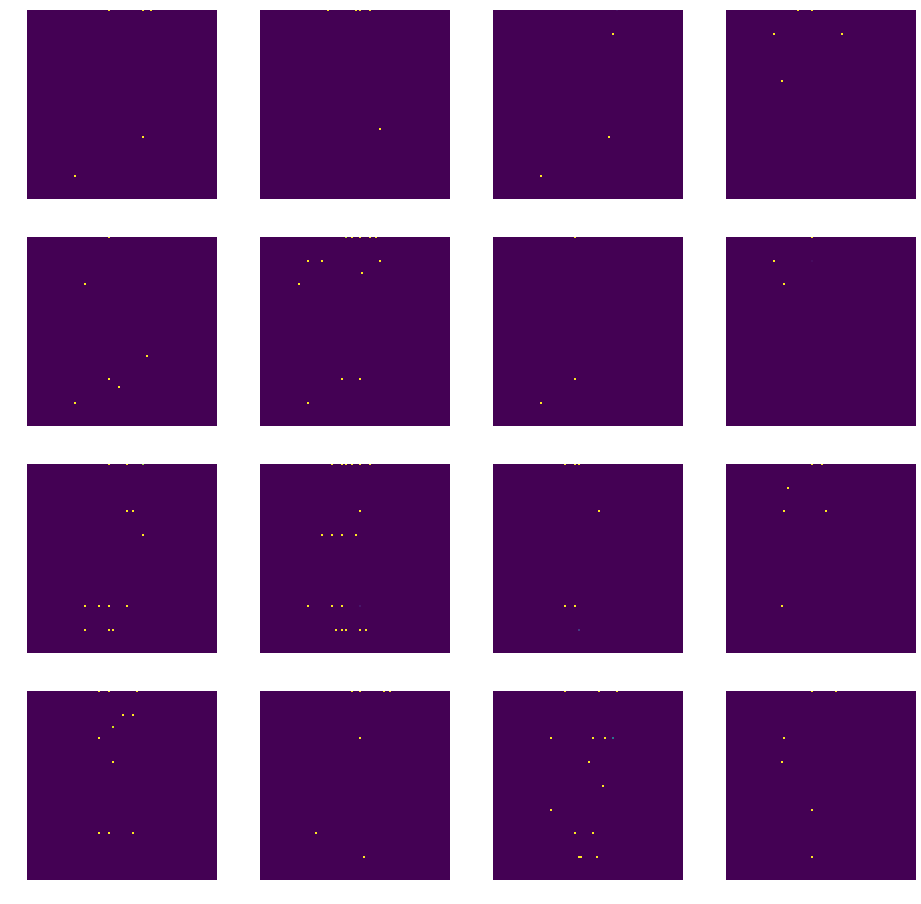

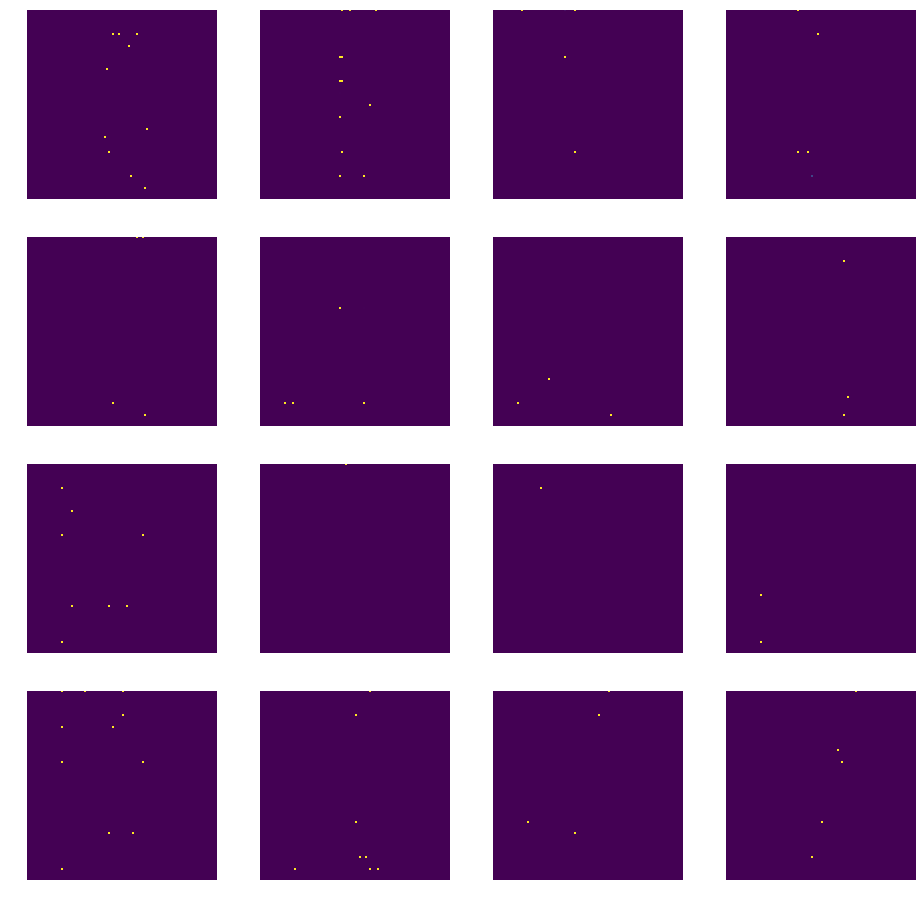

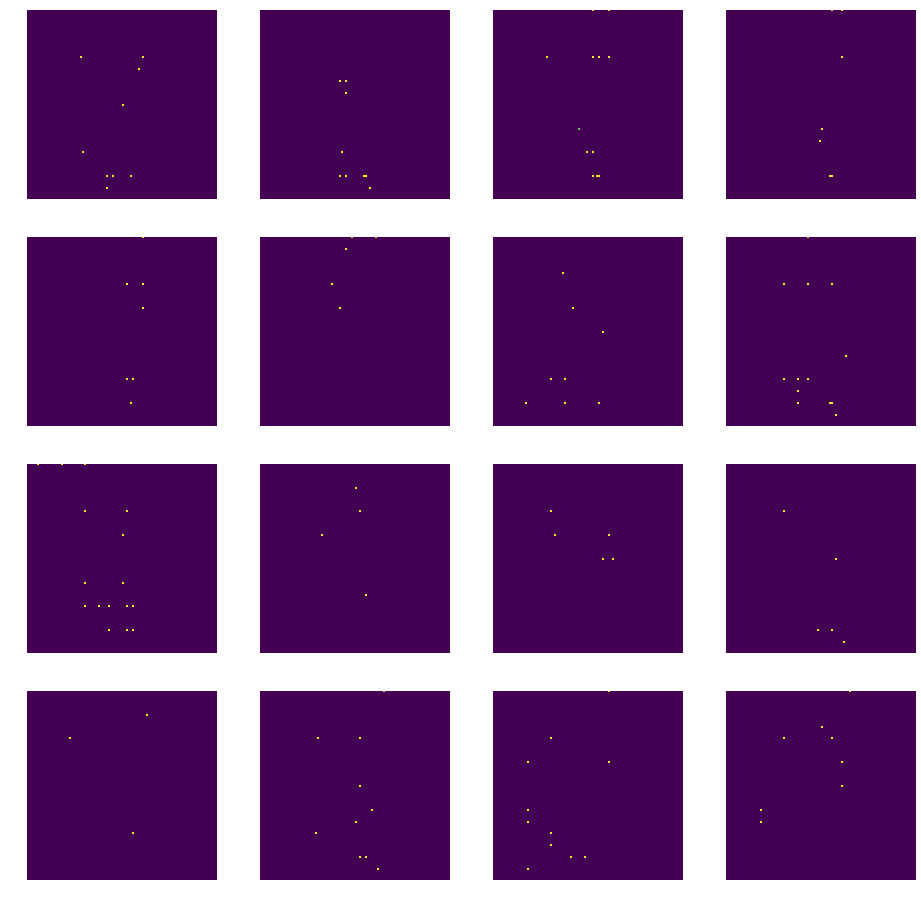

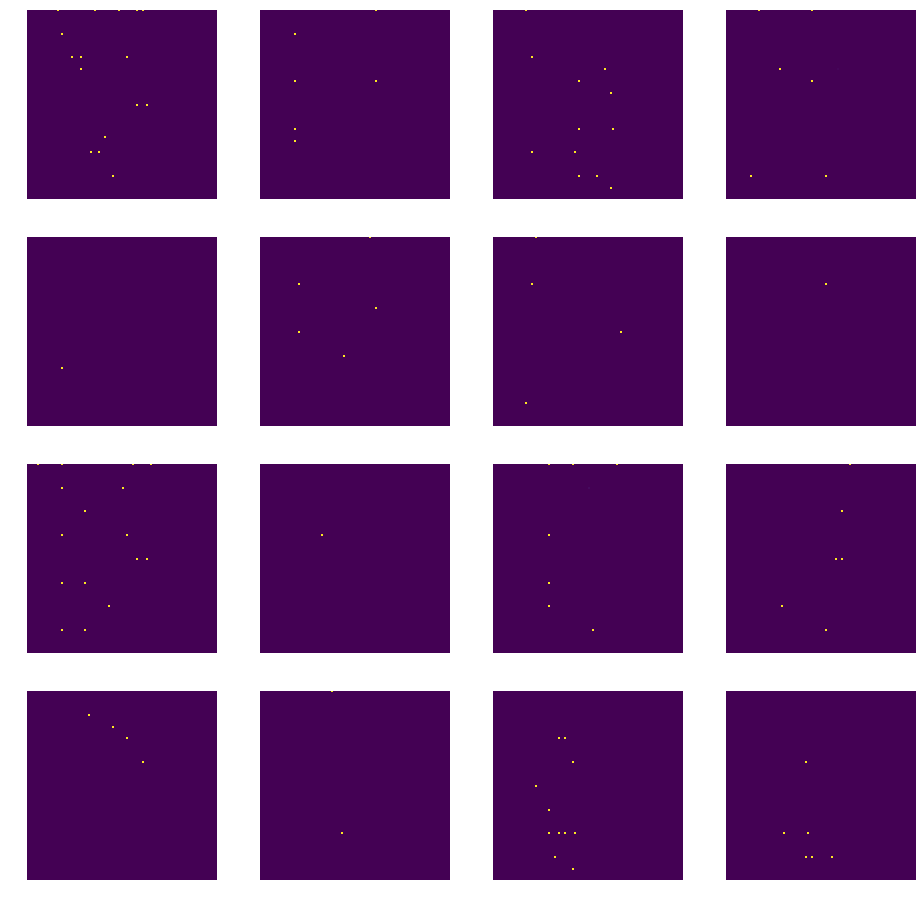

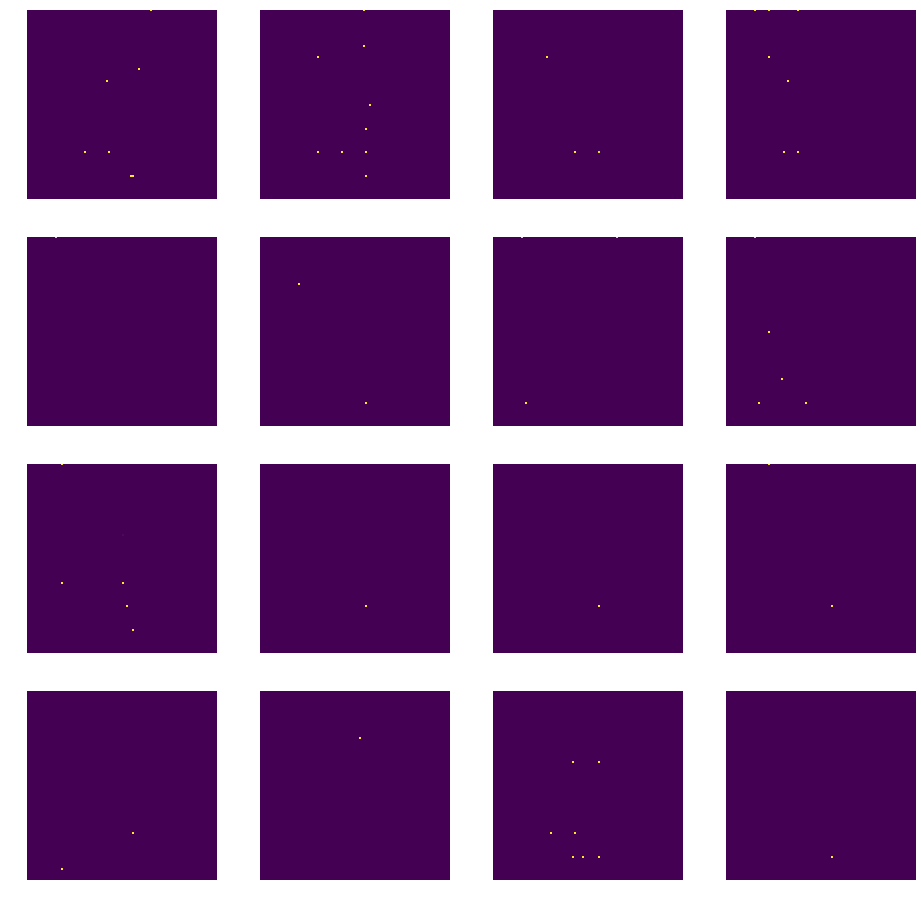

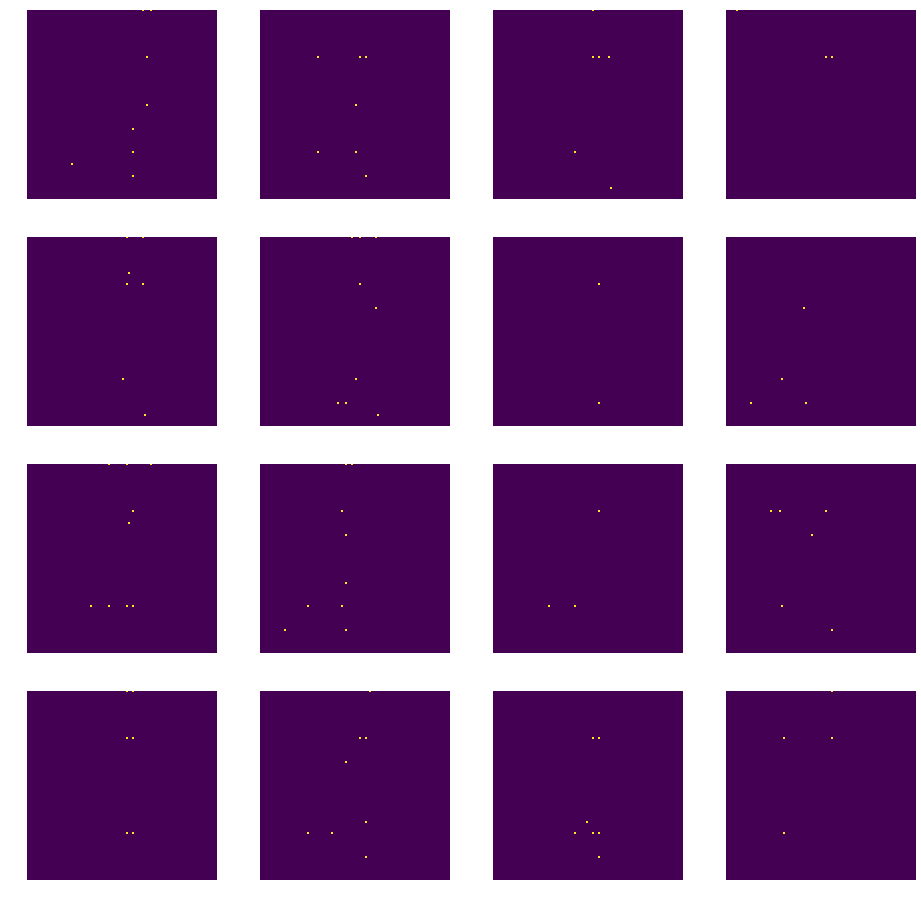

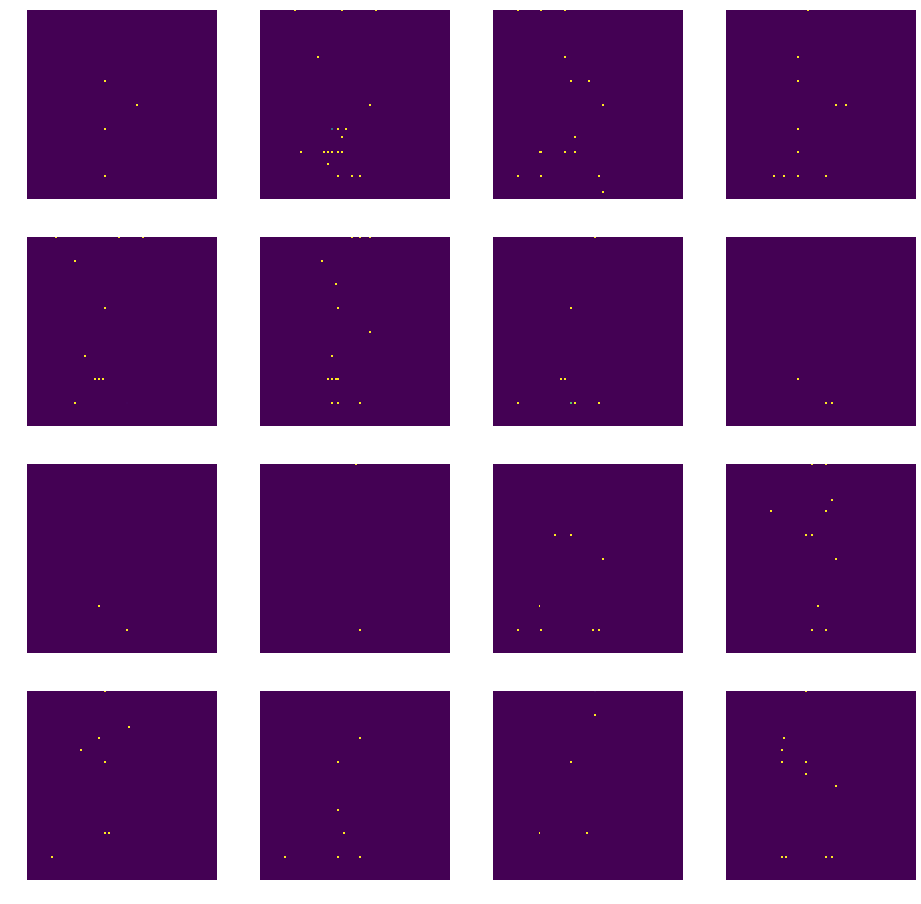

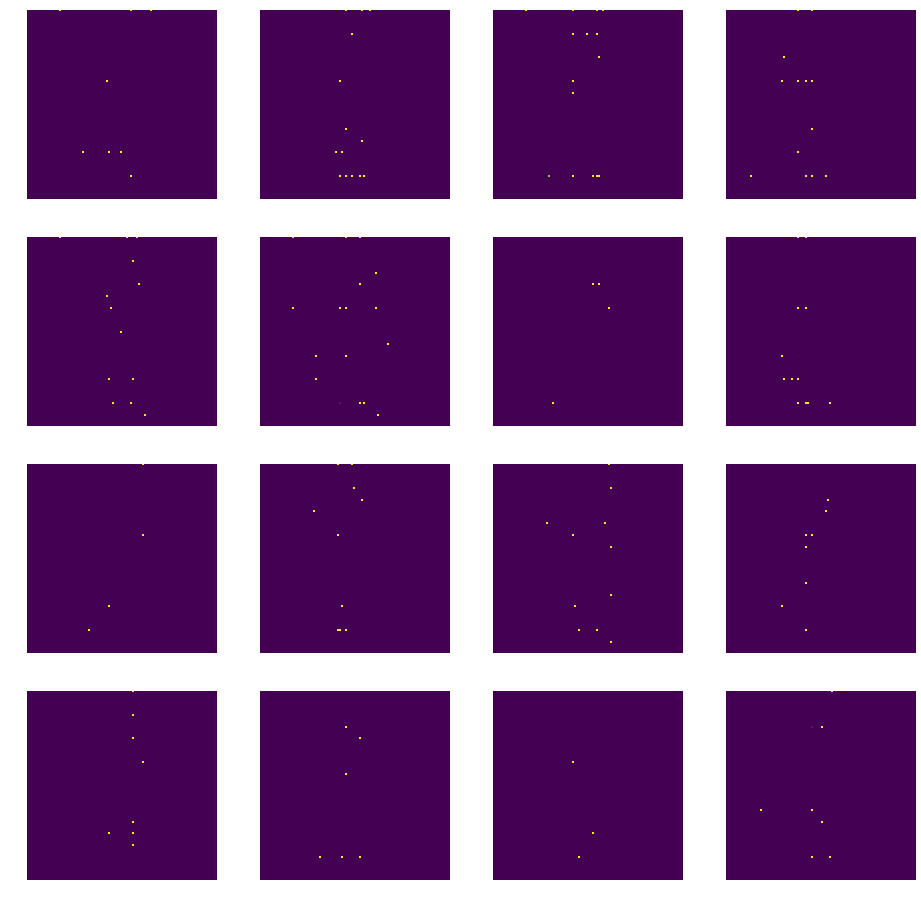

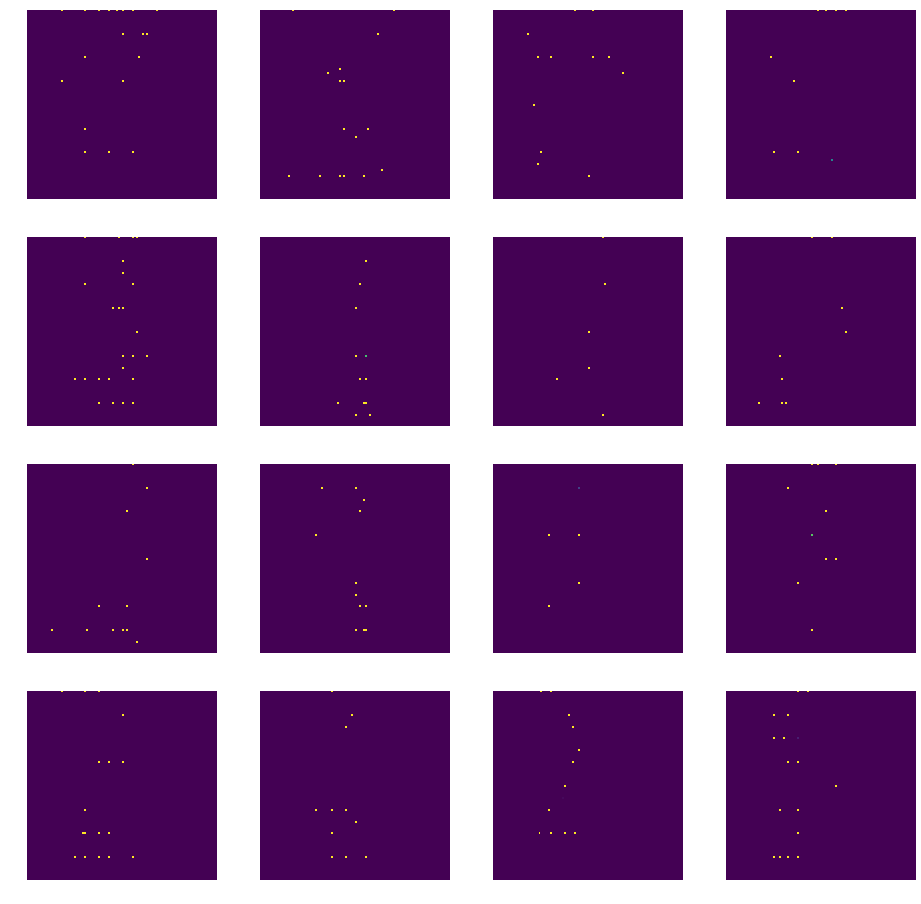

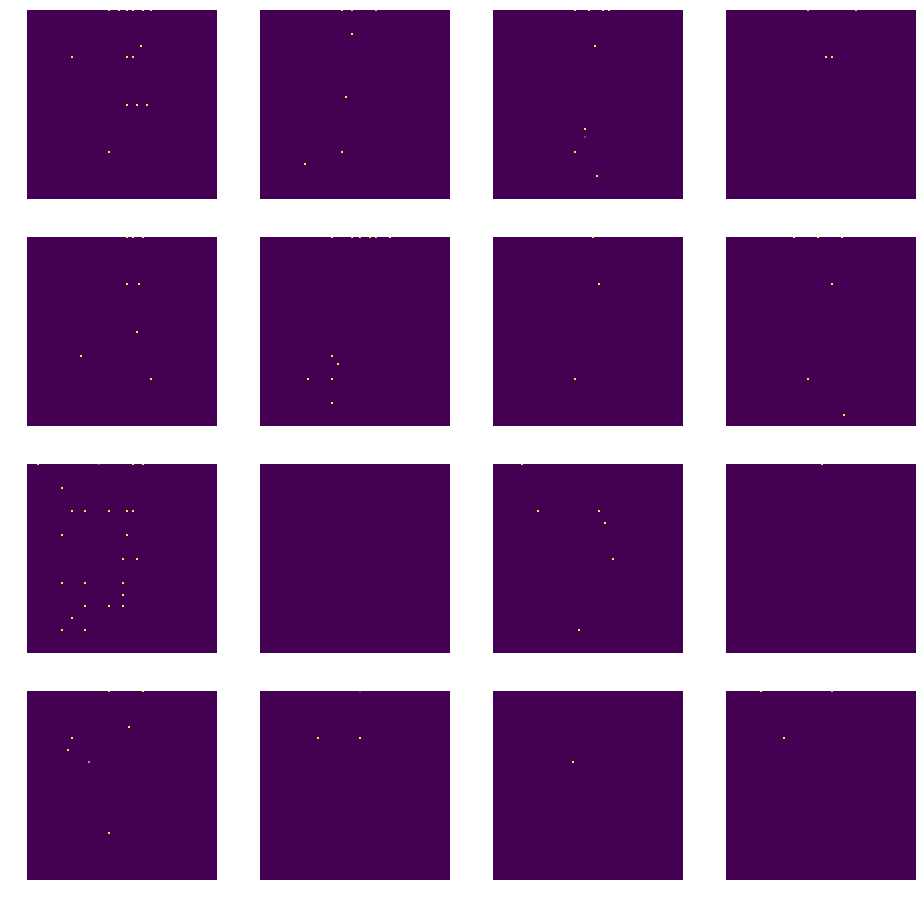

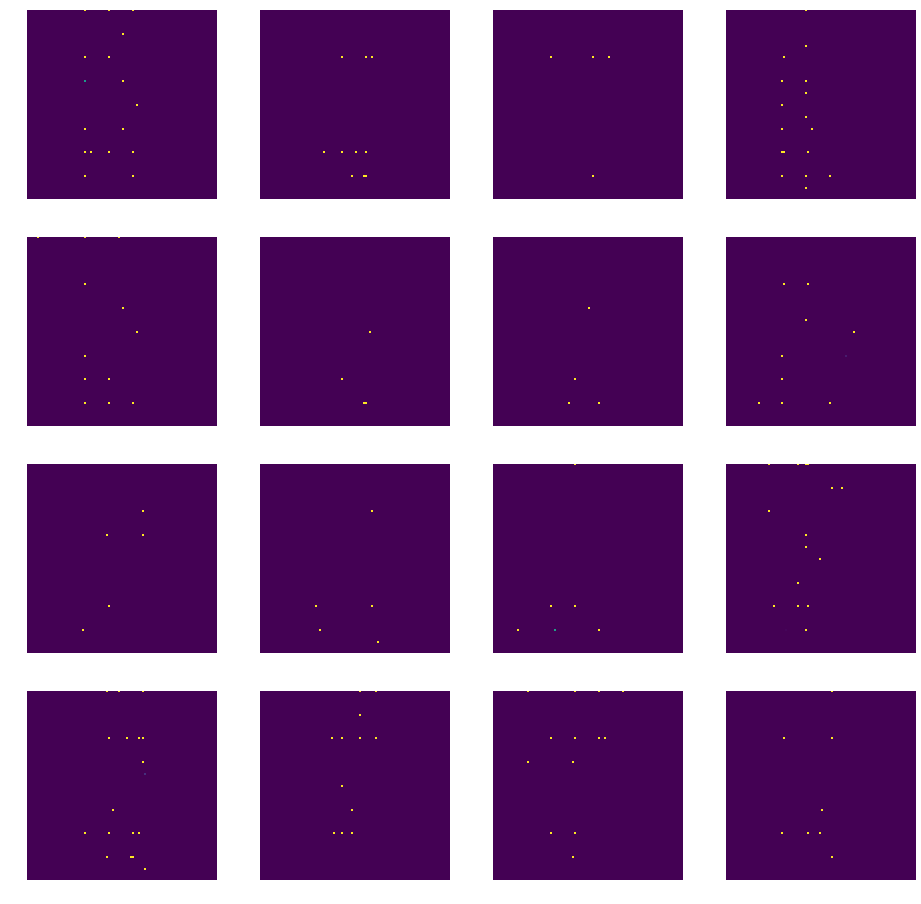

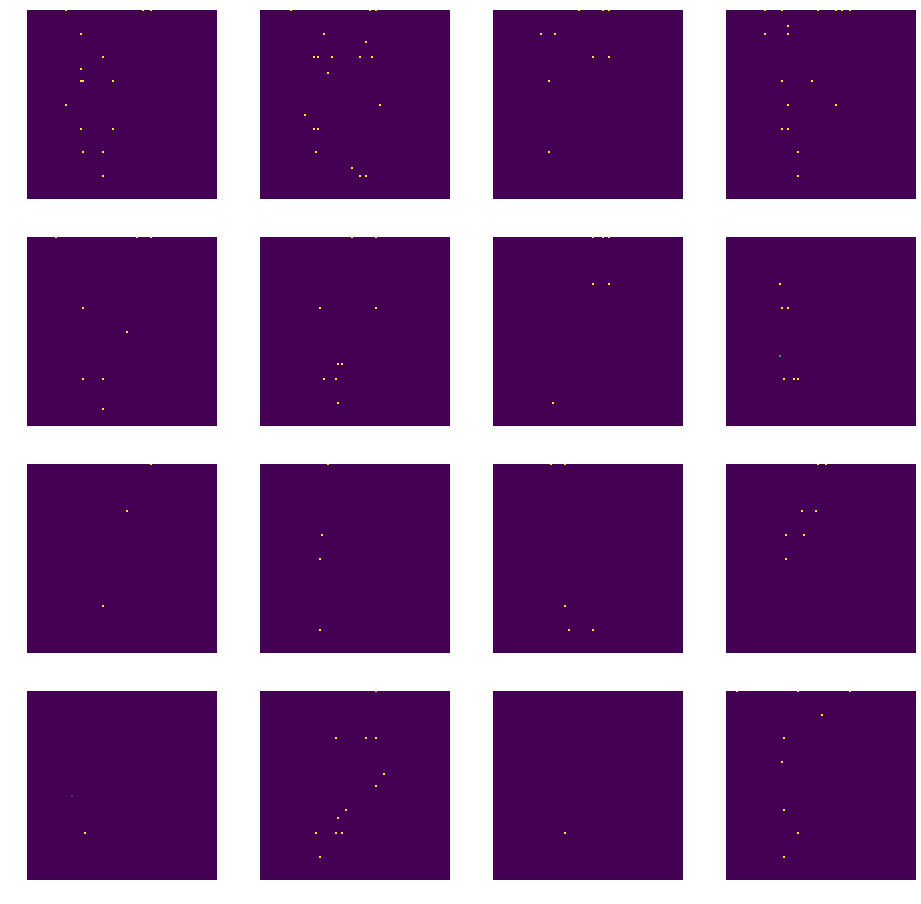

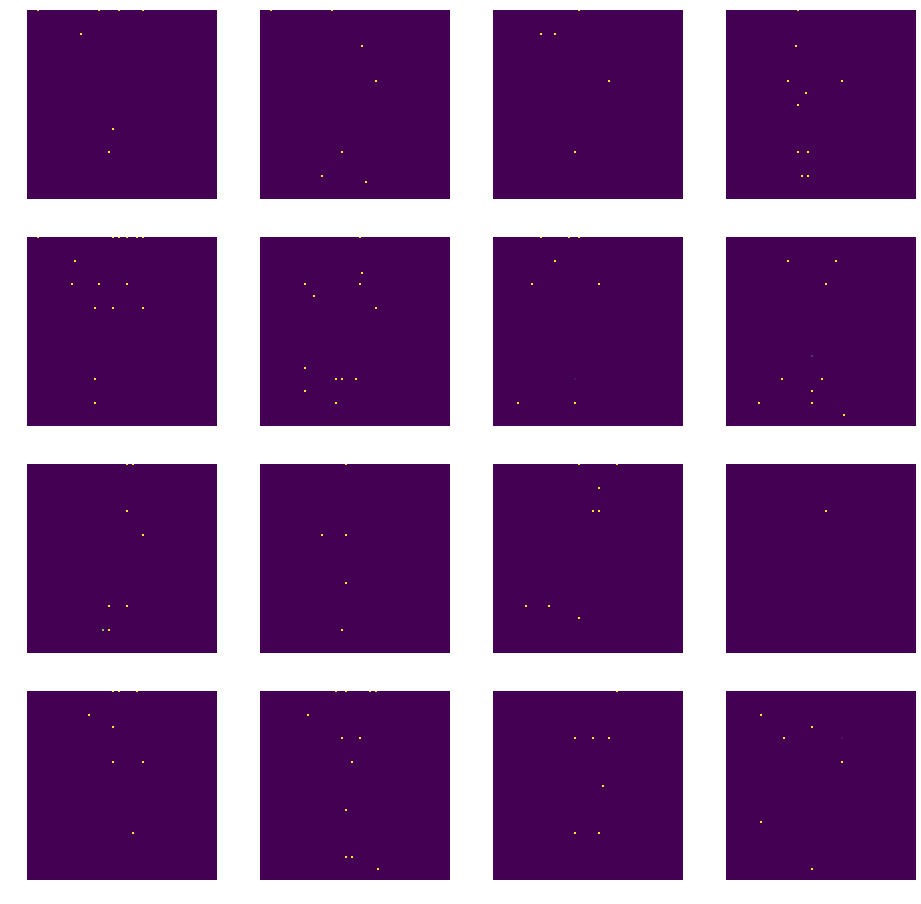

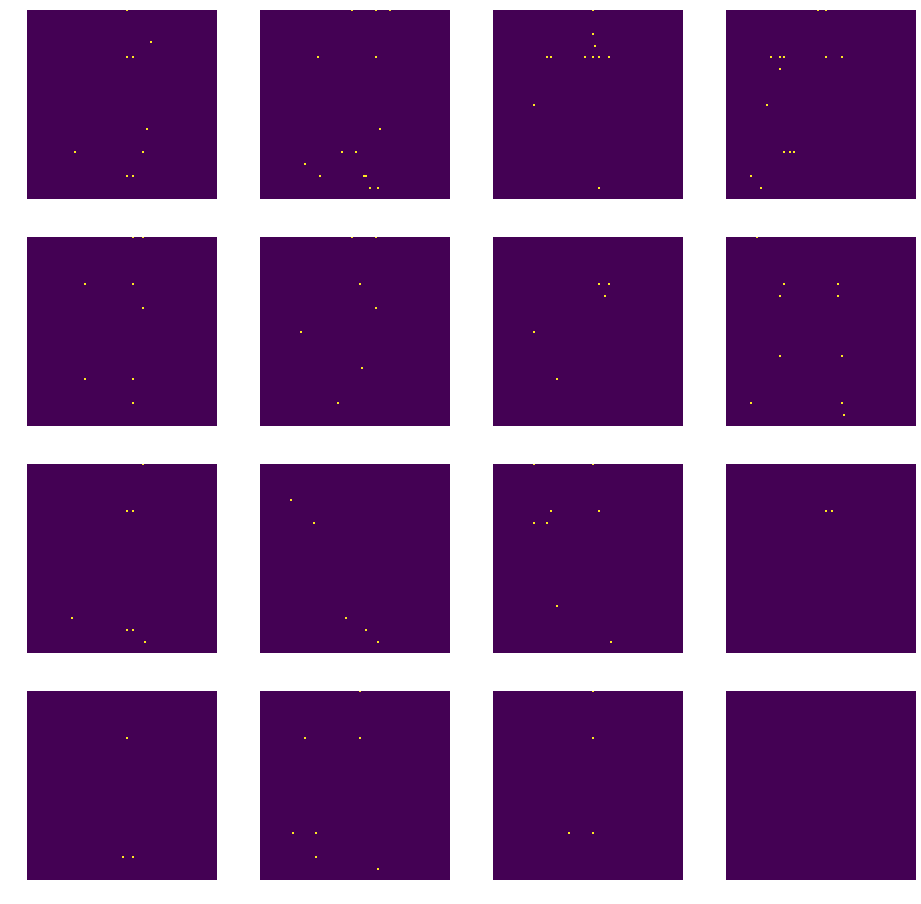

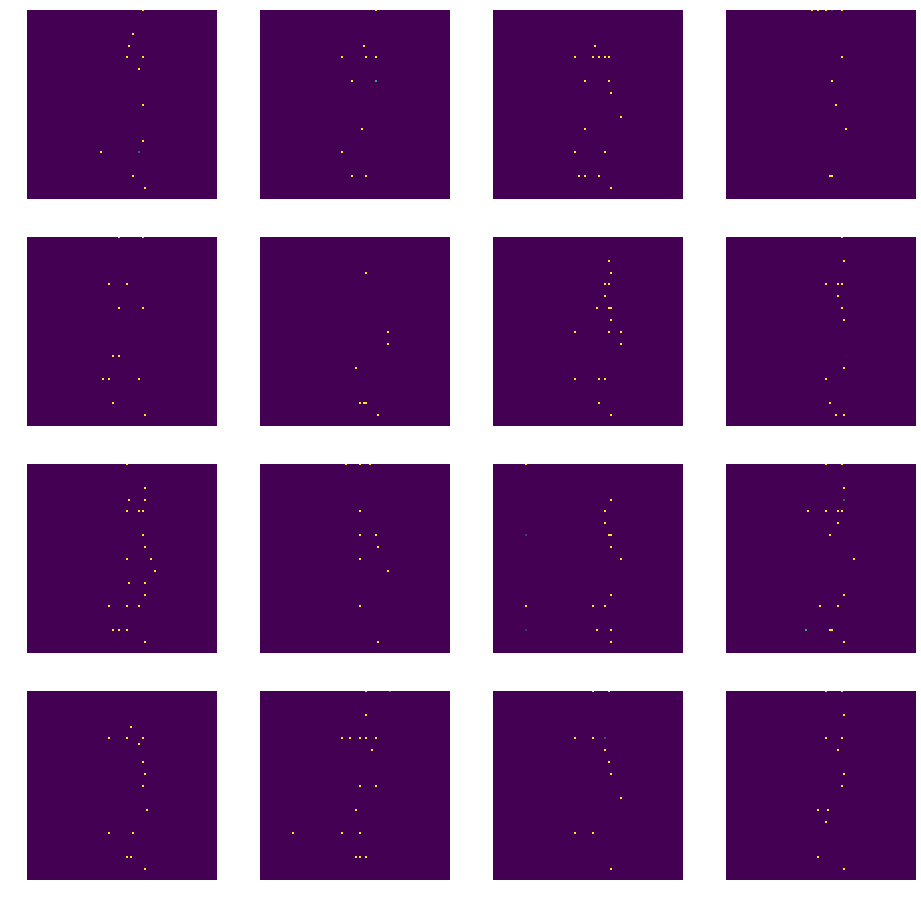

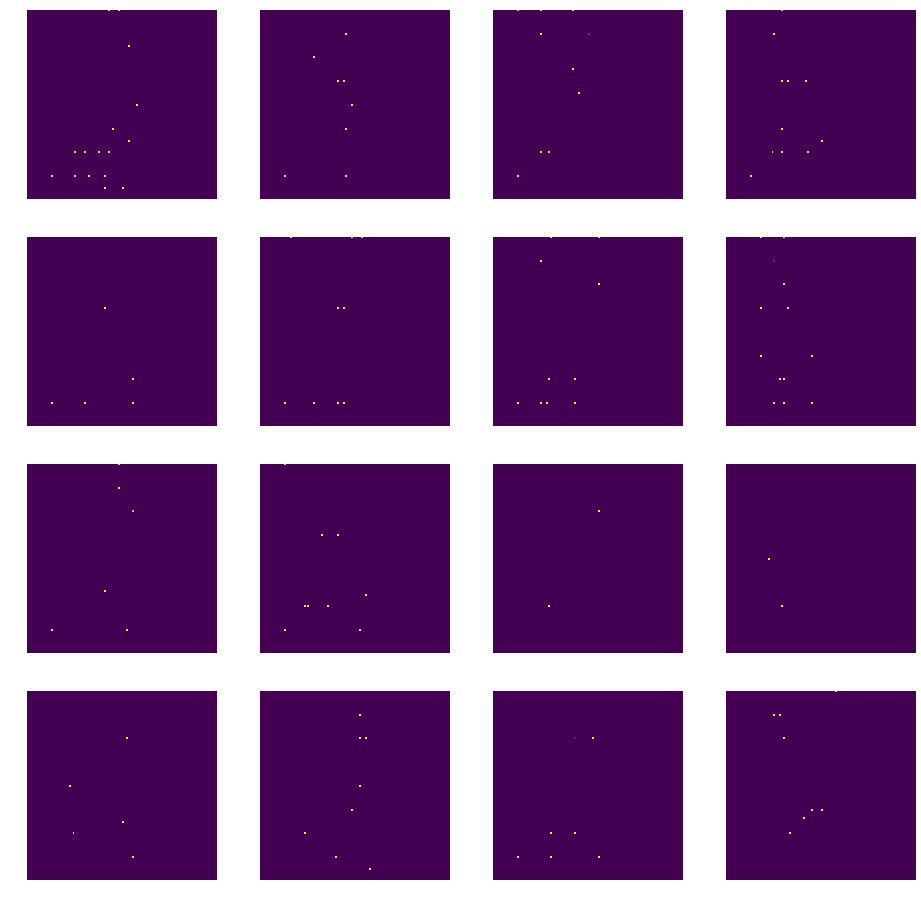

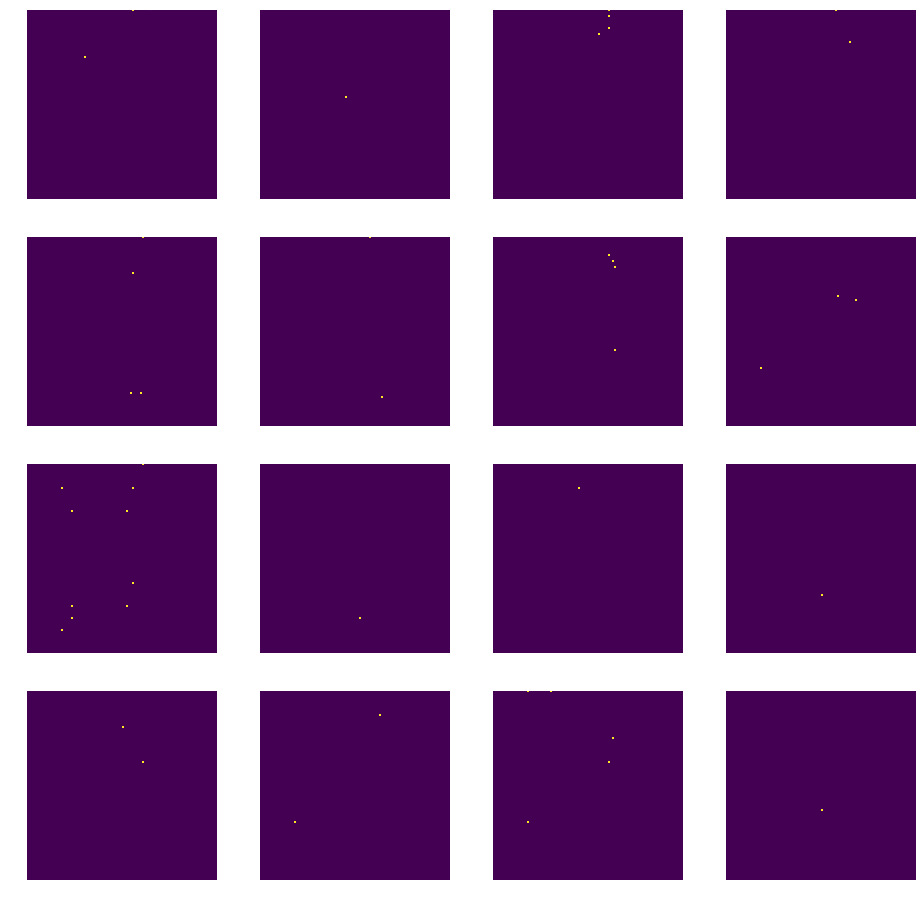

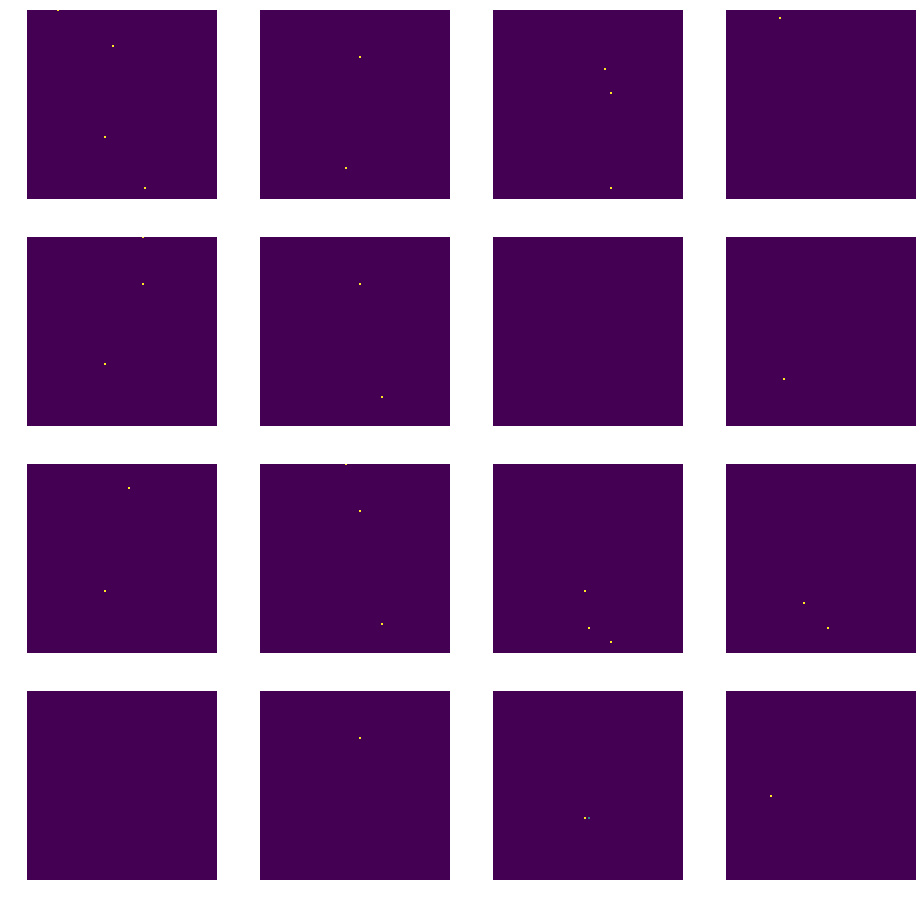

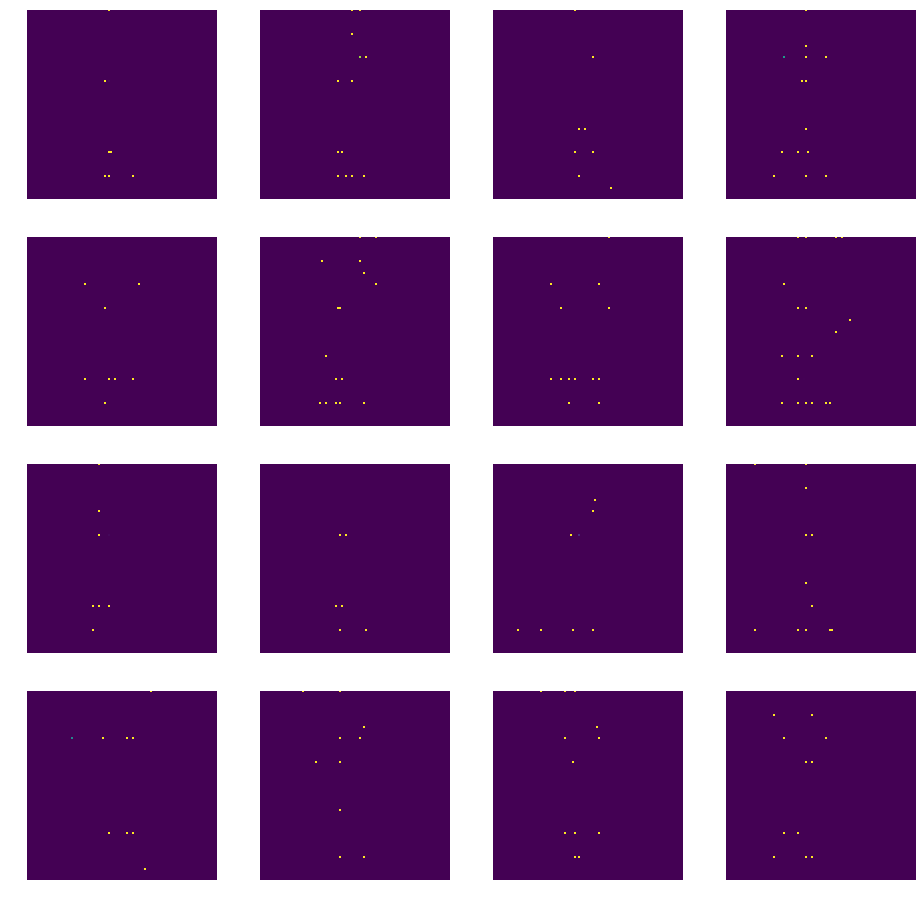

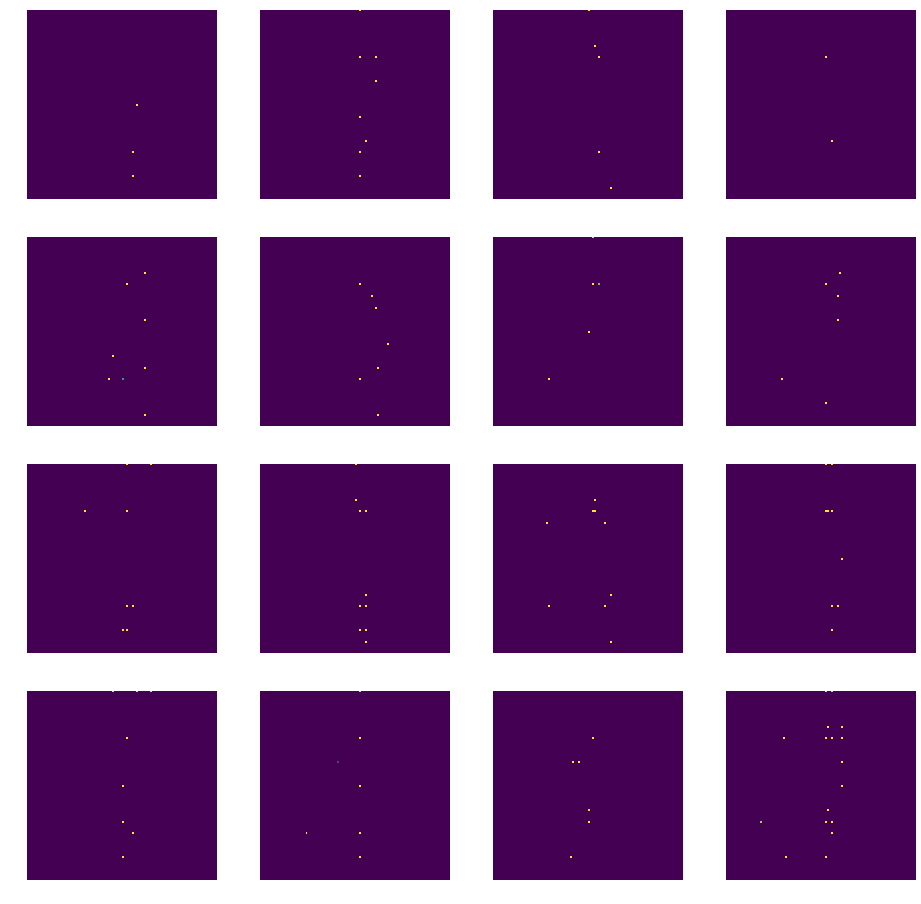

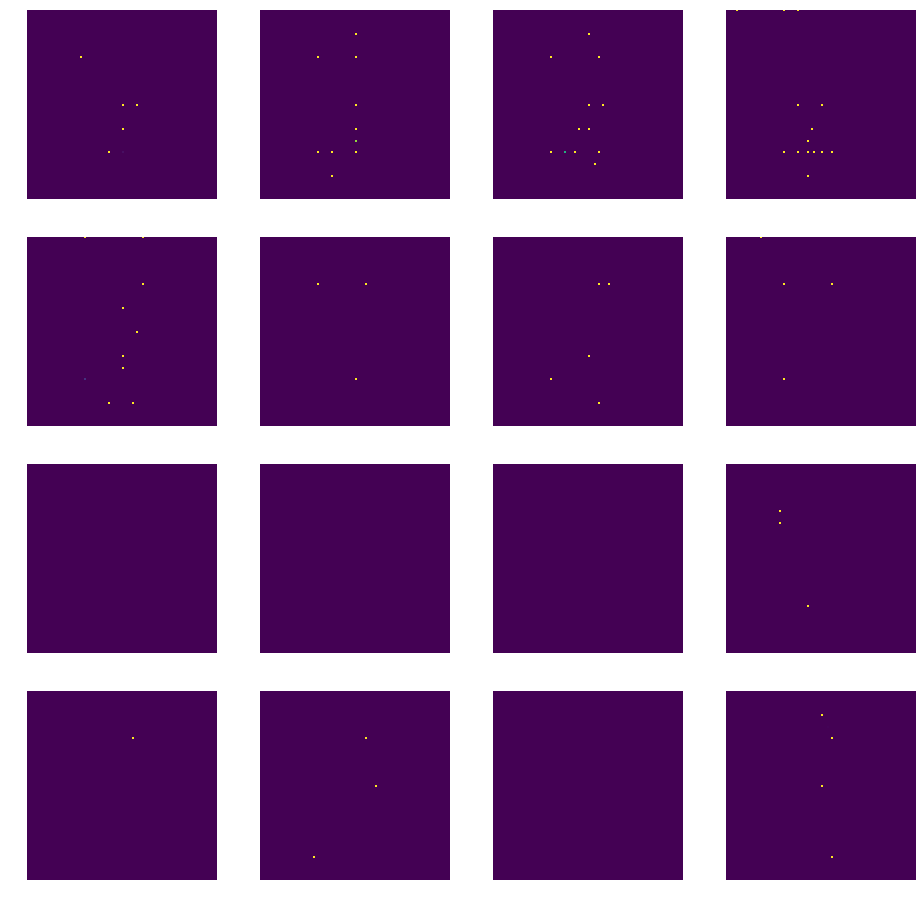

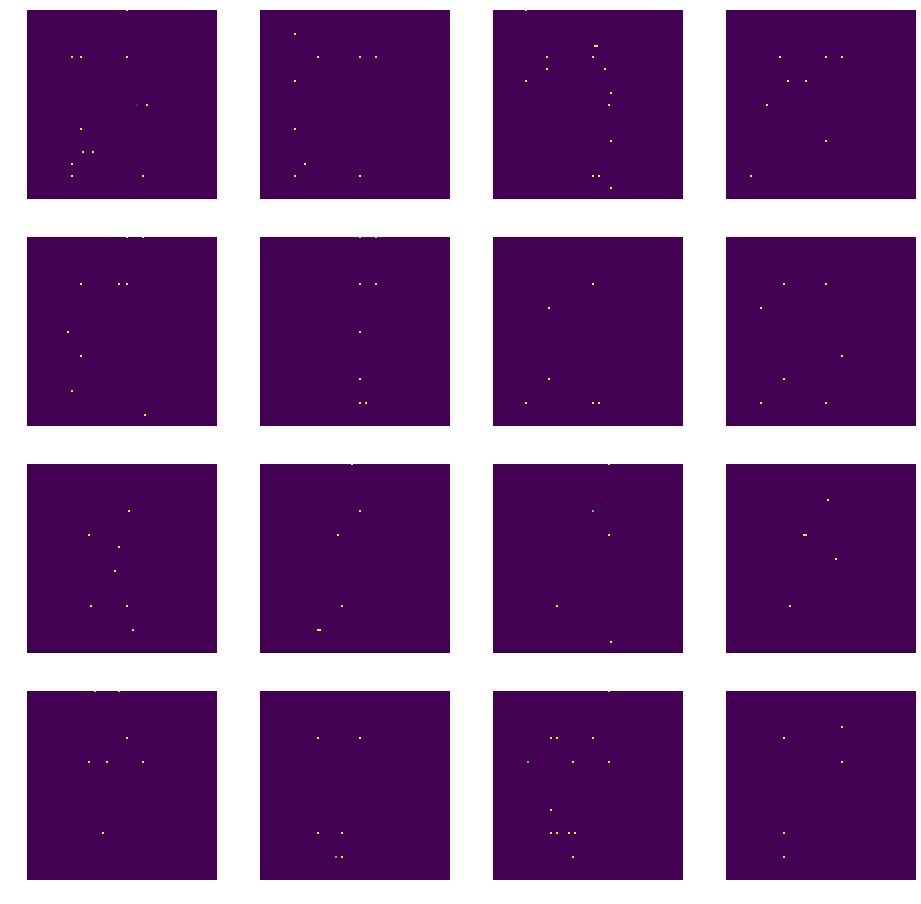

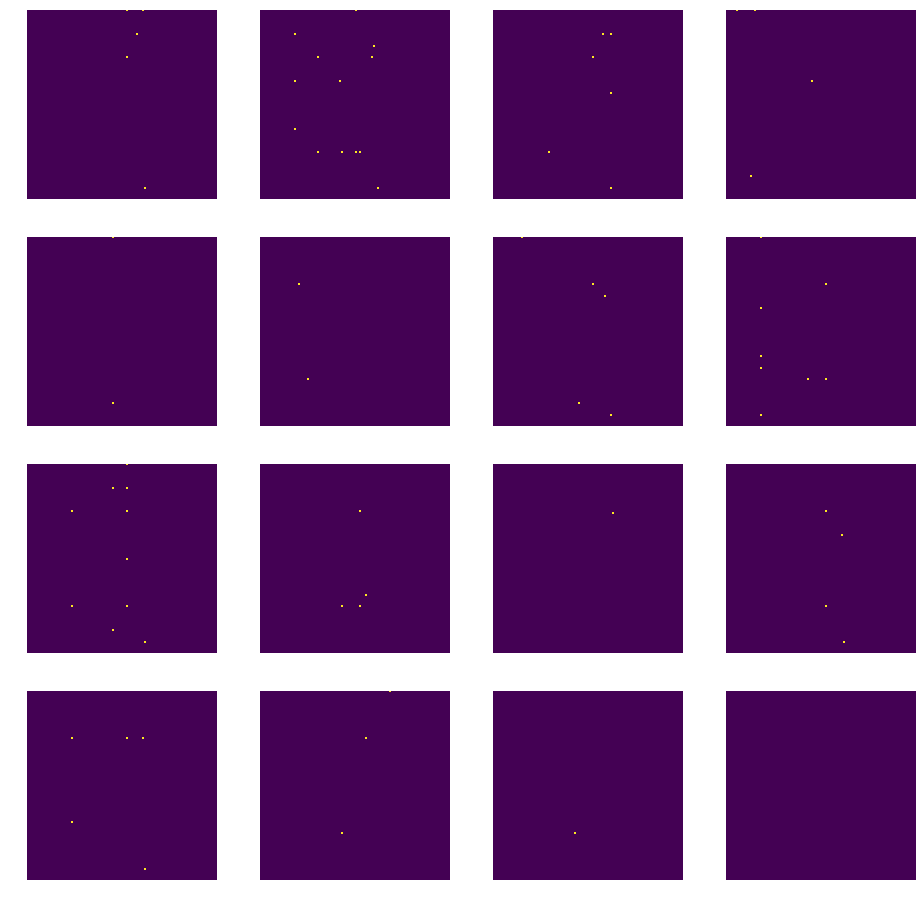

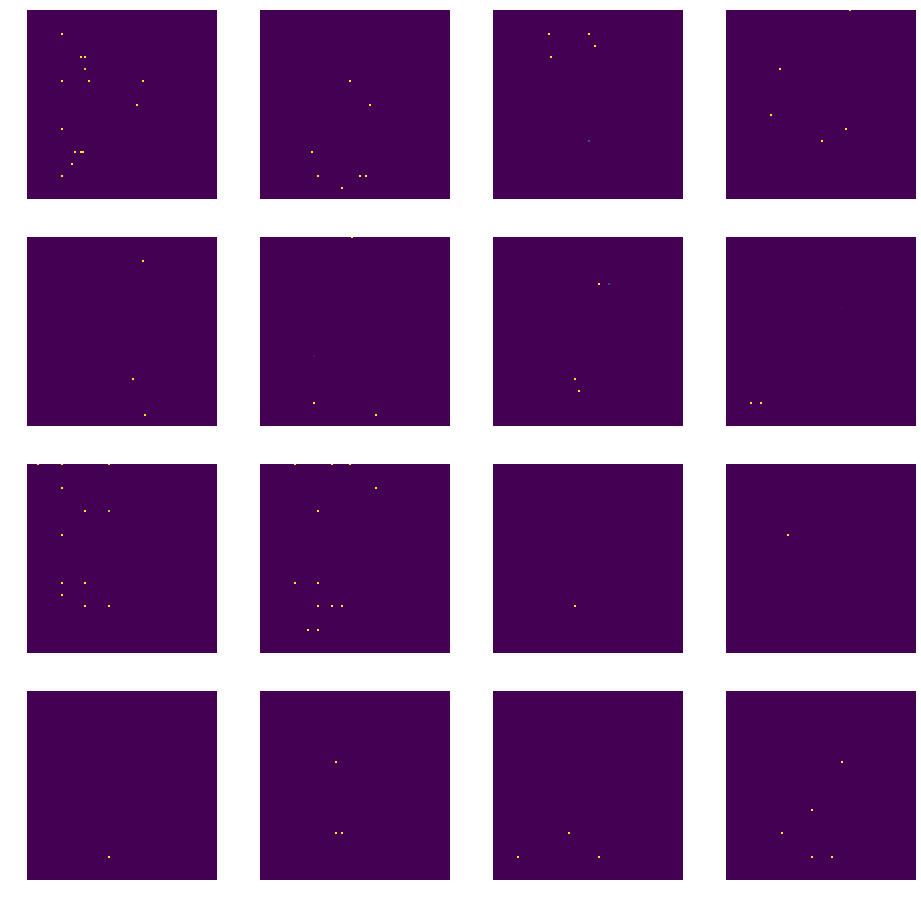

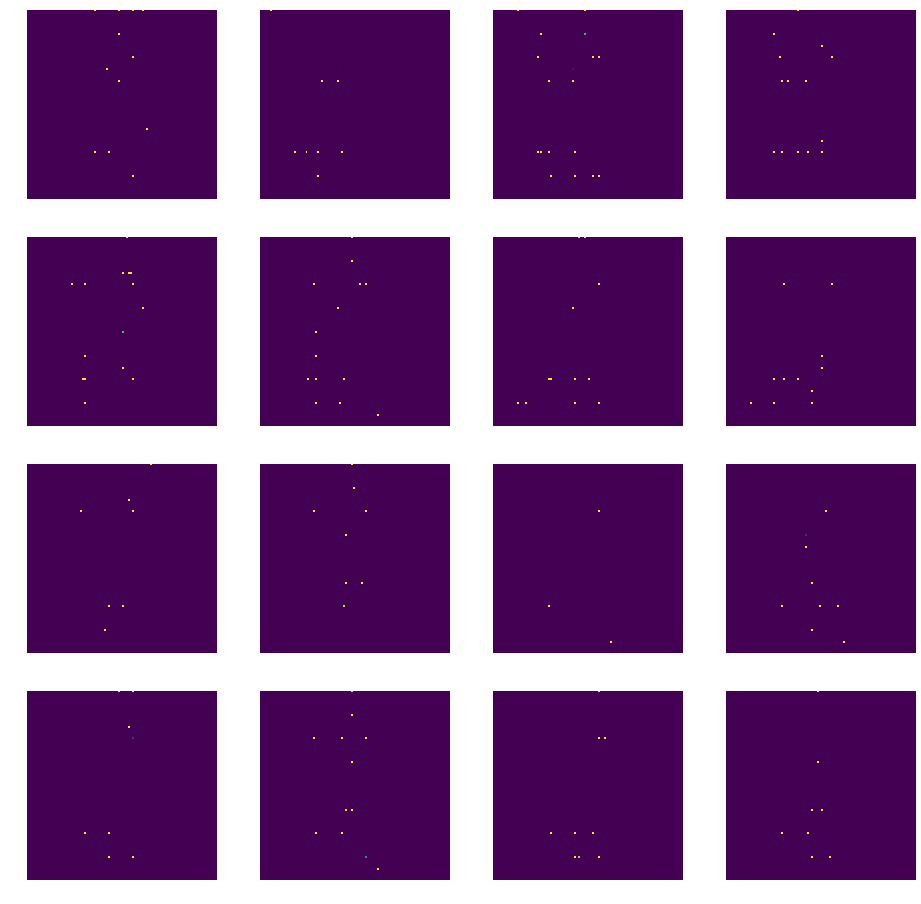

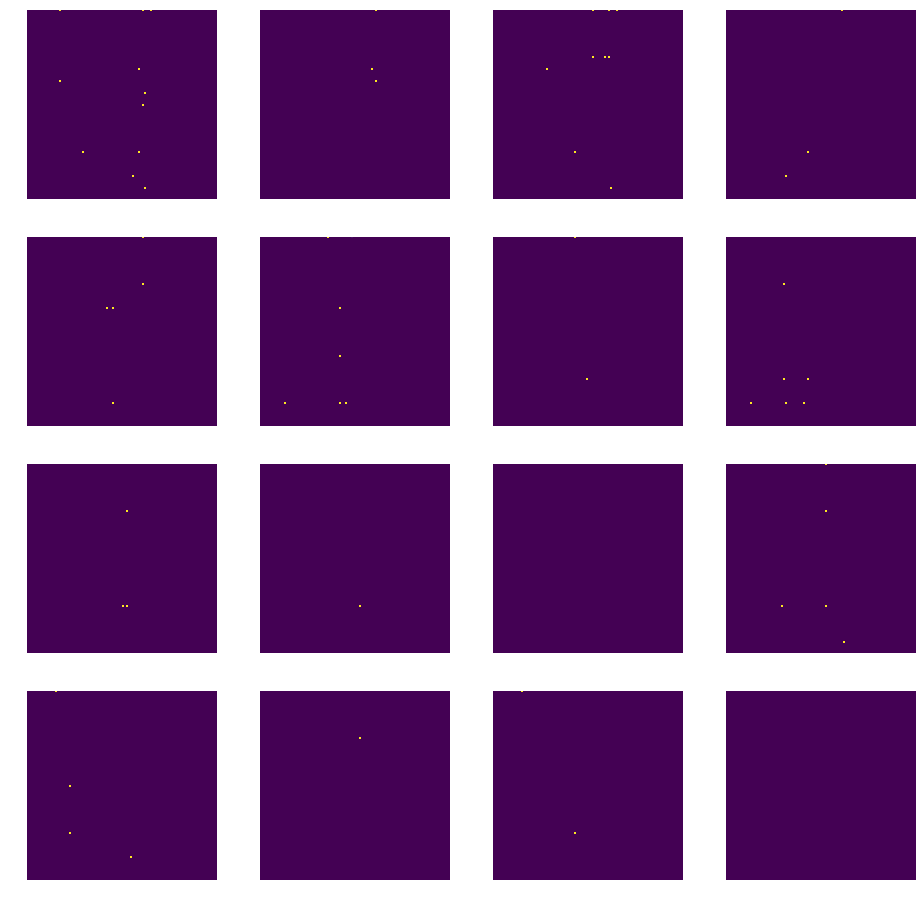

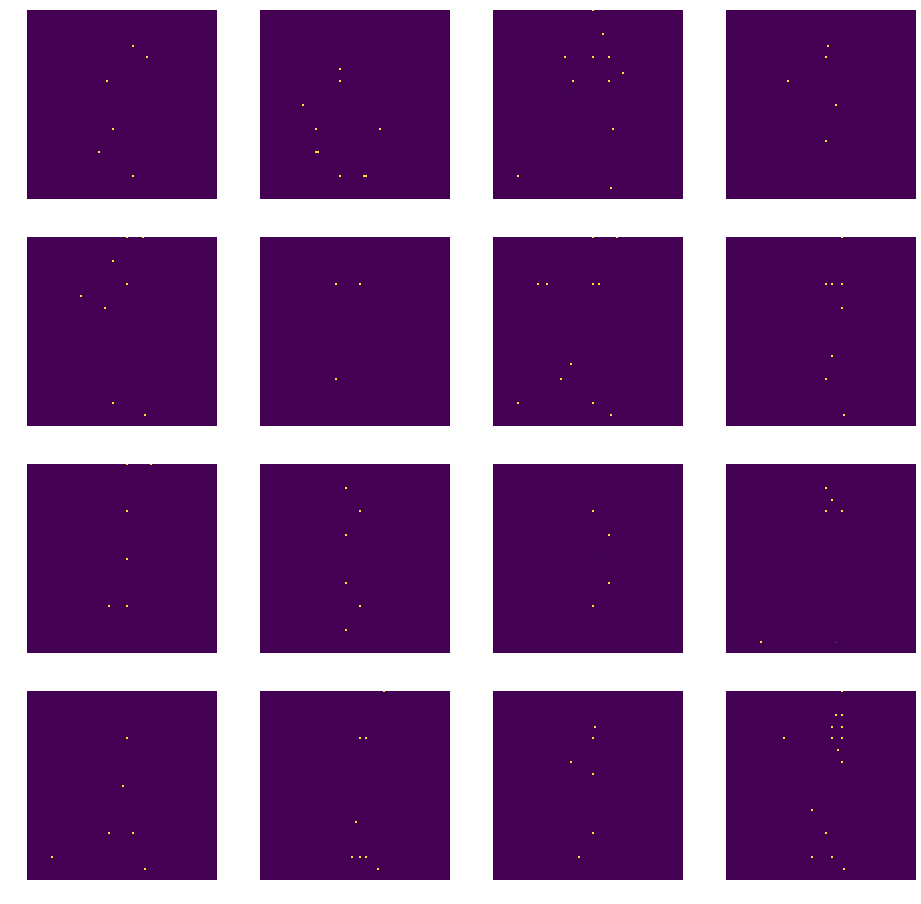

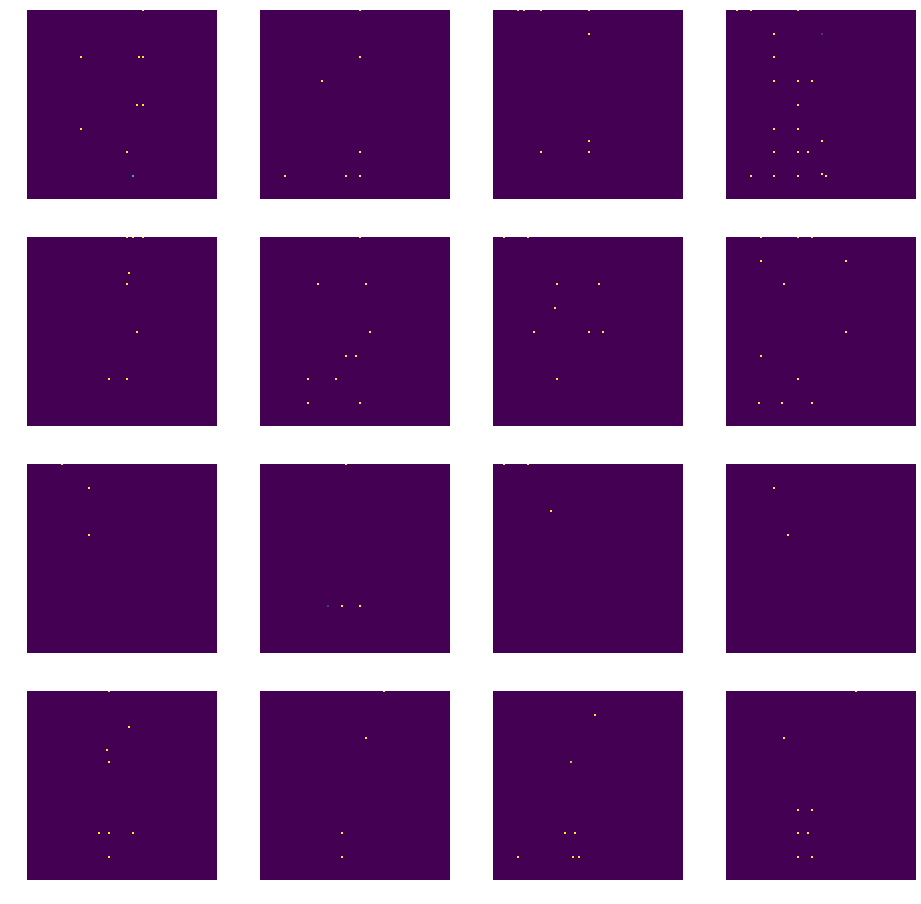

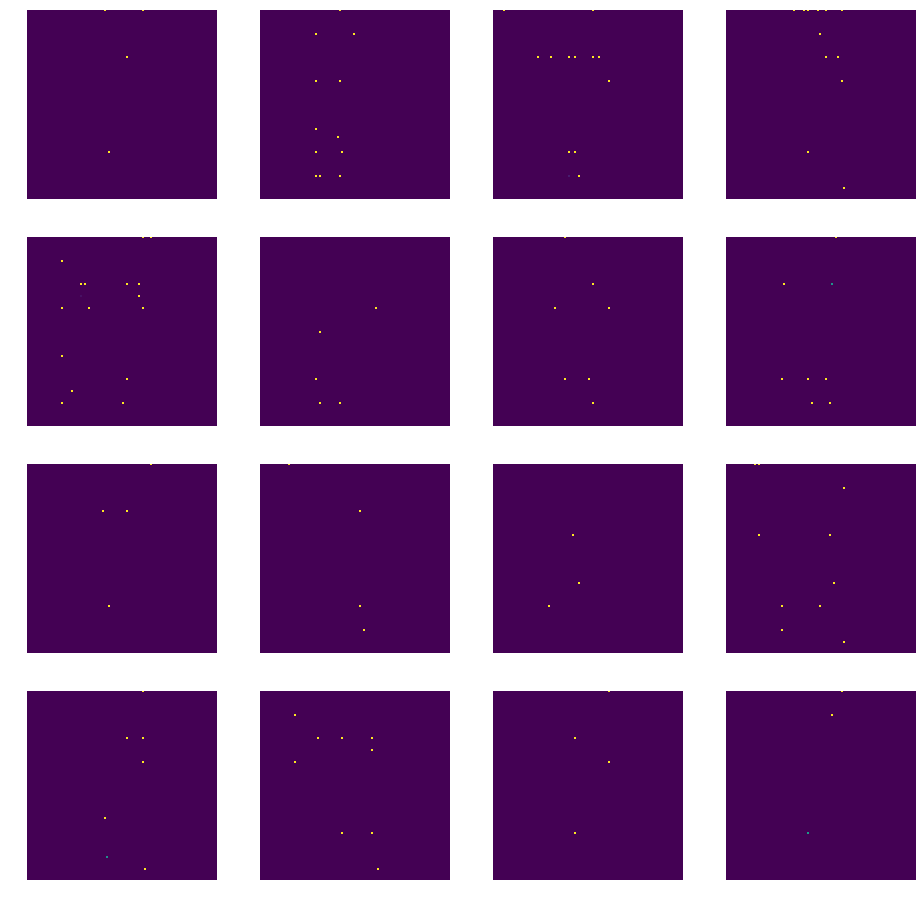

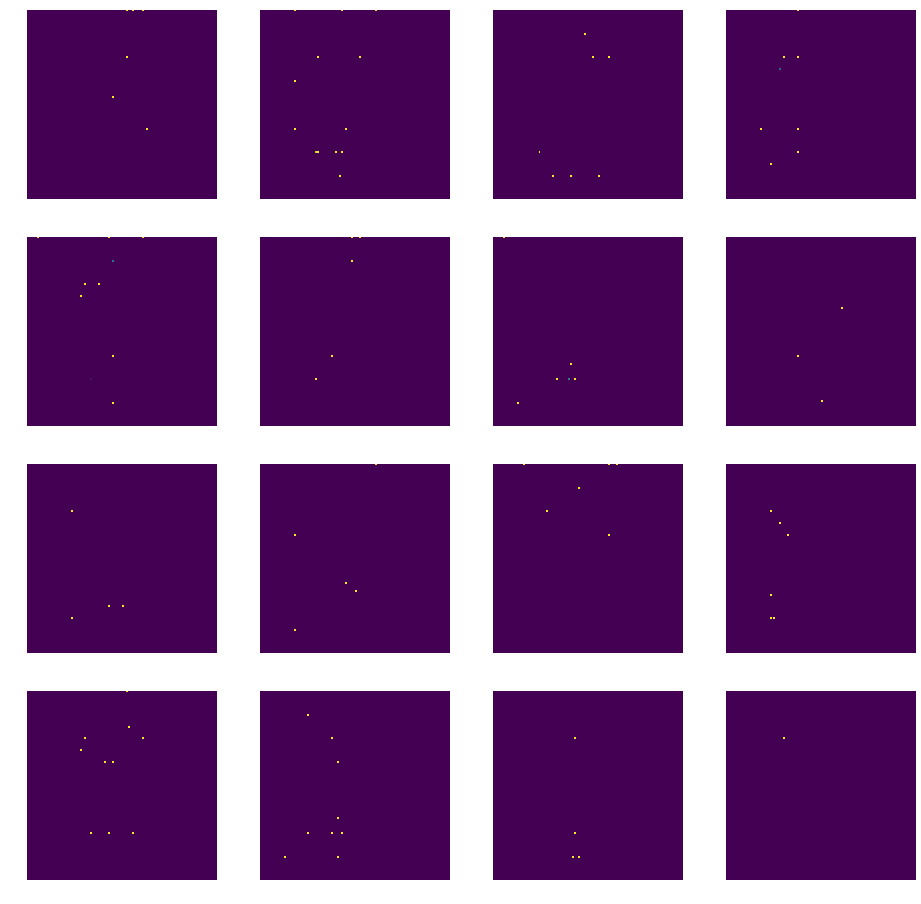

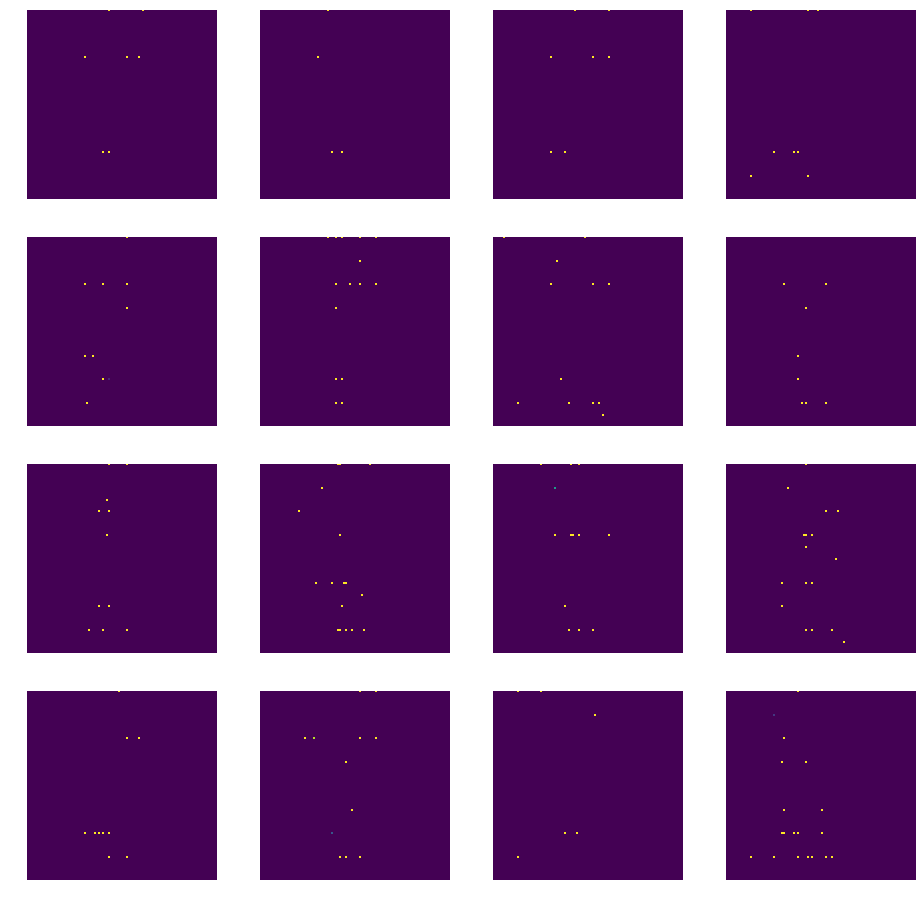

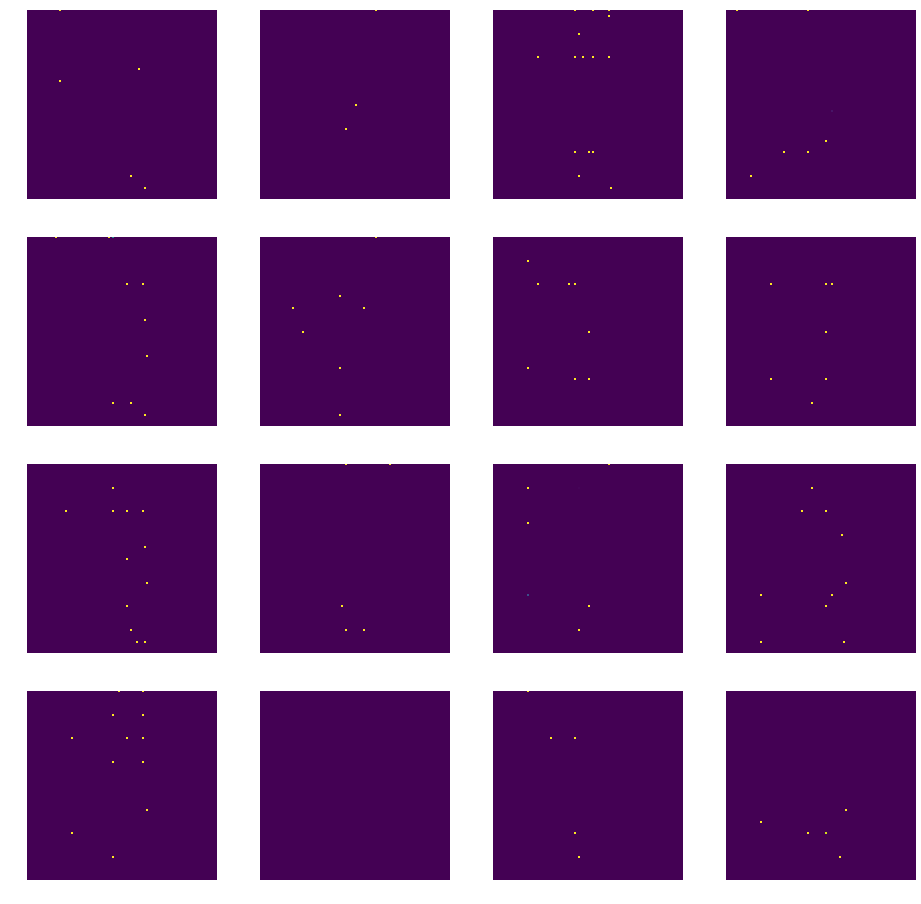

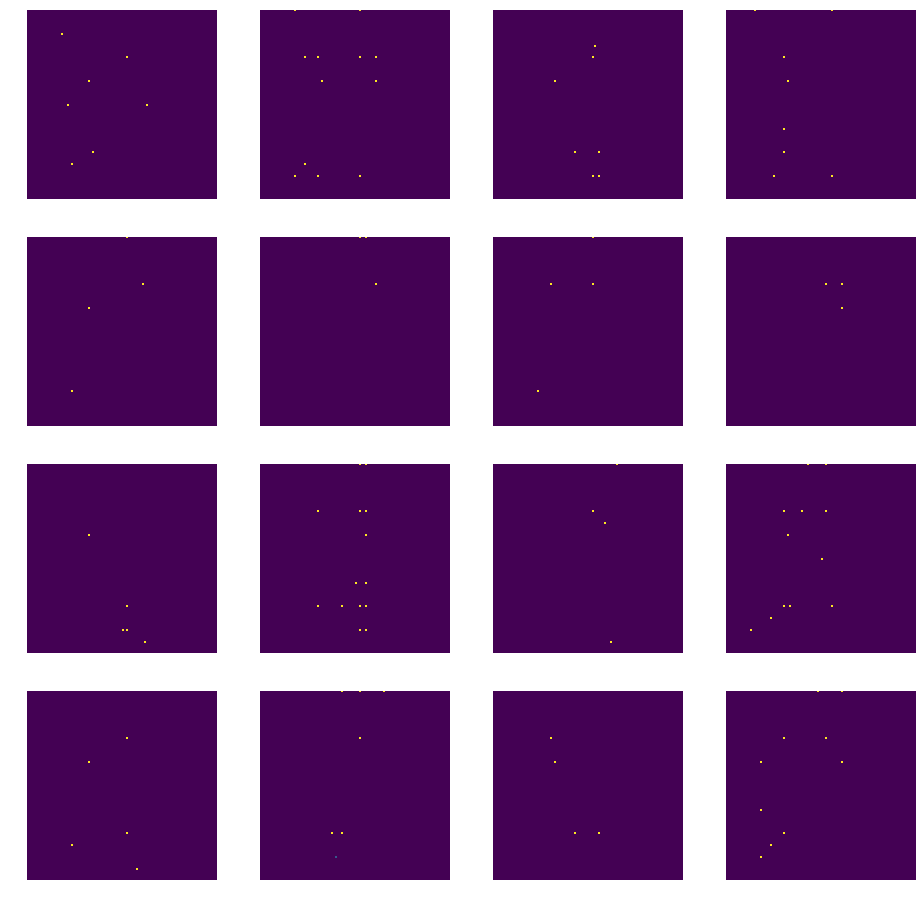

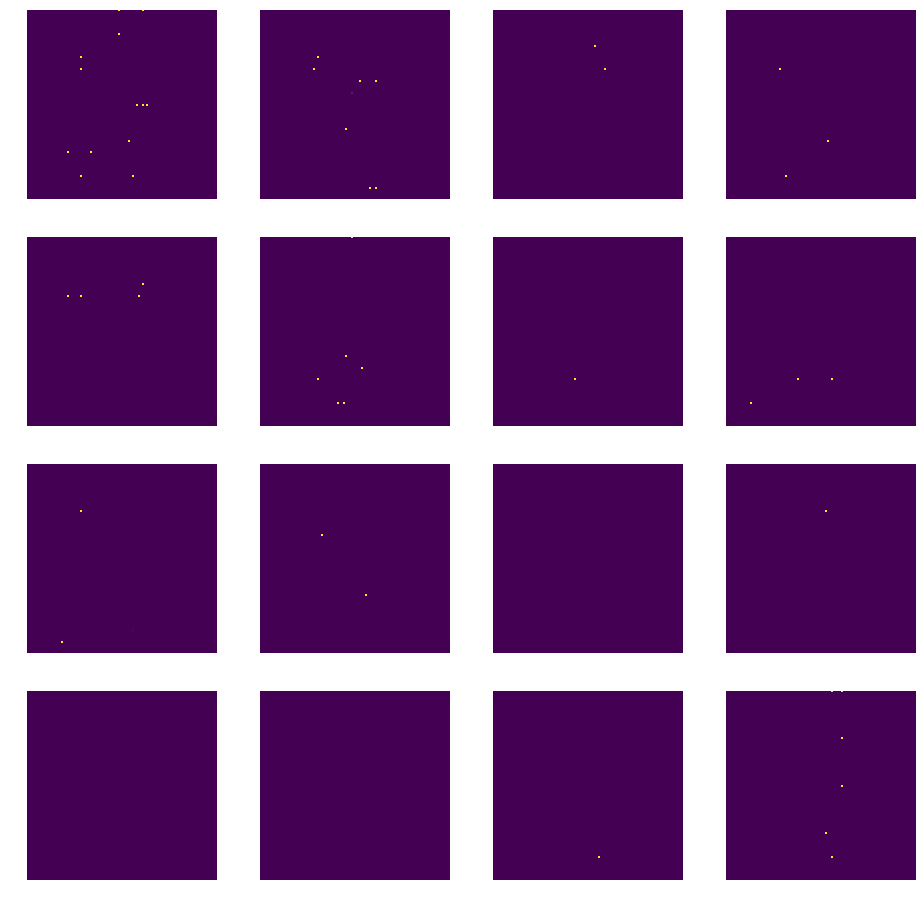

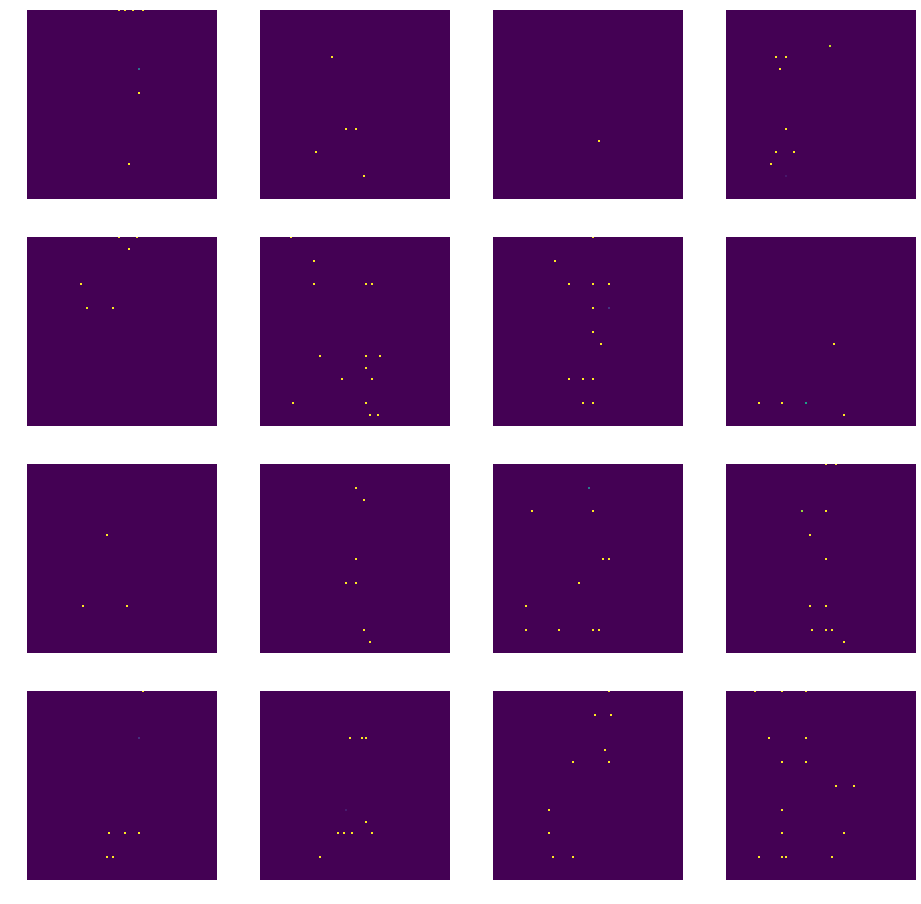

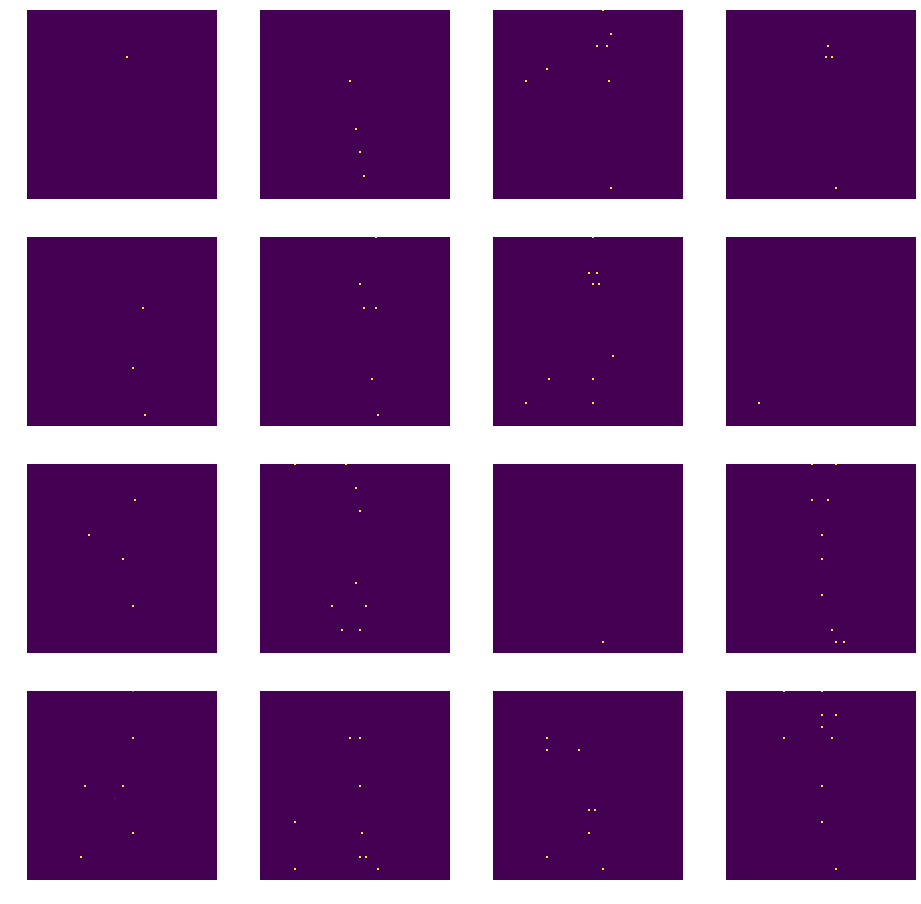

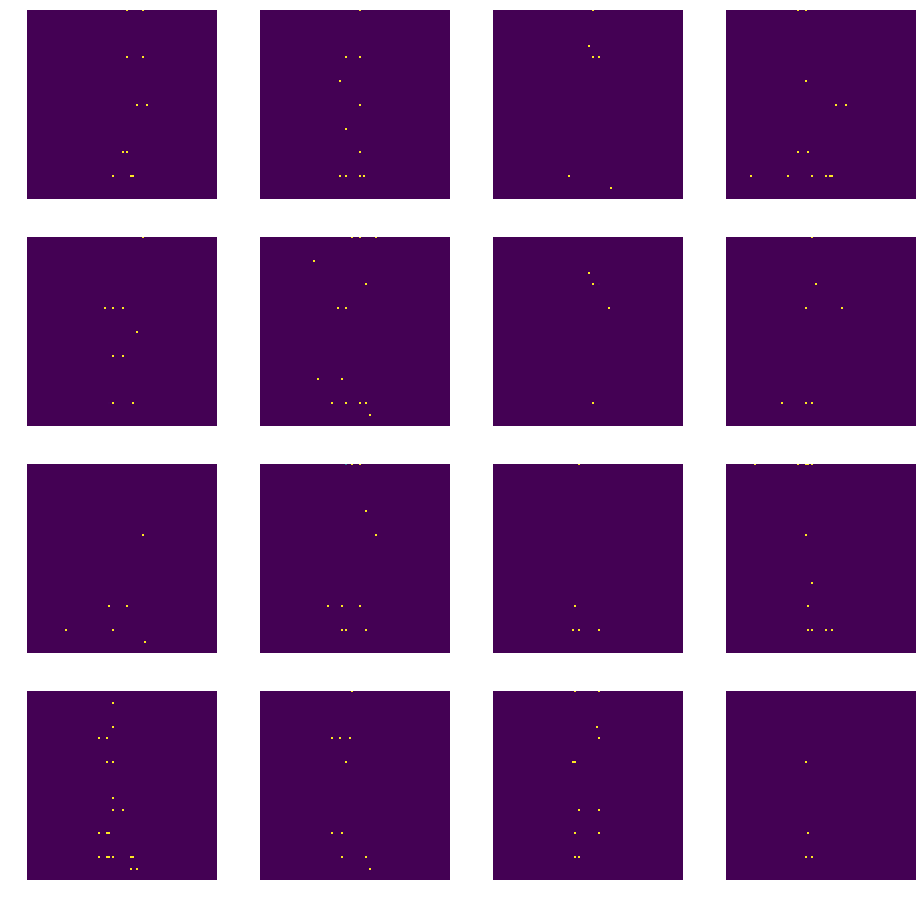

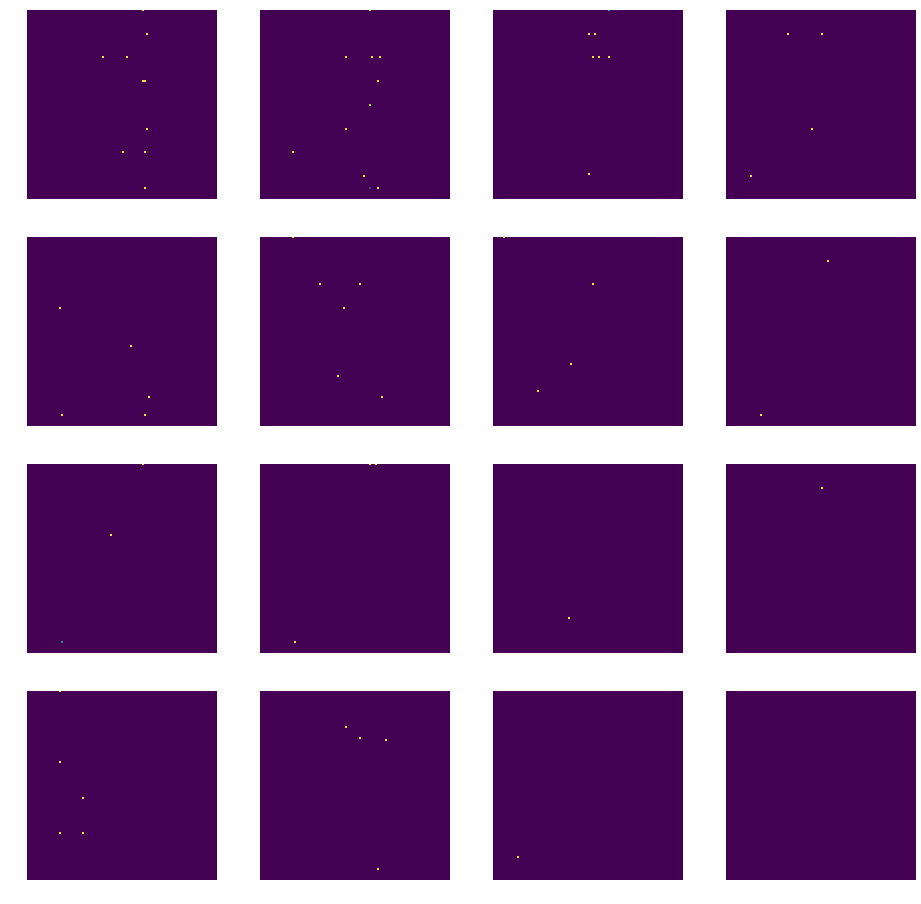

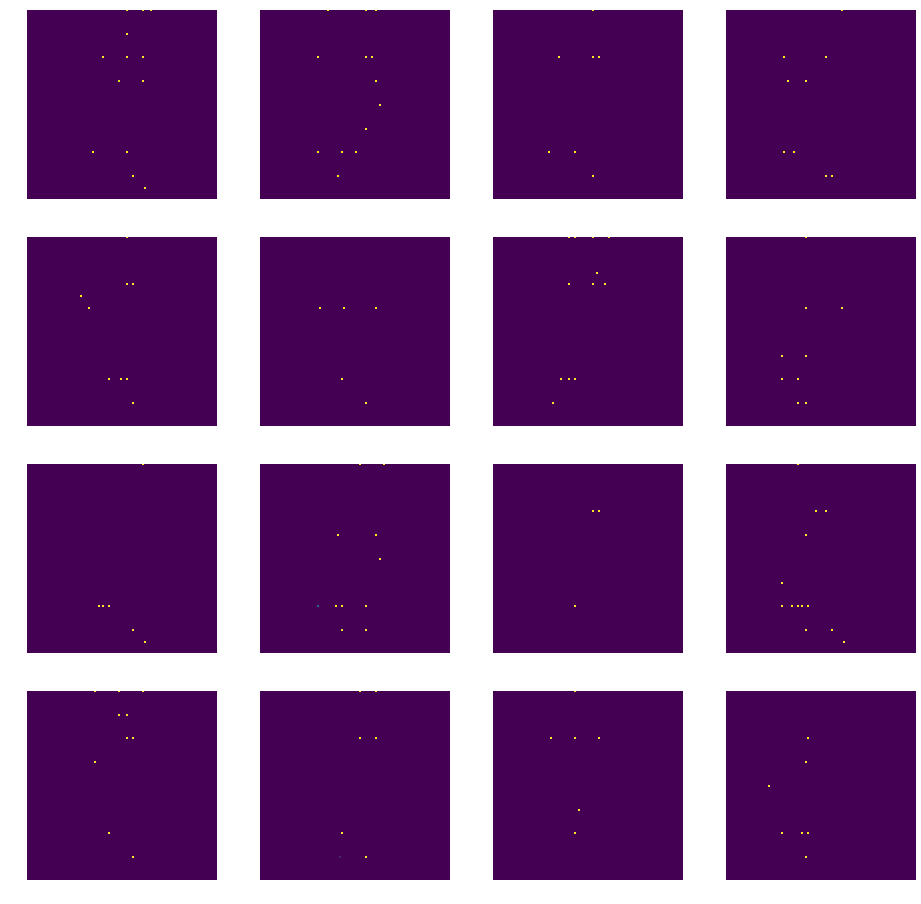

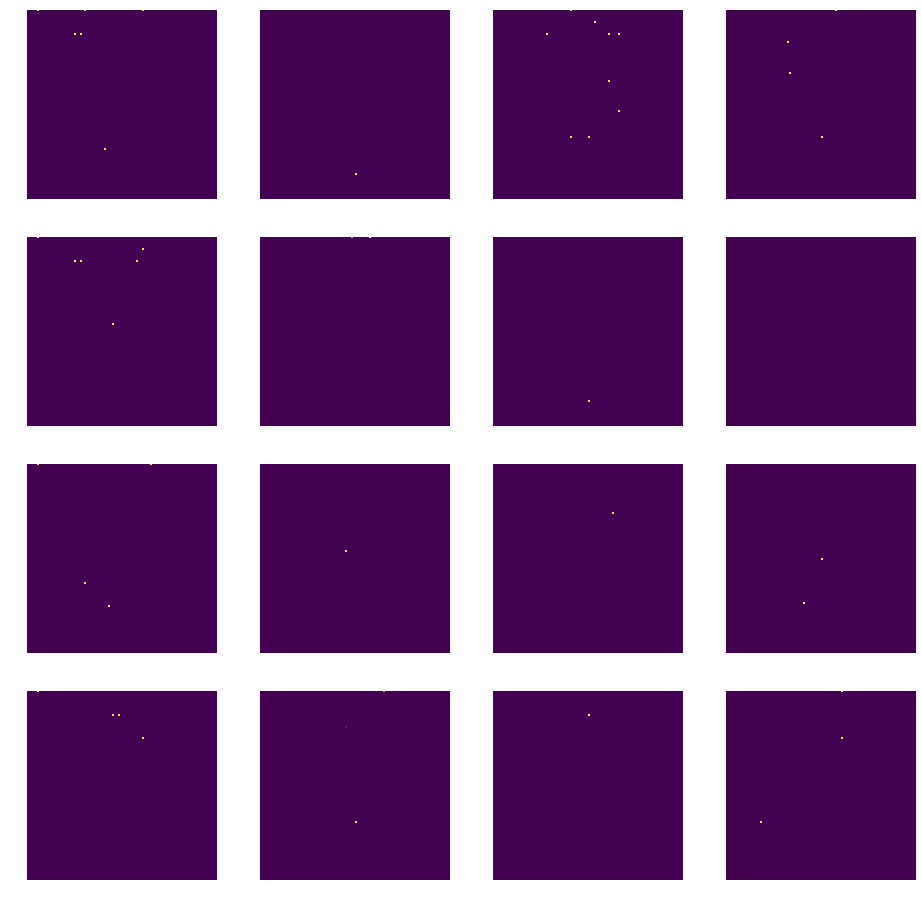

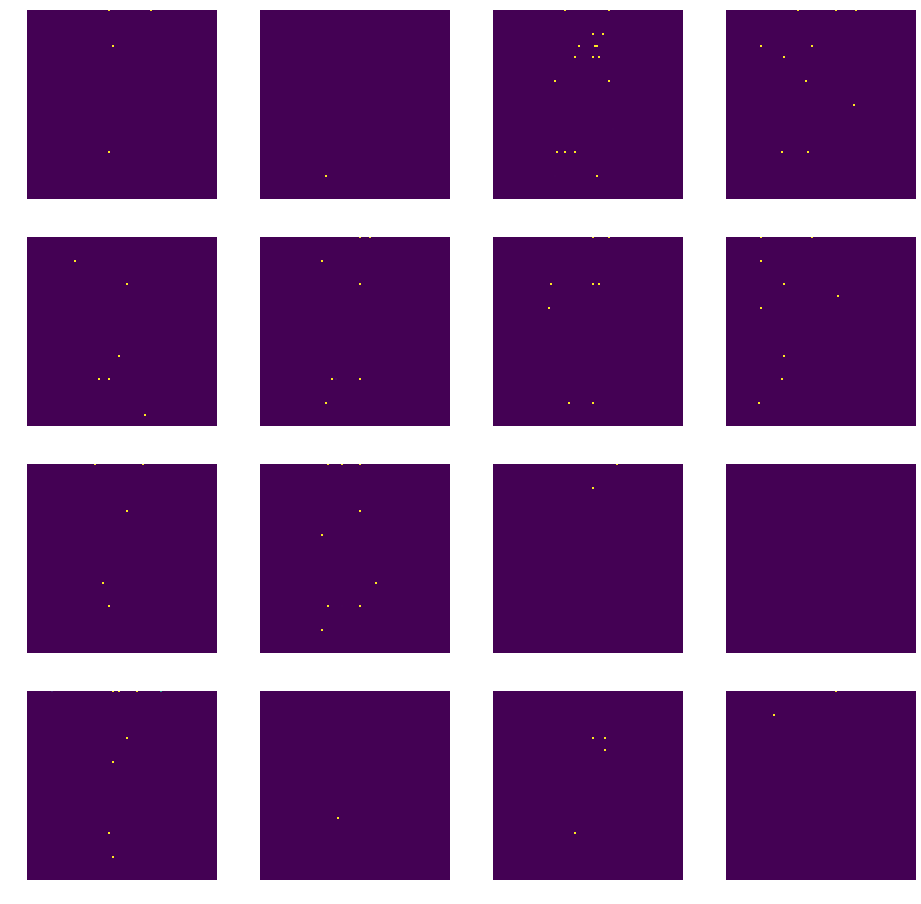

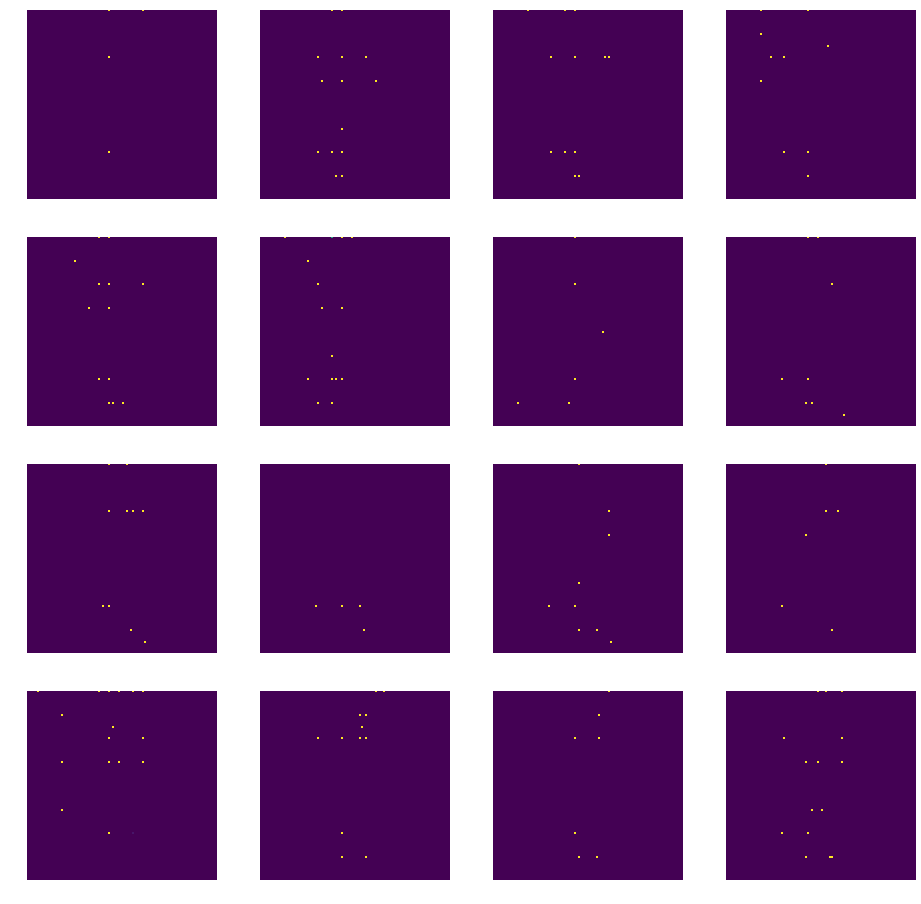

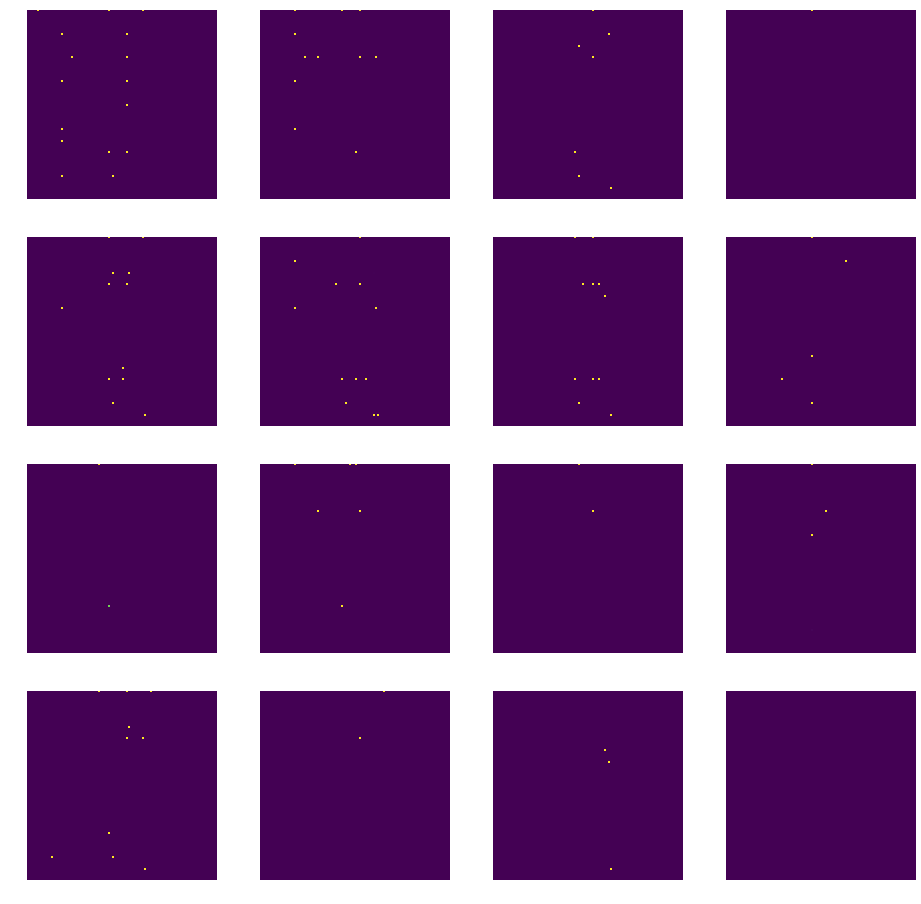

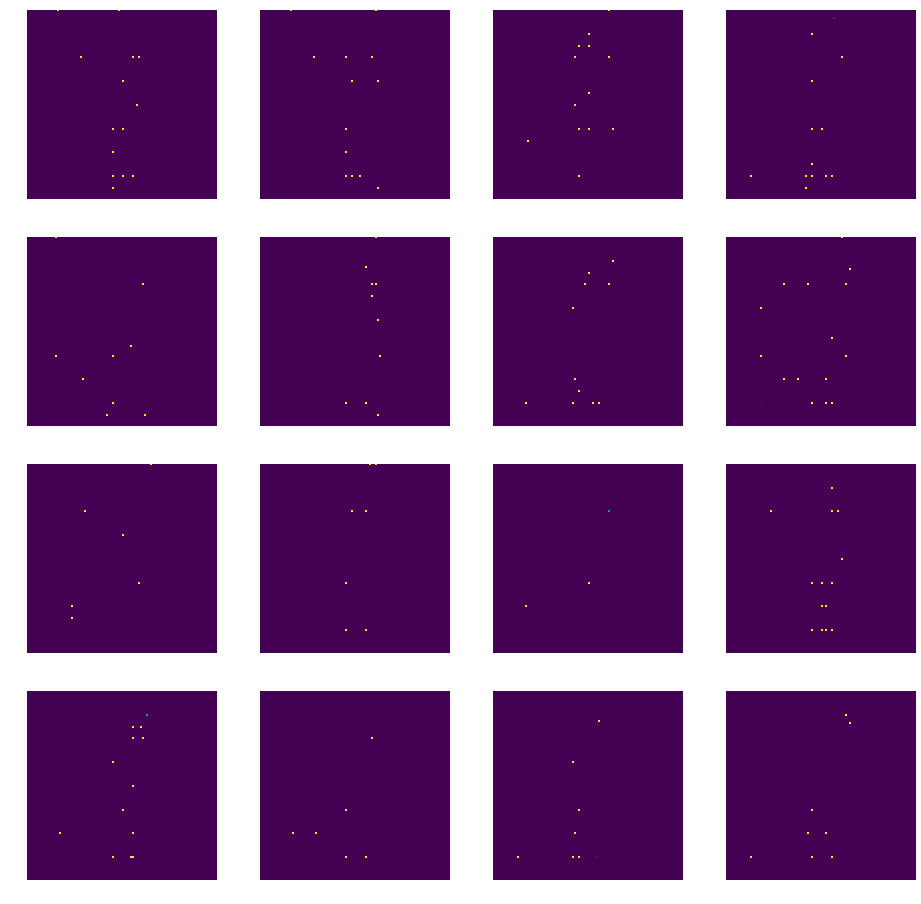

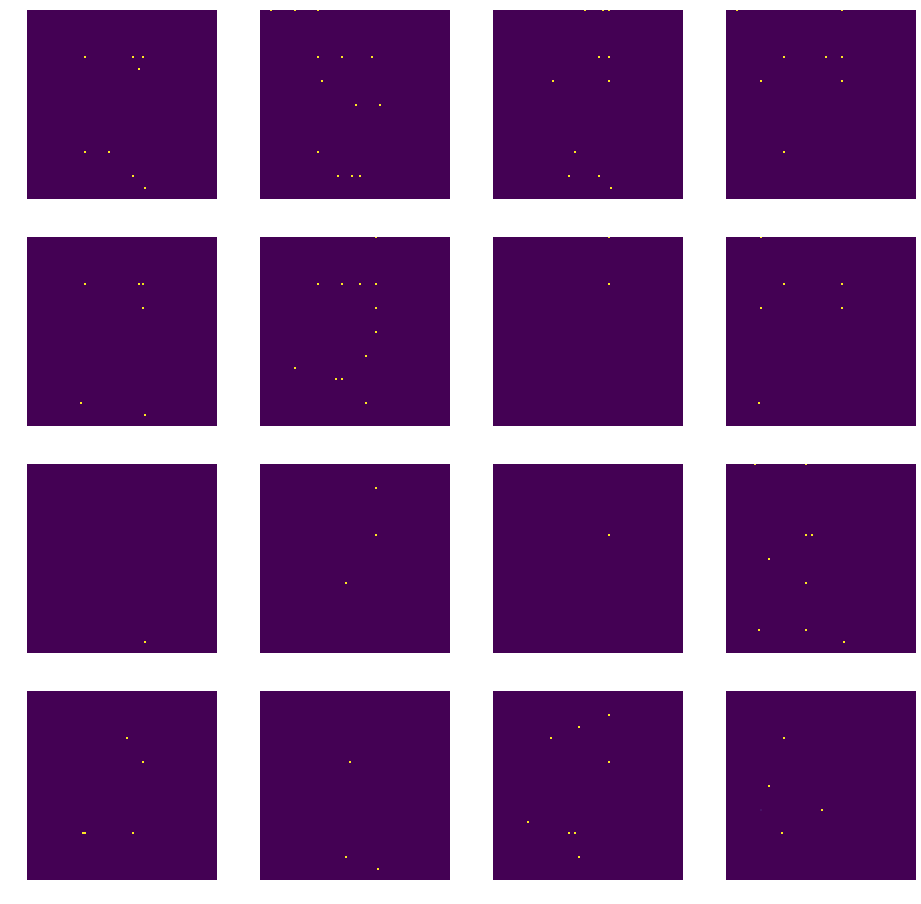

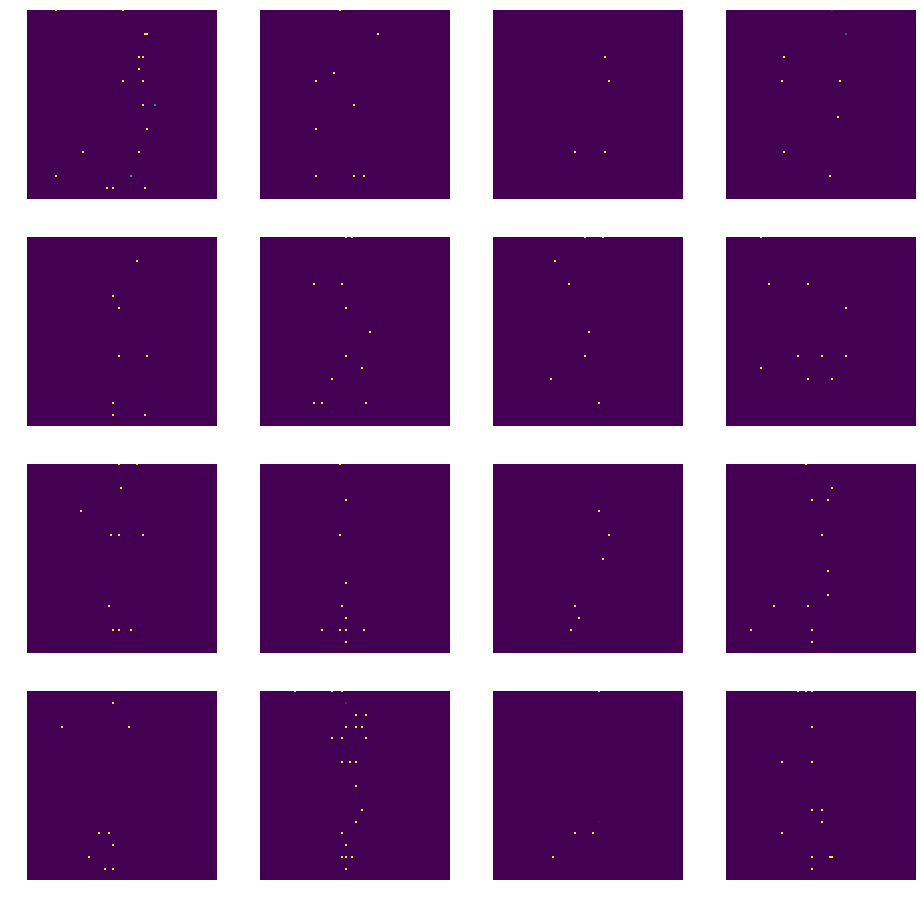

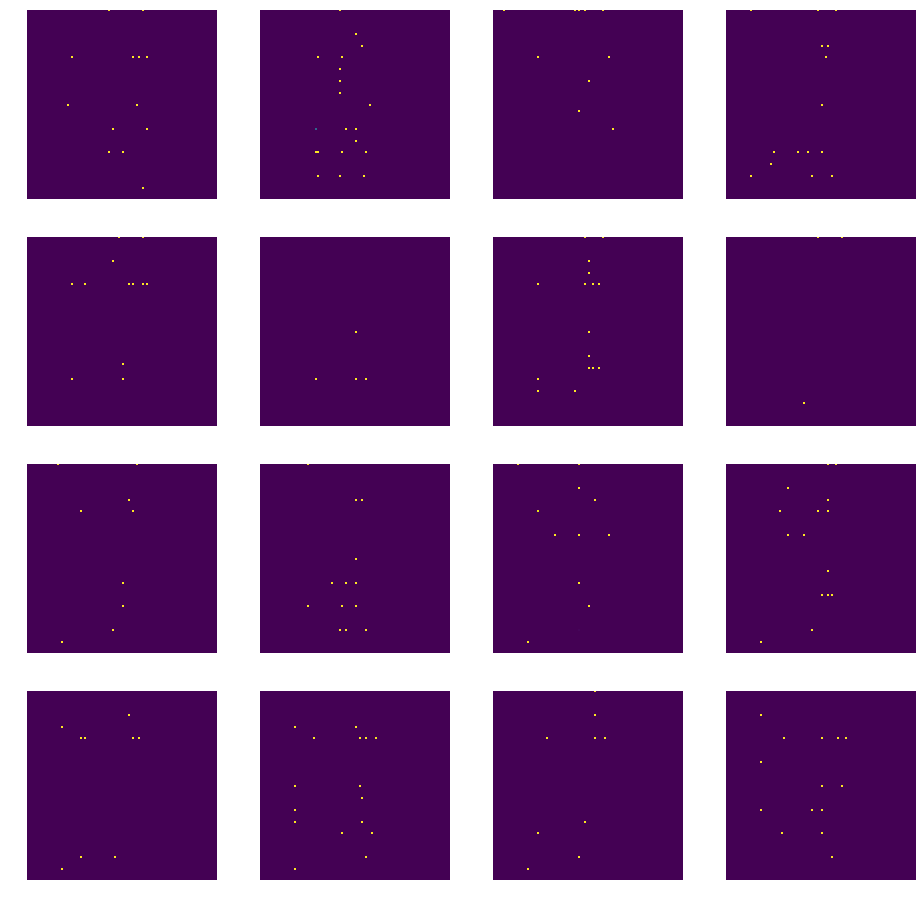

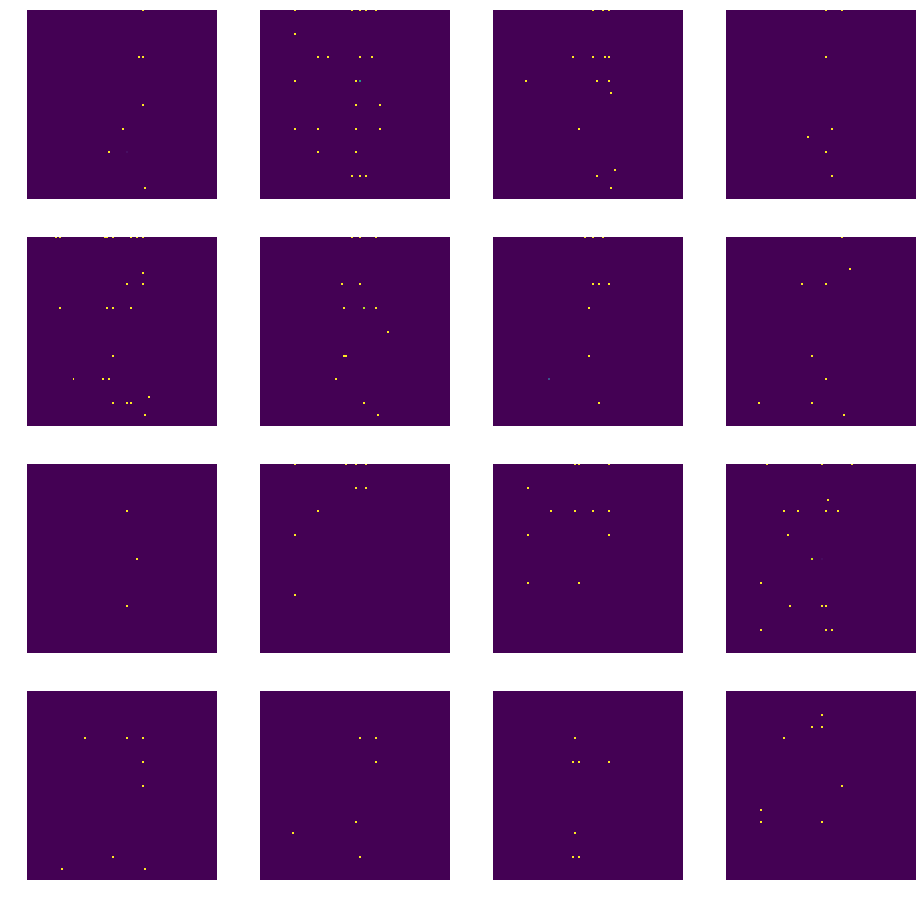

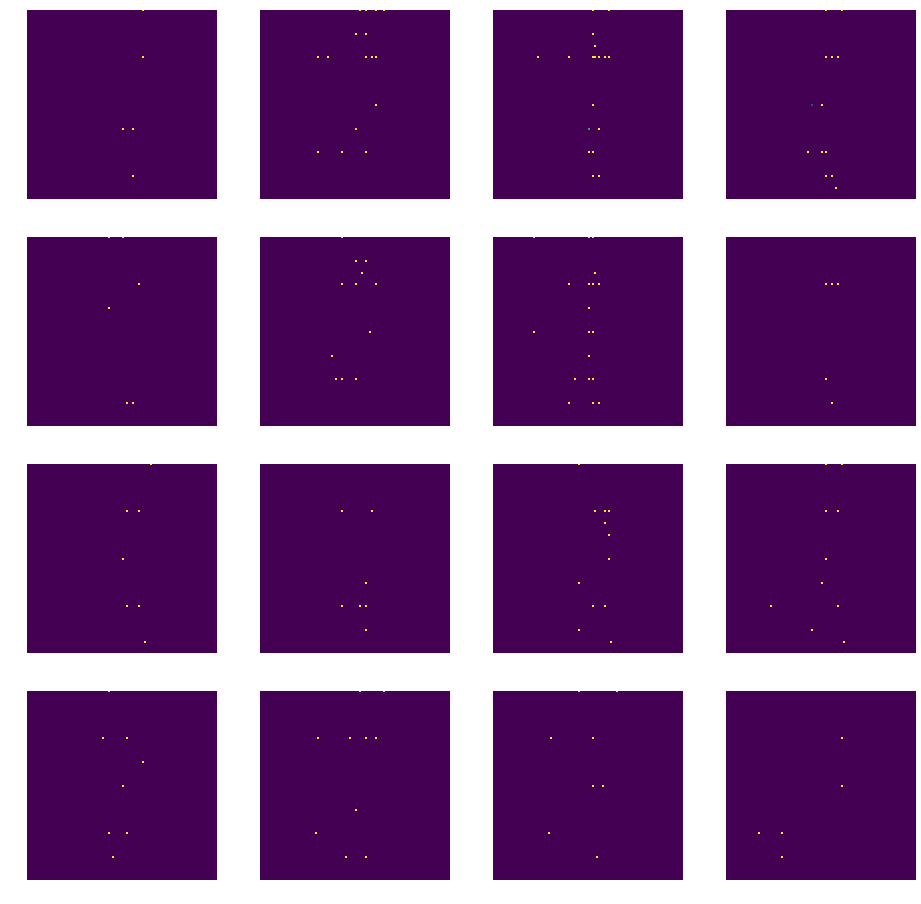

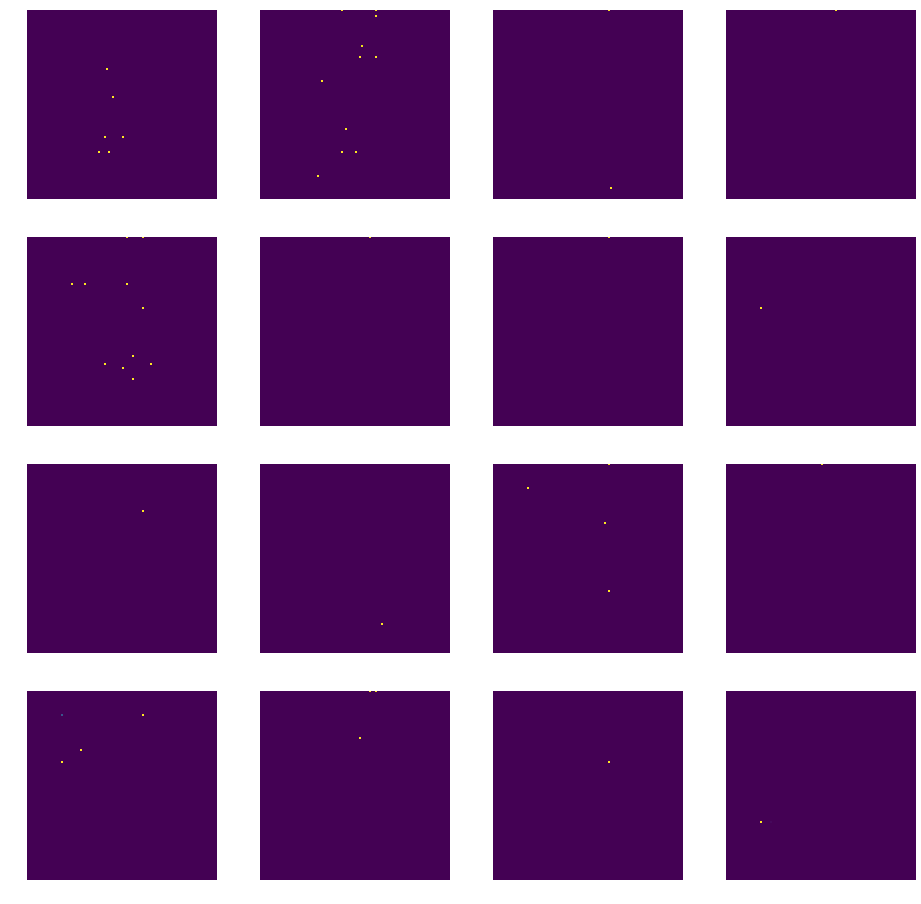

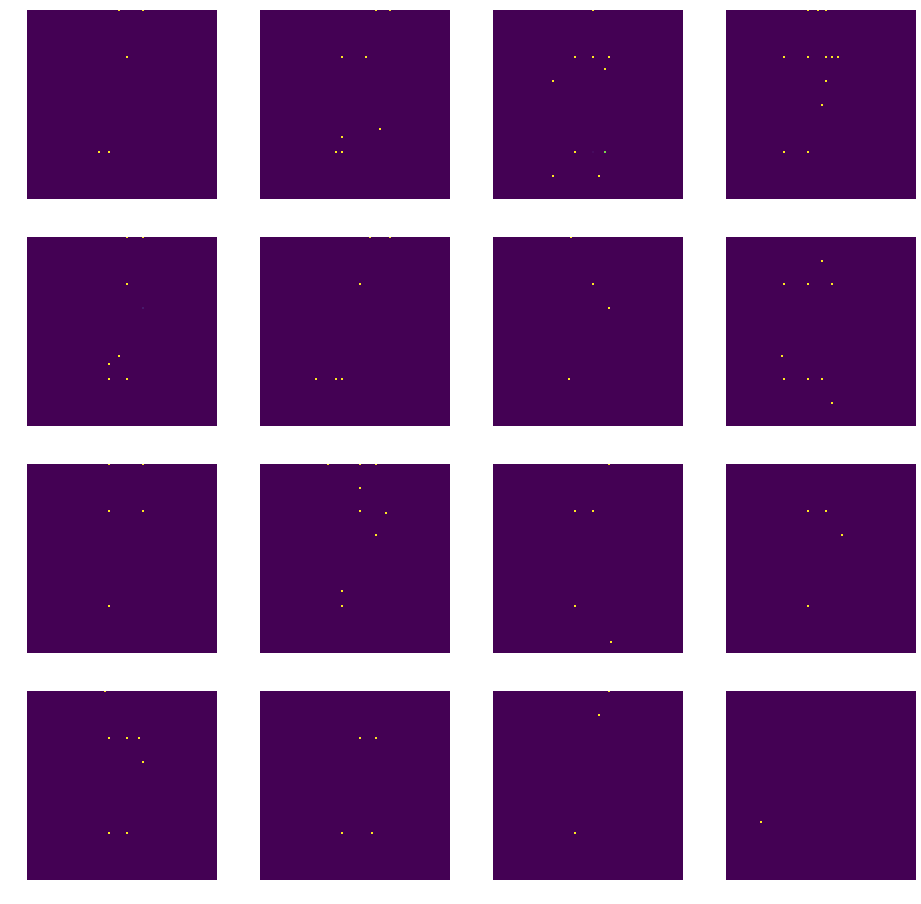

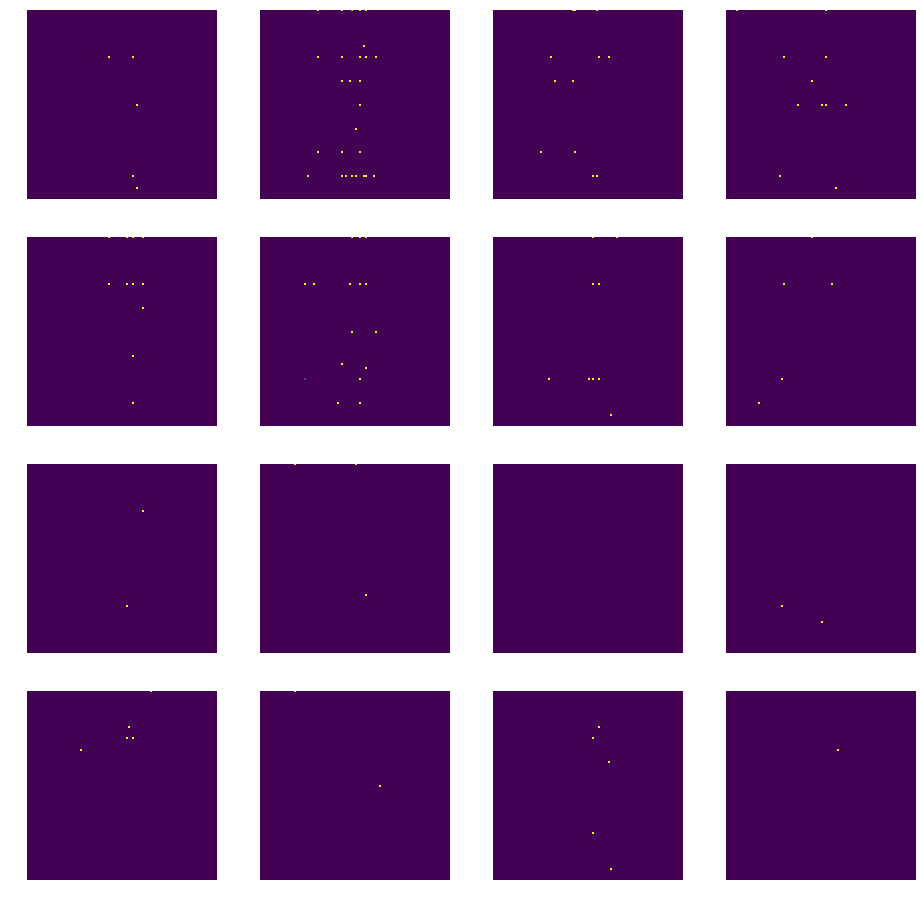

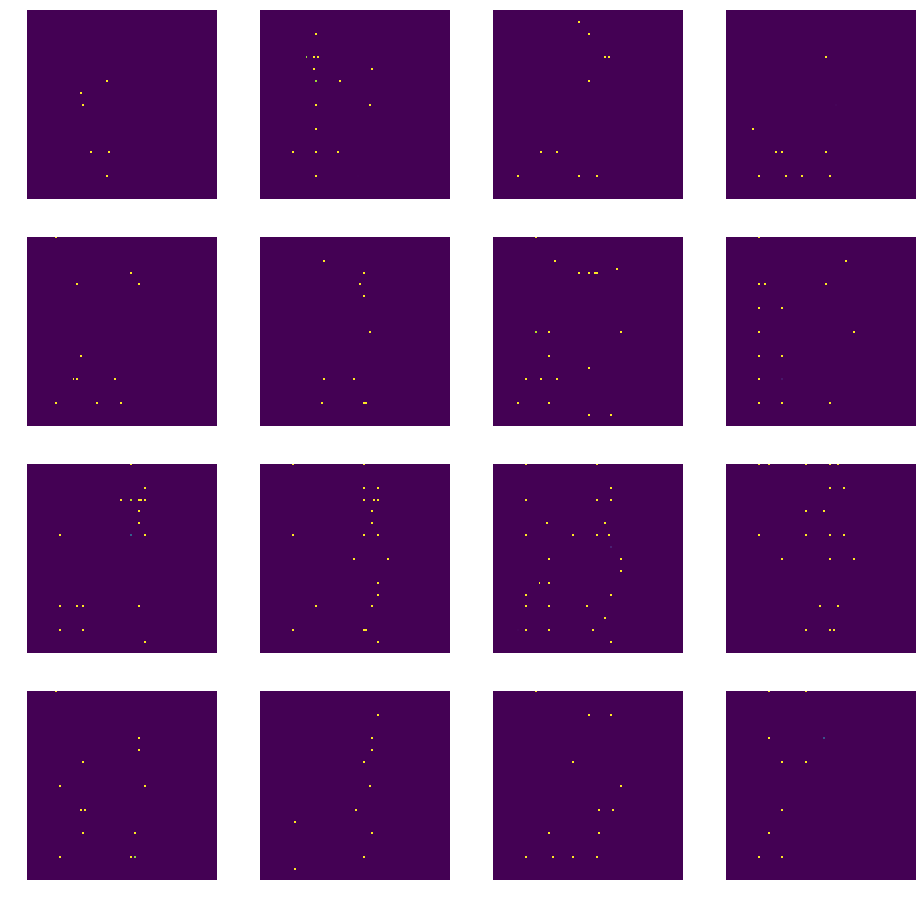

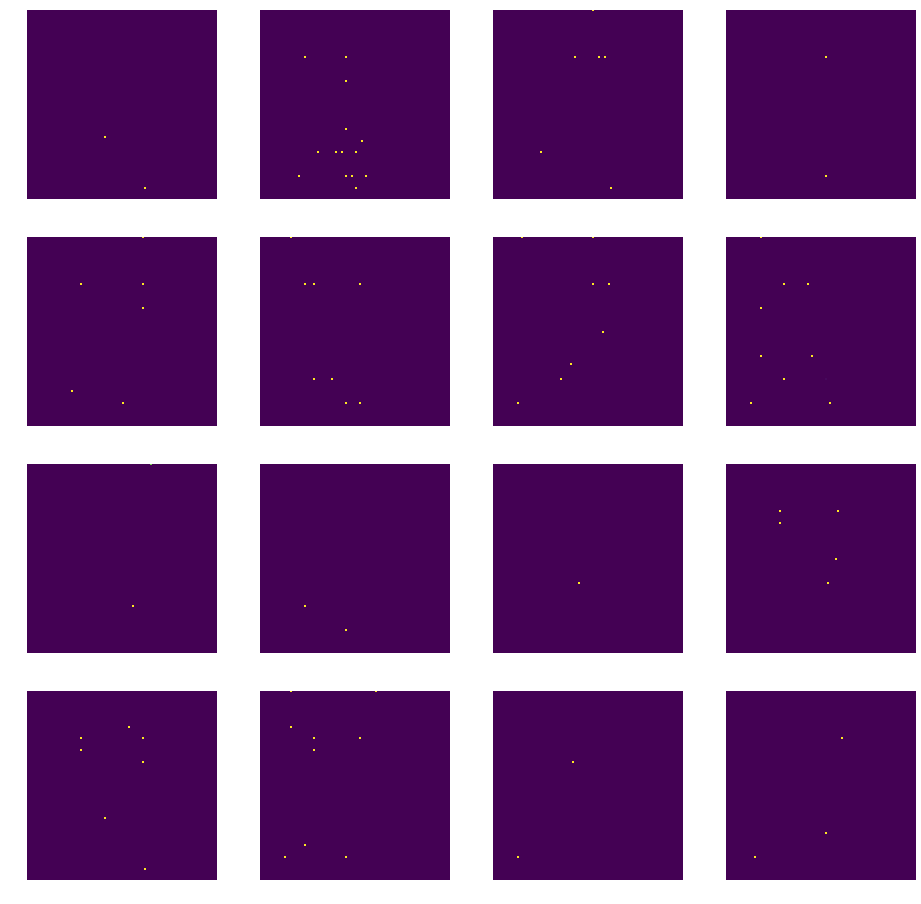

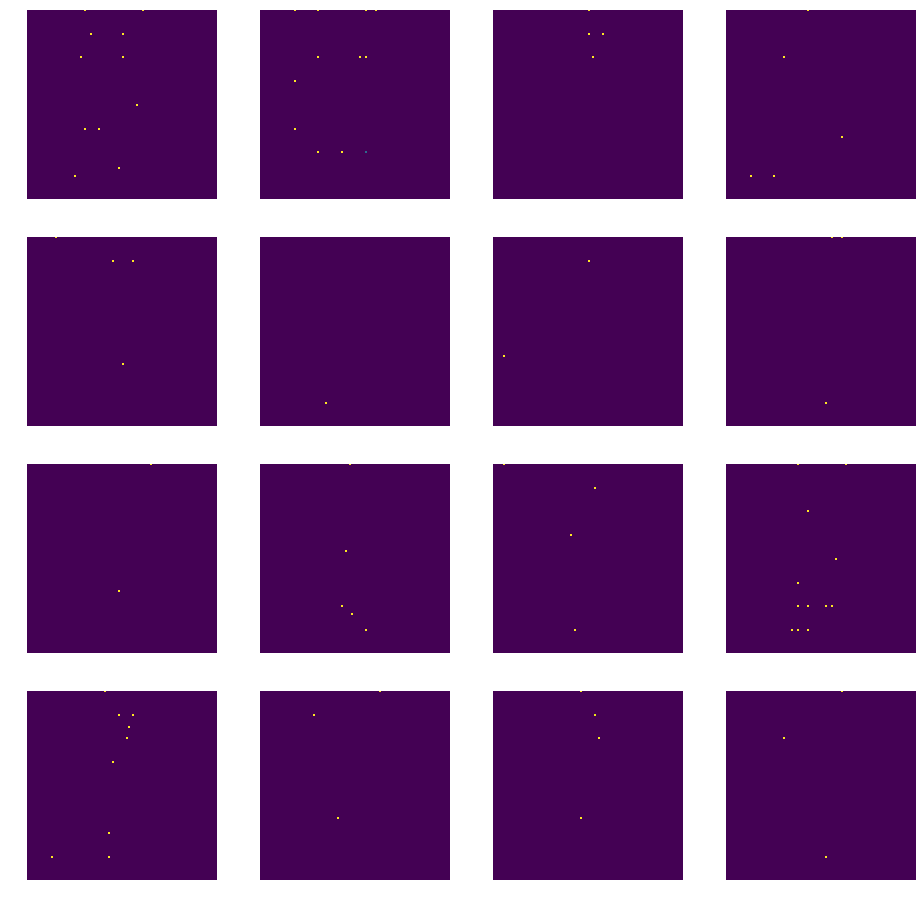

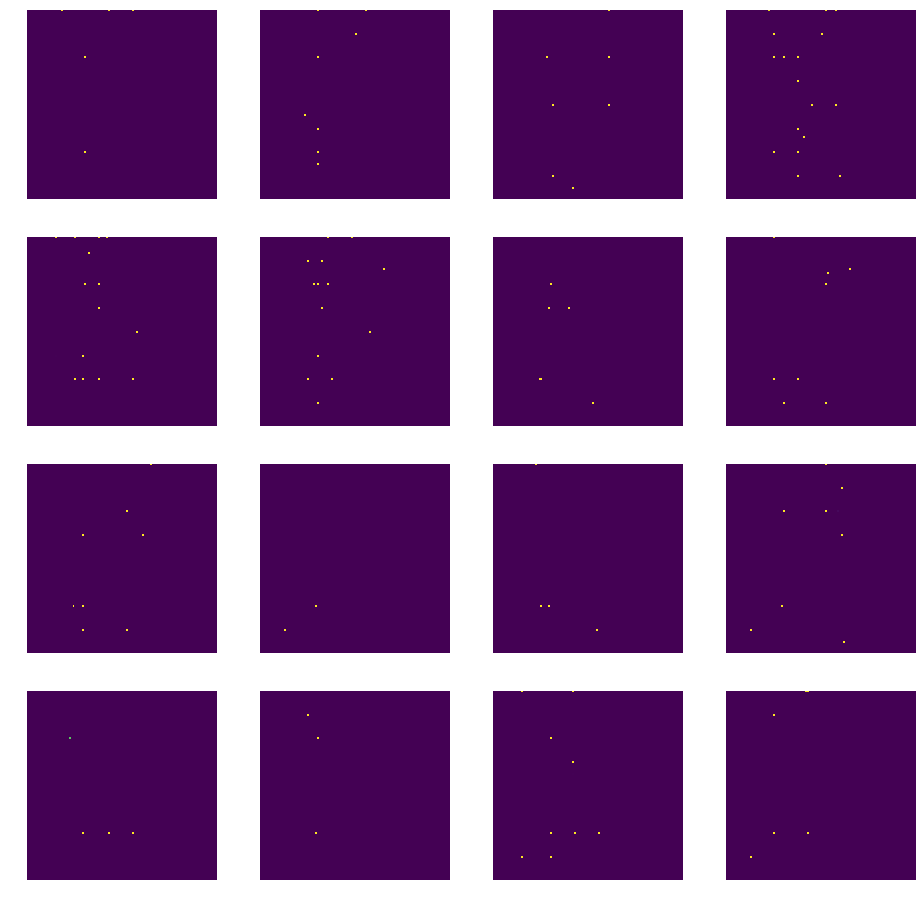

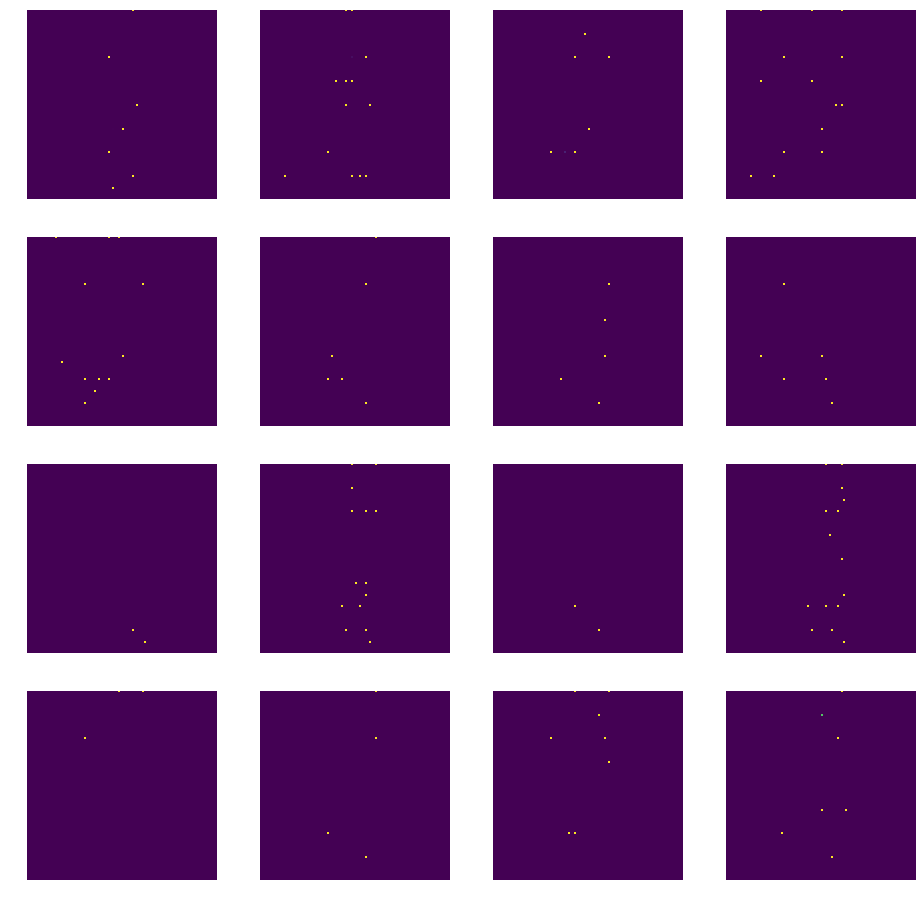

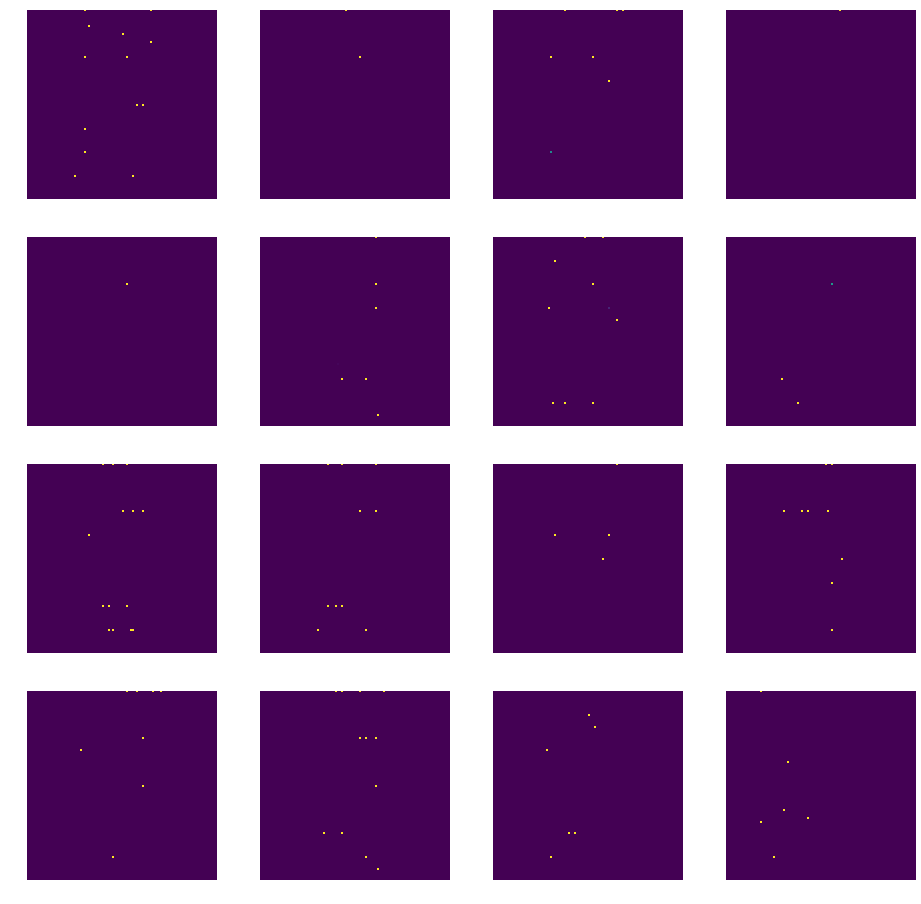

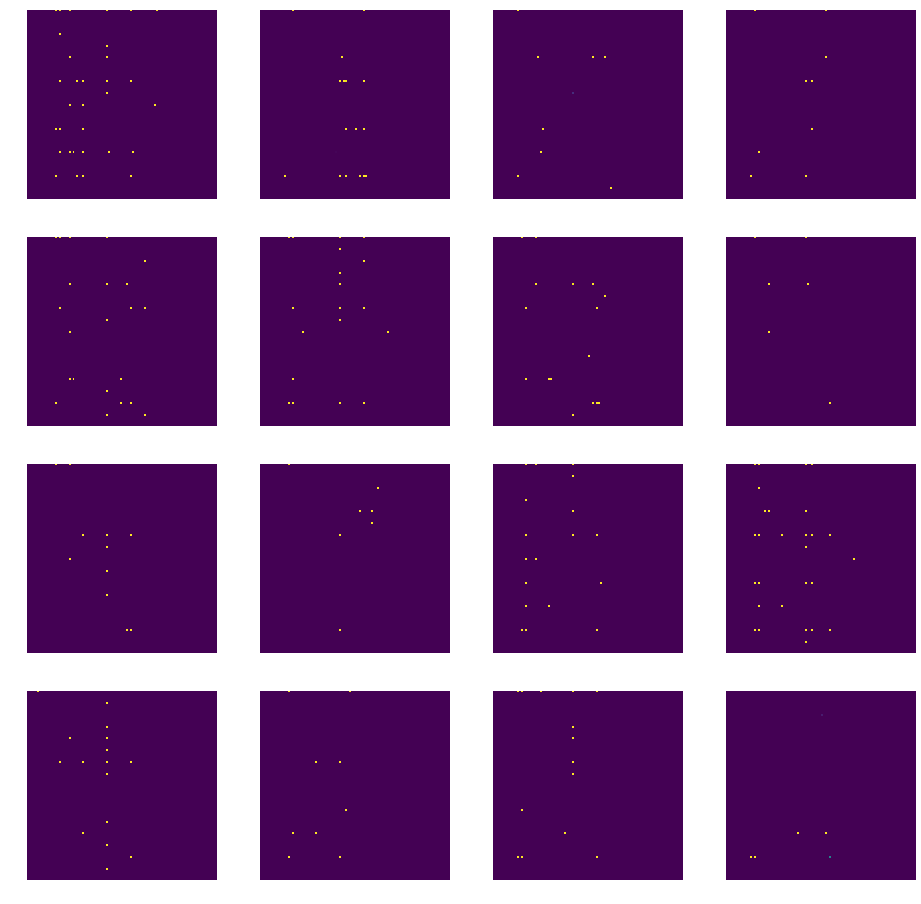

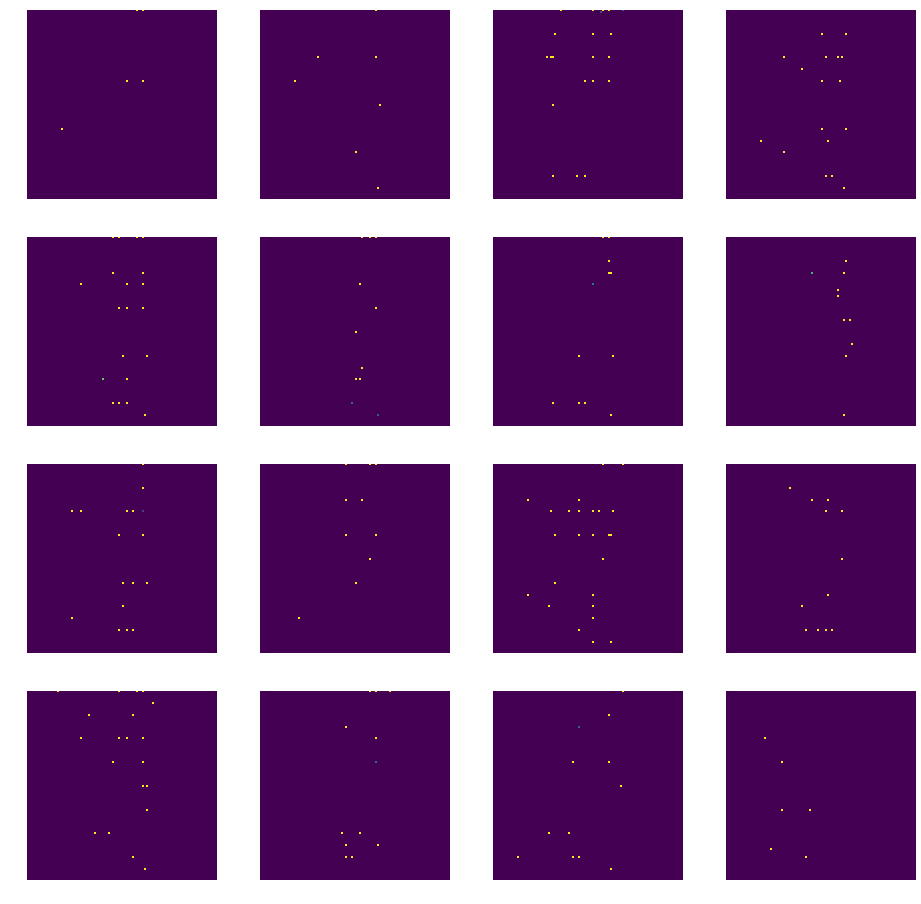

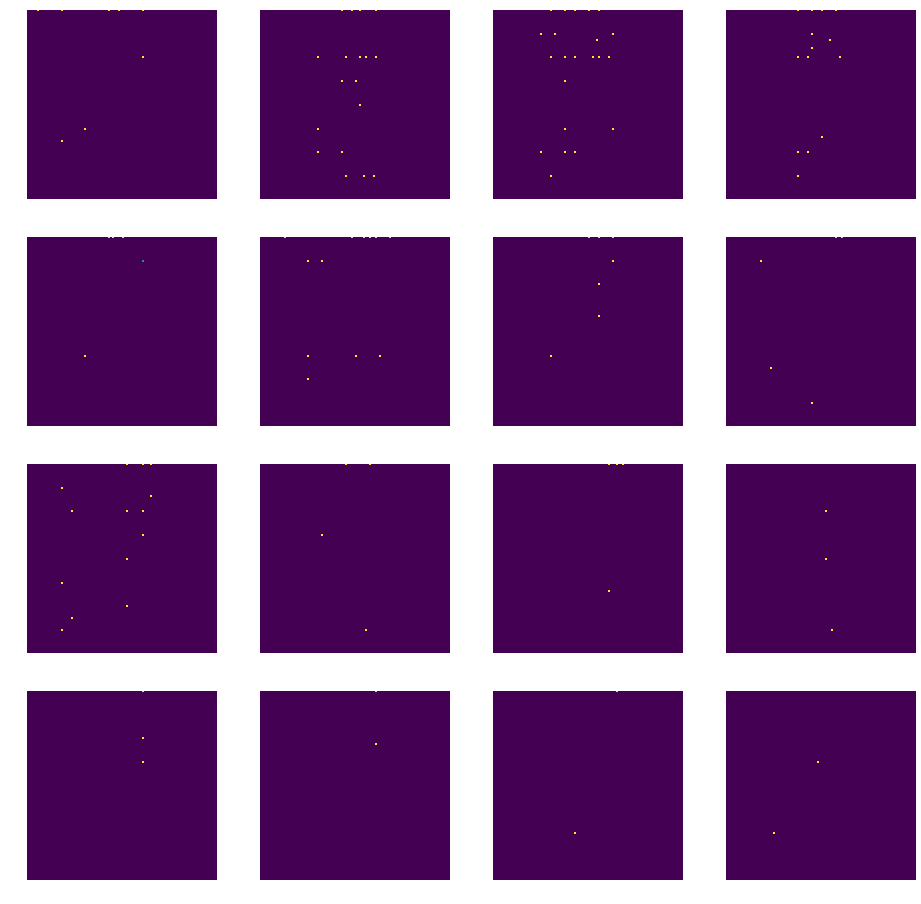

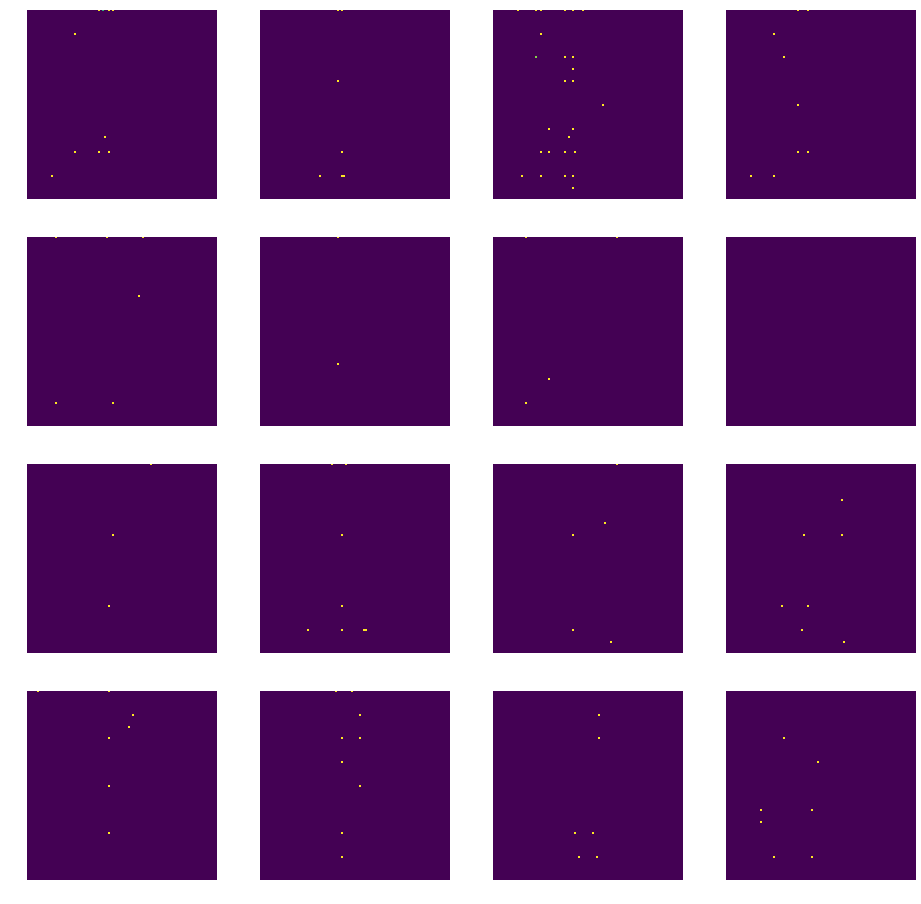

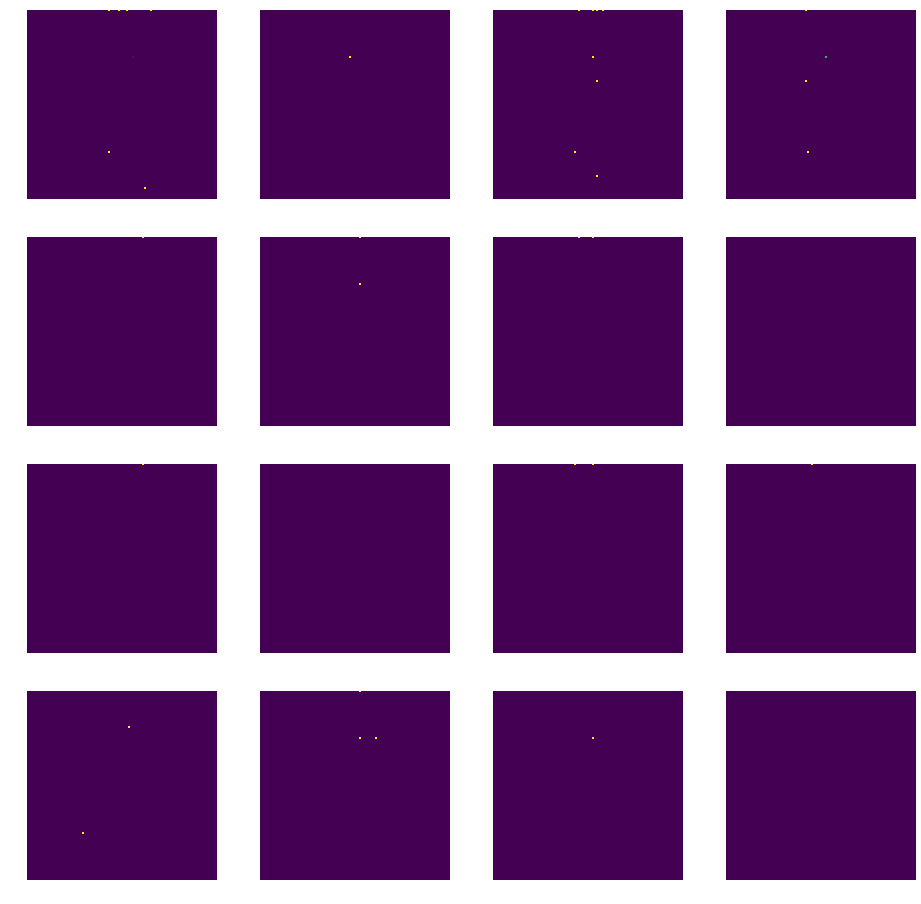

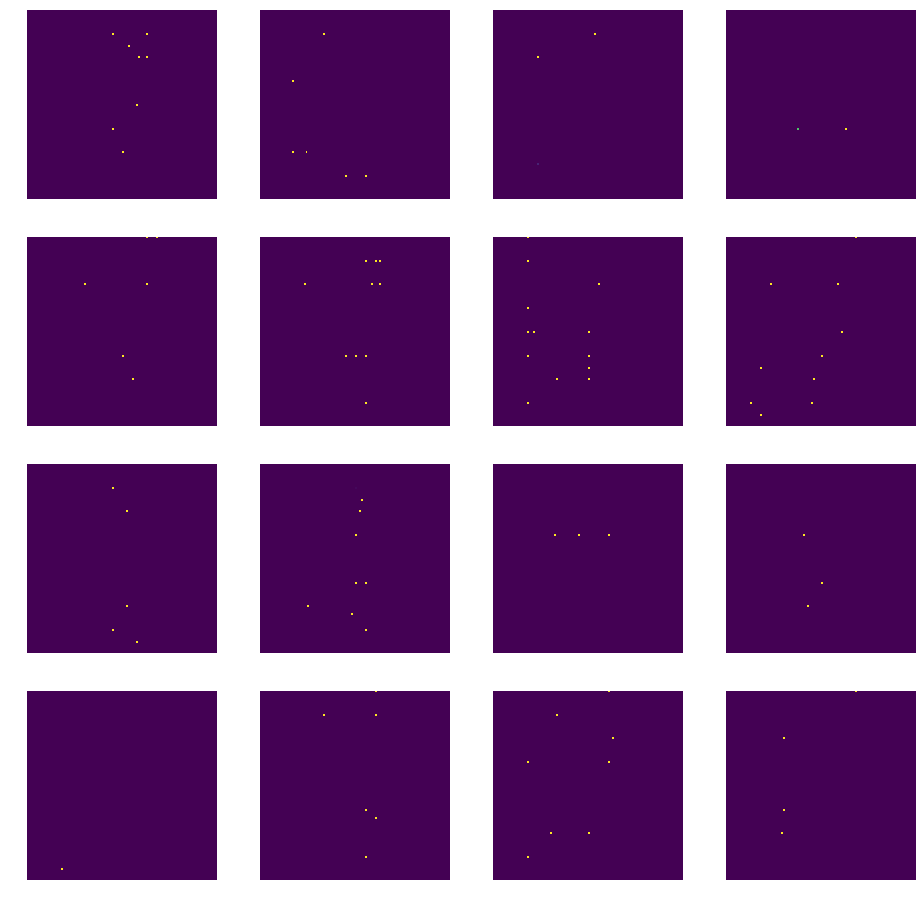

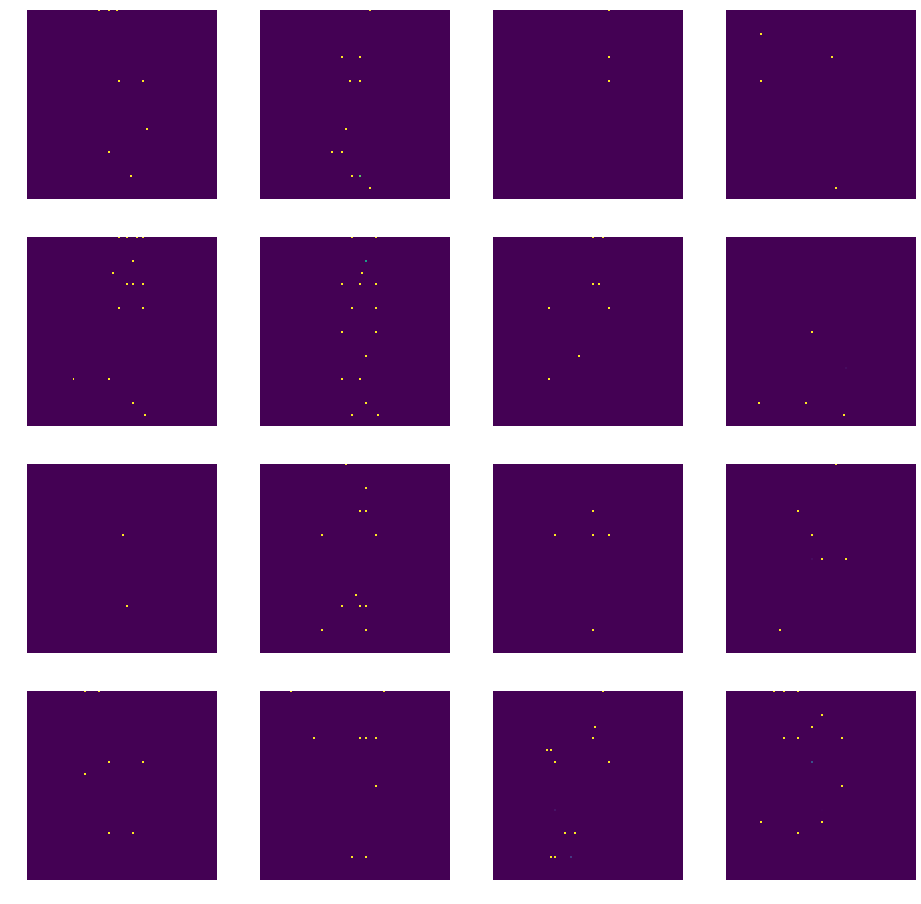

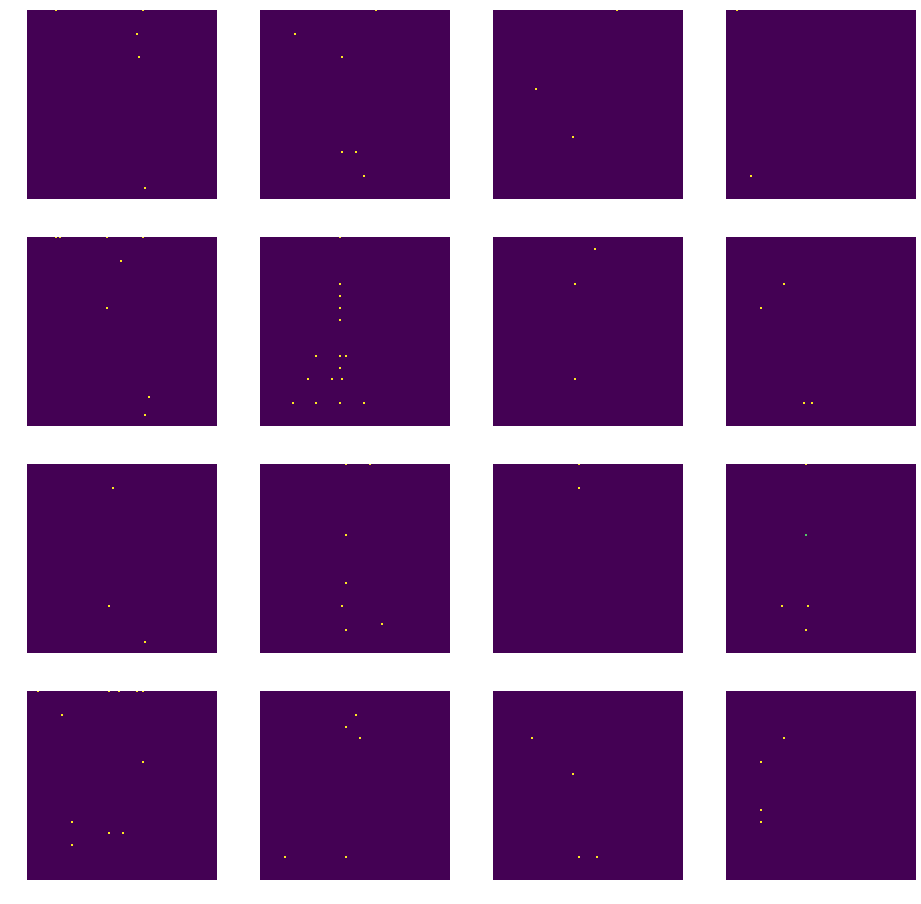

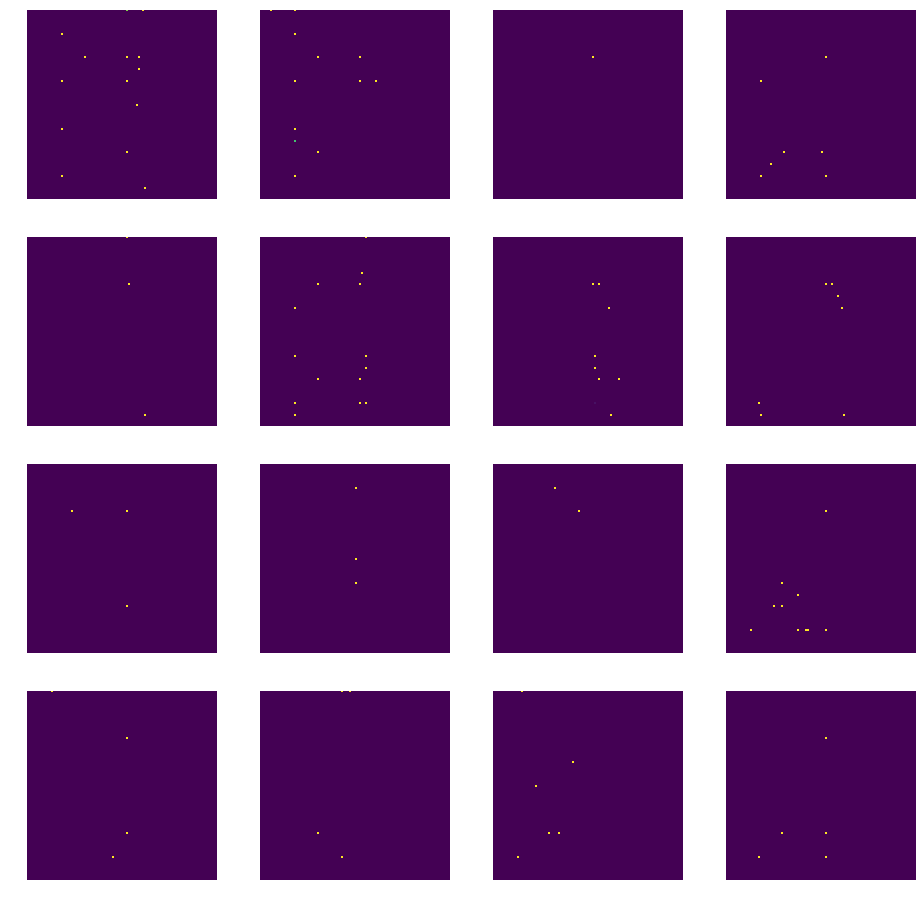

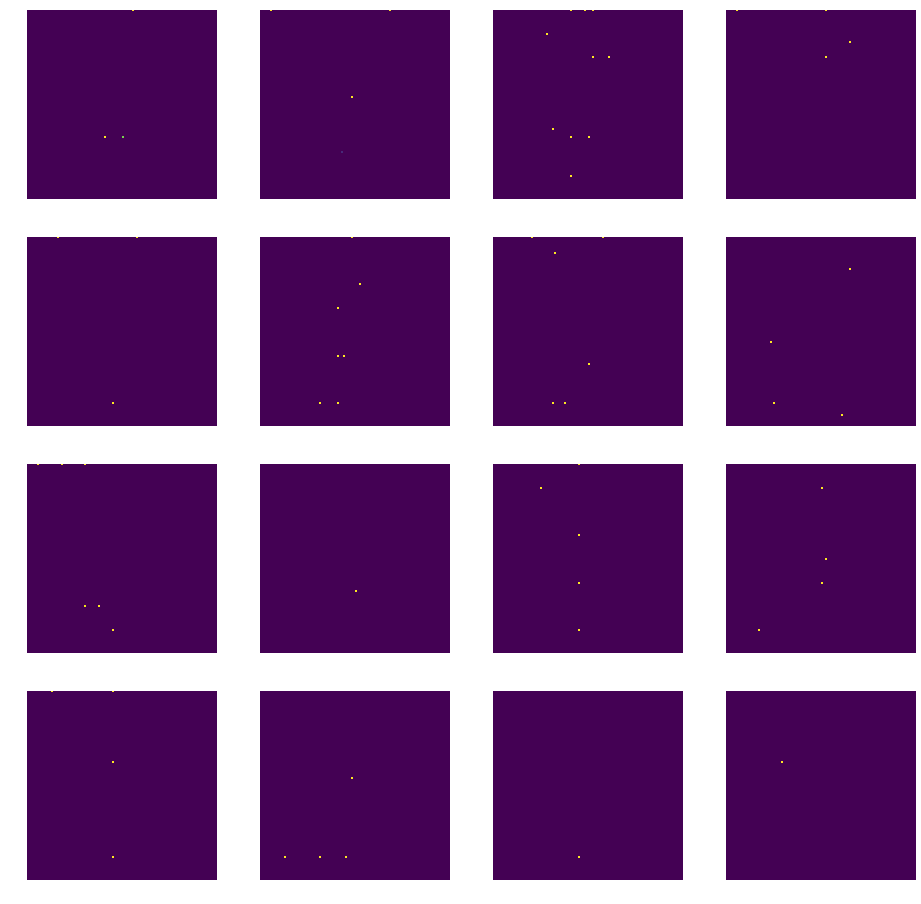

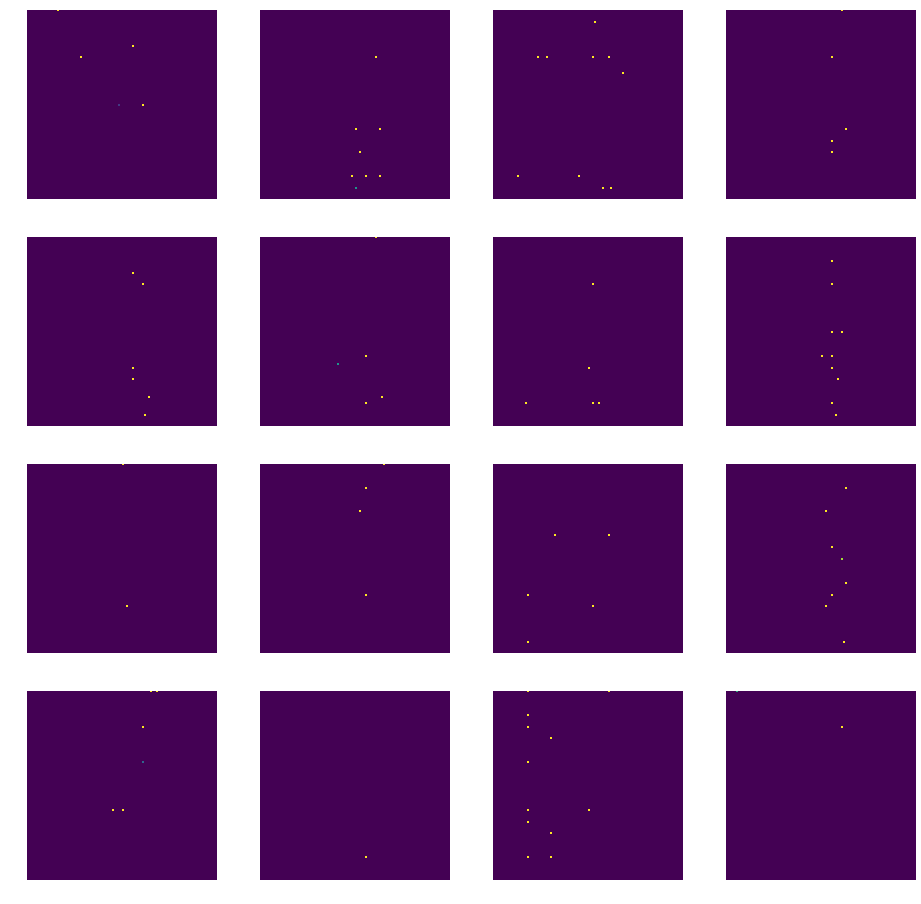

In [24]:
for trial in range(100):
    pcs = np.random.normal(loc=0.0, scale=200.0, size=(1,120))
    res = decorder.predict(pcs)
    display_samples(res[0])
    
    md.samples_to_midi(res[0], 'test_%d.mid'%(trial), thresh=0.2)